In [1]:
from bh_functions import *
import math
import time

Using TensorFlow backend.
C:\Users\luluw\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\luluw\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\luluw\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\luluw\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Imported successfully


C:\Users\luluw\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\luluw\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\luluw\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\luluw\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

# Settings of Surrogate model

In [2]:
# Set the ABM Evaluation Budget
budget = 2500

# Set initial evaluated set size, batch size and training pool size
ini_size = int(budget/2)
#batch = int(math.log(budget))
batch = 50
pool_size = budget*batch

# Set out-of-sample test and montecarlo sizes
test_size = 1000
montecarlos = 10

# Get an on out-of-sample test set that does not have combinations from the
# batch or iterative experiments
final_test_size = (test_size * montecarlos)

# Set the ABM parameters and support
bh_exploration_range = np.array([(-2.0, 2.0), # trend_2
                                 (-2.0, 2.0), # trend_1
                                 (0.0, 10.0), # switching_parameter
                                 (0.0, 100.0),# alpha 
                                 (-2.0, 2.0), # bias_2 
                                 (0.0, 1.0),  # weight_past_profits
                                 (-2.0, 2.0), # bias_1
                                 (0.0, 5.0),  # rational_expectation_cost
                                 (1.01, 1.1)])# risk_free_return

In [3]:
#print(int(math.log(250)))

In [4]:
# -----
# method:  
#    method and active learning goal
method = "classification"  # "regression", "classification"

# -----
# threshold:  
#    threshold for a real valued y to be considered as a postive prediction
threshold = 0

# -----
# model:
model = "ANN"   # "Gradient boost","XGBoost" and "ANN" 

# Generate X train and X test, evaluate X test labels

In [5]:
start = time.time()

param_dims = bh_exploration_range.shape[0]
print("There is {} parameters in BH model.".format(param_dims))

# Generate Sobol samples for training set
n_dimensions = bh_exploration_range.shape[0]

load_data = False

if load_data == False:
    # Build X_train_pool
    X_train_pool = get_sobol_samples(n_dimensions, pool_size, bh_exploration_range)

    # Build X_test
    X_test = get_sobol_samples(n_dimensions, final_test_size*batch, bh_exploration_range)  # Building a 
                                                    # bigger pool to draw from to avoid overlapping with X_train_pool
    '''
    selections = []
    for i, v in enumerate(X_test):   # to avoid overlapping of choices
        if (v not in X_train_pool):
            selections.append(i)
    X_test = unique_rows(X_test[selections])[:final_test_size]   # Final size of X_test is final_test_size
    '''
    np.random.shuffle(X_test)    # shuffle it first
    X_test = X_test[:final_test_size,:]

    # Evaluate the test set for the ABM response
    y_test = evaluate_bh_on_set(X_test, method, threshold)  

    # Output data as a csv
    pd.DataFrame(X_train_pool).to_csv("budget_" + str(budget) + "_X_train_pool.csv")
    pd.DataFrame(X_test).to_csv("budget_" + str(budget) +"_X_test.csv")
    pd.DataFrame(y_test).to_csv("budget_" + str(budget) +"_y_test.csv")
else:
    X_train_pool = pd.read_csv("budget_" + str(budget) + "_X_train_pool.csv").values[:,1:]
    X_test = pd.read_csv("budget_" + str(budget) + "_X_test.csv").values[:,1:]
    y_test = pd.read_csv("budget_" + str(budget) + "_y_test.csv").values[:,-1]
    
end = time.time()    

There is 9 parameters in BH model.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


In [6]:
print(f"Runtime of this part is {end - start}")

Runtime of this part is 26.3749840259552


In [7]:
print_y_test_info(y_test, method, threshold)

There are 1158 out of 10000 in the y test set that are positive.


# Generate default X,y train for non-active learning

In [8]:
# Build train data without active learning
np.random.shuffle(X_train_pool)    # shuffle it first
default_X_train = X_train_pool[:budget,:]  
default_y_train = evaluate_bh_on_set(default_X_train, method, threshold)

In [9]:
print_evaluated_set_y_info(default_y_train,method, threshold)

There are 279 out of 2500 in the evaluated y set that are positive.


# Generate first X evaluated batch and respective label for active learning

In [10]:
# Build first X evaluated batch with size ini_size
np.random.shuffle(X_train_pool)   # shuffle it first
ini_evaluated_set_X = X_train_pool[:ini_size,:]
unevaluated_set_X = X_train_pool[ini_size:,:]

# Evaluate the train set for the ABM response
ini_evaluated_set_y = evaluate_bh_on_set(ini_evaluated_set_X, method, threshold)

In [11]:
print_evaluated_set_y_info(ini_evaluated_set_y,method, threshold)

There are 142 out of 1250 in the evaluated y set that are positive.


# Experimentation

In this section, I will explore few classification options and compare their performaces. The options are as follows:

### 1. Gradient boost with optimal hyperparameters each round chosen by gridsearch
#### a. With active learning
#### b. No active learning
### 2. XG boost with optimal hyperparameters each round chosen by gridsearch
#### a. With active learning
#### b. No active learning
### 3. ANN with fixed topology 
#### a. With active learning
#### b. No active learning
### 4. Bench mark: gaussian process classification with no active learning

# First go through procedure with the largest budget as an example

# Gradient Boost

In [12]:
model = "Gradient boost"

## Gradient Boost Active learning:

In [13]:
gb_X_train, gb_y_train = active_learning(ini_evaluated_set_X, ini_evaluated_set_y, unevaluated_set_X, budget, method, model, threshold, batch)

--------------------------------------------------------
There are still 1250 parameter unevaluated within budget.
Surrogate model predicted 11959 positive labels out of 123750: 
Parameters bundles of indices:  [ 62051  89135 101003  41418 107026  41863  99450  58497   9811 118040
  29963 114393  55973  30158  49696  26256  77673  73653  55795  41872
  60900  88136   9808 101241  15577  97555  49690  43904 119032  73532
   3446 103152  28326   8995 101768   8703  71079  61375  11307  41041
 112092 107009  68759  53974  21498 105902 122536  98414    172  50758]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1200 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 12877 positive labels out of 123700: 
Parameters bundles of indices:  [118861  63938  16185  76045  11016  73942  95486  90113  52219  46117
 121557 102874  83024  67162  11778  49203  53562  34095  30234   6230
  91085  17251  49492  21107  29339 121129  41637  32858  69688 119397
 110432 109721  27985  69601  85702 115843  55949  82877  50193  44423
 110676  24079 106581  72421 113627  83043  26182  33082 115989  17807]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1150 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 13230 positive labels out of 123650: 
Parameters bundles of indices:  [ 45316  10805 122468  22695  39229  62160 110293  65998  80277  66548
  23216 118970  74858  65413  49540  21769 111256  67431 121637  65641
  51097  86218  20941  17927  28352 116462 117970  50694 101540   1346
  94641  44708  58581  66080  89652 118873 106236 114350  44750  72601
  70735 108069  44131  68888  15597  66200  29249  39407  21650   8777]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 1100 parameter unevaluated within budget.
Surrogate model predicted 12967 positive labels out of 123600: 
Parameters bundles of indices:  [ 22084 102260  92899 109695  16666 104512  13600  92918  73967 119390
  74641  80648  59753   1264  19335  30977 103519  72826  27445  94579
  18380  75614  68698  17500 112233 117739  89167  32160 100974  91059
 113529  11955  42043  45200  70889  96516  62695 113344  54691  63863
 122082  22119  57328 113954  84542  99933   8279  99080  96157  90866]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))



There are still 1050 parameter unevaluated within budget.
Surrogate model predicted 13420 positive labels out of 123550: 
Parameters bundles of indices:  [ 16425  36386  23861  89229 105462 102557 103701   5860  10582  50655
  48437  94906  98185  10771  72568  95590  58325  88922  37492  51904
   3589  45738  36433  25220  41505  38039  38299  78599  28031  67956
  78802  34612  57527 110315  97680  64107  69042 104024  97697 112755
  24384 120366  47957 118699   8724  81799  67273 120635   2946  27178]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1000 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 13810 positive labels out of 123500: 
Parameters bundles of indices:  [118565  37041  28094  48418  36510 105861 113689  88705  67186   4433
 107198   9490  50173  80960  61246  43659  63997  79752  75572    378
  92226  13678  80793  97350  12200   2732  62153  55482  27618 108817
  94103  78061  89905 109730  73087  28492  31919  75673  89668 105979
 101727 119076 109043  93586  21788  84955  36894  81255   6272  58349]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))



There are still 950 parameter unevaluated within budget.
Surrogate model predicted 14067 positive labels out of 123450: 
Parameters bundles of indices:  [104080  84293  81378  63433  32295  36340 103005  89905  90411  41956
  64998   3852  39864  58550   1353  49450   5192  26347 122523  70768
  10182    299 102188  38541  87933  97561  52683  21520  78552  78535
  27144  21542  92523    380  67928   5455  82255 121162 107983 112803
  96024  23341   4796  79162  79899  51914  44626  58153  75229  84582]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 900 parameter unevaluated within budget.
Surrogate model predicted 13936 positive labels out of 123400: 
Parameters bundles of indices:  [ 51401  40683  49377  15980  92744   9283  48634  91283  38665 103399
  59845  76250 120561  68557 110926 113763  90931  92204 103275  93996
 100828 109555  76651  68216  43080  86019  95109   4582   4171  12625
  49176  69676  33033  44478  79794  93294   1891 111856  75634  84583
  27099  80391  23351  44725  57015  60345  53268  71295 118208  55877]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 850 parameter unevaluated within budget.
Surrogate model predicted 14070 positive labels out of 123350: 
Parameters bundles of indices:  [111116   5150  81383  66589  19659  84565  32104  31875 117256  53332
  15149  88878  18533  35504   1317  29663  23589 102846  87555  36098
  35811    276  22995  96284  47366  83153  68405 108797 102932  61535
 116645  87980 111350    355  53119  96480 113370  36390  42858  45386
  84481  82392   4784  96112  83820   3314 119139  77080  23647  57220]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 800 parameter unevaluated within budget.
Surrogate model predicted 14016 positive labels out of 123300: 
Parameters bundles of indices:  [ 97934  58961  21358   6752  21673  35919   1730  88795  26607   5408
  60906 101550   1681    356 114023  22176  46858   9426  60504 104810
 102726  63714    281  34770  49223  47420  25966  79841  80541  77931
  75725  91558  76513 118185  80093   4138  94787  18575   7796 110363
  17110 115958 101434   3550 111413 106403 108361  16374  74323 117936]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 750 parameter unevaluated within budget.
Surrogate model predicted 14211 positive labels out of 123250: 
Parameters bundles of indices:  [116171 101988  41452  38328  17022 104546  52015  59669  41548  25847
  73123  39781  90399  31288  79035   5573  30364  52875  86464  43022
 116128 111447 106733   4815   9146  72608  98577  86076  21429  24803
  89279  43196   2302 121554  76955  18310  33569  83618  22309  36105
  36968 101421  85819  63833  98559  10592 109442  13638 119350 123084]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 700 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 14070 positive labels out of 123200: 
Parameters bundles of indices:  [110988   5274  80930  66427  19607  84323  32109  31855 117142  53399
  15131  88645  18492  35621   1389  29659  23611 102624  87361  36236
  35839    321  22957  95997  47411  82795  68154 108677 102794  61607
 116490  87795 111296    420  53165  96162 113273  36561  43038  45418
  84281  82033   4860  95812  83509   3333 119041  76849  23691  57270]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 650 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 14287 positive labels out of 123150: 
Parameters bundles of indices:  [ 52176 119278  55867  19266   9148  40256   3489  93681  44215  33381
  93517   1230  82633  70443  17127 101661  24348  73188   2275  17309
  97153  93740  41127  23038  28784  19032  85400  44158  76319   9519
  64500  67910  81526  13440   5004  87827  20670  29011 112129  33390
  73058  67854  10119   4122  41445   7985 120680  22011  76695  71540]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 600 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 14146 positive labels out of 123100: 
Parameters bundles of indices:  [  8615 121993  45043  38498  59007  86259  77103  15296  11964  67885
  47789  79696  49480 109519  24530  19959 115205 119094  40544  29840
  33711  87013 103928  42961 104076 121021 100681 108249  77724  80443
  28361 120910  63032  95985 103473   3471 112476 107467  21934  36957
  95525  31622  30035  36985  40336 106457  81811  55020 120214   4721]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 550 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 13923 positive labels out of 123050: 
Parameters bundles of indices:  [  1389 113769  83913    317 103191  15447  29392 116462  81995  30757
 110455  47086 101025 121991   3689 120689   4094  46844 119271  35832
  39640   5804  11154 117719  53387  91894   1556  97895  78436  92965
  52328  10904  17530  18403  10281  91080  39171  40573  14403 121856
 110569  28668  16681    406 107256  99131   3395  57746 119419  67258]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 500 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 14439 positive labels out of 123000: 
Parameters bundles of indices:  [ 61301  59863  34539  60512  59675  42499  25345  83612  71481  69674
  17690  44159  80724  82908  75518  90188  99444 115707  25812 104865
  33988  41750 120594  12633  24686  94268  42186  80237  62892  23879
  50304   1253  85017  65113  74878  45435  47104  21044  61580  29180
   9248  55137  51994  96392  16951  21847  60461  32459 101840   7896]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 450 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 13971 positive labels out of 122950: 
Parameters bundles of indices:  [100122  35454  90563 120520 101318 119261  61616  79244   4259  31182
  28694  41795  86131 113717  30151  65615   1943  80308  29499  93003
  25651  52911   6734  40767 118712  19815  93160   4342 117045 105605
  94337  72574  84711  96670  79714  92164  75264  45858 110298 106160
  54409   4748  98363  94017 109194  15929 118703 118565  13988   4232]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 400 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 14167 positive labels out of 122900: 
Parameters bundles of indices:  [ 25804  38171 120708  51679 100743   3575  78585  48639  42466  65125
   8256 118423  66296 120630 108313 102293 118563  96233 103916 101886
   7193 110703  69868  56476  19112  12574  55526    402  85486  88580
  88450  83486  80762 112714  61535  97180  65255  22800  15365  70898
  11518    301 120367  49425  19857  48518  31331  80175  60286  12840]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 350 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 13894 positive labels out of 122850: 
Parameters bundles of indices:  [ 53261  95814  24805 118878  52552  56427  88101  52965    302  65067
 111018  13995 119772  74242  82573 103112  69640   9917   3418  31758
 102133  94131  24756  40523  36421   1801  93707  91967  41860  94610
    437  49650  99736  27316   9633  96287  17954   3460  10453  81770
  43314  70855  99611  48714 118178  87066  49604 109435  88690 120396]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 300 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 13943 positive labels out of 122800: 
Parameters bundles of indices:  [  9548  85485 107164  17269  99472  82915  32942  42571  23151  12420
 122017  83542  53043  79856 110382  45662  52046  44470  98861  22312
   9551  61288 103266  84679  25979   3431  32745  70525  66348   2798
 119617  36977  93368 118348 111440 121024  35665  10679  10394  65874
  88283  58677 110616 109292  85196  28395  86900  68081  12366  68896]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 250 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 13939 positive labels out of 122750: 
Parameters bundles of indices:  [  9547  72395 107477  33976 115179 111949  66617  33067  92731  12566
  27684  66649 107970  93162  14593  97559  53879  44211  48813  22570
   9570  90771  26470  84950  14711   3614  32792  37420  48738   2895
  94795  19651 105321 118308  96781 105296  57241  10688  10394 114980
 114896 105112  68970  32991  19261 118207  96264  55828  12425  48135]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 200 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 13871 positive labels out of 122700: 
Parameters bundles of indices:  [ 56526  14694 121475 104605  79033  88832  55610  36231  42720  63215
  46495    476   3938  10083  78848  87800   1987  39066 104845 112726
 116921  60269  34764  66768  23425  94642  30323  78513  84596 118148
  43023    332  84373  17709 115524   8063  25246  94590  31220 106821
   9402  26688  88453 107168   8381 108430   1829 104985 121074  77648]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 150 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 13873 positive labels out of 122650: 
Parameters bundles of indices:  [ 54139  14692 121497  34270  81211 110646 115126  62026  94835  70941
  46339    456   3986  10148  78756  59353   2054  38961  85856  85870
  97602 103588  52831  66674  23467  75539  30444 104231  84541 118199
  80002    323  68849  17716  46636   8168  25329  39501  31294  98448
   9501  26839  82925  48617   8473  80013   1883  47066  53547  89989]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 100 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 13873 positive labels out of 122600: 
Parameters bundles of indices:  [ 19313  14706  73724 121012  25756   5633  43536  61407  15752 101404
  52736   1837  42044 108040  84593 109667  54710  75069  98357  52572
  75638  84663  65995  85136  44012  71186   1482  16535  59135  51860
  89619  36817  12575  25230  77568 112685  48598  27168  22619  58544
  74193  16752  62120  79355 107336   7139  47687  76158  28982  98264]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 50 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 13770 positive labels out of 122550: 
Parameters bundles of indices:  [ 85186  96039  19683  79559  85250  70471    499  62747  18474  45317
  85058  35802  37938 110247  11843  77915  40198  12906  68533 118329
  47700  82560   6723 105251 119470   5371   4817  40633  52623  42011
  75053  38755  84910 118589  61110  67756  90002   1625  24181  84101
  76536  33551  70567  44586 114645 103716  21136  61925  30039 112619]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


In [14]:
print_evaluated_set_y_info(gb_y_train,method, threshold)

There are 1117 out of 2500 in the evaluated y set that are positive.


In [15]:
print(gb_X_train.shape)

(2500, 9)


In [16]:
pd.DataFrame(gb_X_train).to_csv("budget_" + str(budget) + "_gb_evaluated_set_X.csv")
pd.DataFrame(gb_y_train).to_csv("budget_" + str(budget) + "_gb_evaluated_set_y.csv")

#### Gradient Boost model fit and test:

In [17]:
# model.fit
gb_active = fit_surrogate_model(model, method, gb_X_train, gb_y_train,batch)    

In [18]:
gb_active_y_hat_test = gb_active.predict(X_test)

In [19]:
pd.DataFrame(gb_y_train).to_csv("budget_" + str(budget) + "_gb_active_y_hat_test.csv")

## Gradient Boost No active learning:

#### Gradient Boost model fit and test:

In [20]:
# model.fit
gb_non_active = fit_surrogate_model(model, method, default_X_train, default_y_train, batch)

In [21]:
print_evaluated_set_y_info(default_y_train,method, threshold)

There are 279 out of 2500 in the evaluated y set that are positive.


In [22]:
gb_non_active_y_hat_test = gb_non_active.predict(X_test)
print_evaluated_set_y_info(gb_non_active_y_hat_test,method, threshold)

There are 30 out of 10000 in the evaluated y set that are positive.


# XGBoost 

In [23]:
model = "XGBoost"

## XGBoost Active learning:

In [24]:
# This is iterative sampling active learning algorithm that inputs the inital evaluated set and unevaluated part 
# from the pool and outputs final train data  
XG_X_train, XG_y_train = active_learning(ini_evaluated_set_X, ini_evaluated_set_y, unevaluated_set_X, 
                                           budget, method, model, threshold, batch)

--------------------------------------------------------
There are still 1250 parameter unevaluated within budget.
Surrogate model predicted 16445 positive labels out of 123750: 
Parameters bundles of indices:  [ 95289 106888  48380  45802   8621  82283  91998  74265  40552 121567
 112376  11329  27797  78861 112648  14970  14558  52850  55642  92863
  21014  10448 118385  59312  27253   9449  64923 105948 114356  37708
  87739  19008  58586  29515  40726  33386 106515   5971  94050 123698
 110490 109473  91493  24633   8432   4634 109347 115070 113740  57684]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1200 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 14923 positive labels out of 123700: 
Parameters bundles of indices:  [ 21675  74107   3489 116061  15279  59906  20250  38138  33930  76594
   6511  26712  90461  74741  42470   3991 115086  42041  40772  14414
  16873 110333  53281  69681 114476  12416 104618  39267   7145  80420
  57953  44929  56853  93981  52568  77954  84751  17181  12800   3841
  98137  75378  26428 108083  34223  88357  91381  16889  42046  13057]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1150 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 17293 positive labels out of 123650: 
Parameters bundles of indices:  [ 25470  73227  74493  10785  57463 121454 123229  29455  29035    931
   6996  52523   1079  22186  82947  77342 102911 102761  27682 112966
   9448  24857  68982  87161  67018 122564  72245  43089  25993  88415
    457  66354  37881  10182  37644  81429 116048  81896  90836 110888
 117003  55905  93137  87755  28805  71100   1854 120441  68376   3753]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1100 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 15070 positive labels out of 123600: 
Parameters bundles of indices:  [ 42328  51798 113455 105455  66081  38407 121197  98344  95722   8058
  47930    238  82306  69702  84533  38788  60926 100172  97491   7834
  55394  30457  62450  26186 117629  85352  25686  19101  53161 113514
  87886  48963 110626  10778  24936 108568   2084  71231 116183  46319
  33152  57808  53440  19922  11621  76404  46152  62041  71003  80789]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1050 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 13092 positive labels out of 123550: 
Parameters bundles of indices:  [ 51136  74574  83838  37911  70168  72366  34719  49165  39618  71240
  33438  11125 120480  65682  83865  24311  41494 102841  34189  75260
  83025 100590  47798  36601 104763  47578  31769  31696  85600  78189
  54806  28915  12668  32842 116215  61250 117602  94577   4832   4533
 118605  84597  70769   2993   4586  50087   1313  54820  69653  60007]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1000 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 16109 positive labels out of 123500: 
Parameters bundles of indices:  [ 60528  84283  97480  55772  57663  97033 111158  16254  52838  70385
  71875  18016  36543  50627  17123  84892  26872 108681   9615 121521
  50509  43388 105359  96161  33060  11121  59925  16107   1058  89741
  33845  17346   4641 120166   1932 100270  96748  38540  29633  26345
 116399 111121  74104  71826  97092  19083 111754  76657  94942  36318]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 950 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 15759 positive labels out of 123450: 
Parameters bundles of indices:  [108119  55557  11032  78540  54053  88736  98829  12928  81103  82957
  72132  79617  67038   7222  98705 121998  97104  98940  46925  48055
 104381  50756  66710  34354  32887 114889  39462 121477  34638  43823
  14885  74761 118892 115706  68020  50626 113442  36674  60619  98953
  66168  74735  94619 116081 117491 106479  45117  69825  74574  66163]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 900 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 15273 positive labels out of 123400: 
Parameters bundles of indices:  [ 21451  57196 104953 118820  47353  62359 110153  84980  93817  79106
  34940  47122  23963  62626  87485  29305 104790  59767  43825 103766
  17275  42559  13357  72037  36434 114259 113068  19316 111407  91261
 112226  73634  71899  56951  39228   6070 118278  81271  35130  36031
  71906  45805 111219  14335  90861  34368  20337  75037  79224  11604]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 850 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 15312 positive labels out of 123350: 
Parameters bundles of indices:  [102966 104826  26003  53228   8125 113590   8829  73820  12437  43124
  89523  21341  47867  43594  24610   4714  61954  94444  51010  25989
  56534  56340  20465  29852  80677 115562  78478  51526  35384  28098
 119675 120537  38082 117387  37348  99821  70884  55929  84488   7591
  99062  30396 105479  93944   3593   6050  34866   5503  20401 109446]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 800 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 16159 positive labels out of 123300: 
Parameters bundles of indices:  [ 16361  64487  54808  96055 122513  89244  41970  81662  83557  18402
   5629   1106  97613   7305  60806  51116  32815  39539  71953 119235
  79957  68534  18942  94876  53064  27143   4115  33908  90077 121926
  29403  52133  84840  29608  94750 102999  78072  64748  63735   6915
   1675  99309  58158  26628  82330  87599  23835  29737  72102  36419]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 750 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 15773 positive labels out of 123250: 
Parameters bundles of indices:  [  3709 108219  67051  54580  69334  74763 122911  73980  24649  88320
   8702 101696  73018   7666  73438 104606  92251   9598 115478 118041
   4114 111191   4167  65713  67784  18784  51090 113825  40151  16076
  85921  65410  76892 121642   6828  49890   6446 107081  15798  81787
  73407  84293  29847  46657  11406  22547  45534  79418  28382 122624]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 700 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 15886 positive labels out of 123200: 
Parameters bundles of indices:  [ 49105 112237  50667  71206  71408  86756  78348  54601 119851  88637
  96152  75595  90358  89713  54725 116176   9166   5001  73181 115011
  34346  67705  41667  85670 103870  89647  73328 100240  20505   8410
 106637 108400  30950  85430  50505  94121  89847  94951 120799  15417
  58755  38382  45600  17751 113464  21321 112455  61751 113594  75559]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 650 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 15262 positive labels out of 123150: 
Parameters bundles of indices:  [ 89030  57861  21331  58913  61967  81291   4867  26349  48096  80945
  16079  59173  32646   8808  19894  54803 102116 101423  12469  76159
  19783 109307  49954  31554 108507  79317   8211  24508  84921  69952
  27524 114727  54014  97948  35316  70470  29992  72650  55205   4966
 115709  57343  85355  30283 115422  75288 112942  27534  33210  35642]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 600 parameter unevaluated within budget.
Surrogate model predicted 15351 positive labels out of 123100: 
Parameters bundles of indices:  [112888  33855  30511 103098 112346  10985  31334  66255  14701  95020
  57449 108879  11680  48362  24039  81131  14086  35140  37444  32416
  91536  31665  46145  11865  47099  71043  64408  95172  13429  65061
  24926  79179 100220  93406 118290  34210   4745  21394  34025  24293
 120661   9124 113845 110311 108822  63977  60681  18536 102237   9058]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 550 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 15149 positive labels out of 123050: 
Parameters bundles of indices:  [ 15766  14094  57388  75165  81250  61816  63494   9713  97936  22277
 106834  60277  86080  78053  32062  91291  81544  41759  82941  96063
  37689  27587  83489  72078  87626  42261 114270  61161 102372  67321
  62917  92049  22546   8297  70199  25754  49638  43790  69801 115594
 108623  34104  86870  85983  33620   9051  29579  53151  17385  87444]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 500 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 15578 positive labels out of 123000: 
Parameters bundles of indices:  [101213  53204  29879  78791  57164  62554 114614  85074 120025  79636
  17924  63560  71320  28903  67373   8613  55029  30724  38995  70650
 101153  38758  55664  18900  95077  42976  70717  39383 107954  47525
  96936  27548  57160  10872  52319  24666  41350   7619  35035  78960
  51677 112173 103354   9458  32117  47449  70704 106390  79558  82809]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 450 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 13419 positive labels out of 122950: 
Parameters bundles of indices:  [ 87549  97183 118759  81891  22574  53179  93060 109977  45647  77893
  11151  98008  32116  12835  71141  57216  27493  58916  18662  35690
  69281   5071 104941  76651  26020  70068   3436  44107  99244  89854
  63481  95008 107886  60181  27788 102859  18203  88235  66630   4107
  85373  27136  74925   2915  42518 117193  15967 101728   5658  49314]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 400 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 15564 positive labels out of 122900: 
Parameters bundles of indices:  [ 70987  27031  50577  74656 100791  74280 120536  77394  36209 111844
 105108 100772  66947  20417 111051 104064   6691  40534  64741  56523
  25598  81322  72902  50278  14044  52894  95064  34216 121952  28450
   4122  93318  57999  24376  33614  27493  42848    272  89439 105929
 109302 120062   9391  57714  66052  90989  24379  47678  35070 108923]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 350 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 15289 positive labels out of 122850: 
Parameters bundles of indices:  [  3584  49094  34677  67821  83323  55612  83114  84594  85200  74362
   4883  96026 113110  95330 112213  11622  47293 121936 111180 121458
  69021  91394  13395  51872 113582   4010 103253 119809  10920  89345
  63205  74374  17582   1360  28874  38225  99844 111114 108060  50317
  90977 110637  12592  88805  44060  68496 114939 113811  38777  80637]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 300 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 14521 positive labels out of 122800: 
Parameters bundles of indices:  [ 23510  82717   9110 115143  32863  51621   2679  73699  63477 101239
 109108  63943   2248  25915  76009 116755  94098   2197  42727  83968
  39854  62162  43128   3341  81814  10070  93721  62445  24247   4560
 105286  34697  44313 121855  27270  29792  97377  81416  47395  98607
 119035 113484  92866  62226  83689  12385 109484   4151  93901 116736]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 250 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 15203 positive labels out of 122750: 
Parameters bundles of indices:  [119767  21521  20372  87738 101467  95542 113263  87314  21207  78058
  12647    256  38001  74189  93989  44733  49319  86779  10028  51324
 107306  21489   8079   3963  20394  96681  64769  16500  29455  75954
  20318  34060 100849  54236  11599  52866  75293 108900  91449  57024
  94448  42578  75265 121377  79001  75045  56741  45077  73446  10926]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 200 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 13433 positive labels out of 122700: 
Parameters bundles of indices:  [ 85398 116706  43412  46044  61564 120279  52451 100496  78689  19806
  63516  99891  82508  64694 114914 118218 115790 110374  44048  29751
  87025 100525  68346  86078  83716   4707  73847  97845 108802 109061
 119899  99470  41310  77360 105587  15707  21997   4606  52922  86269
  85716   5084  68183  47848  37085  73401 118732   2990  10095  43954]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 150 parameter unevaluated within budget.
Surrogate model predicted 15611 positive labels out of 122650: 
Parameters bundles of indices:  [ 99390 112178  24177 107895  57586  15713 114254  76225  10599  34246
  48068  86180 101978  13636  79409  89826  78048  22038  52339 121729
 120012  50451  14056 115119  53269  57377  18296  23589  70980  53480
  50646  11296   8341  4841

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 15938 positive labels out of 122600: 
Parameters bundles of indices:  [ 36470  70265  50126 115410   4088  19361  90540  71990  90725   8571
  60242  12000  40390  50647  88736 119227  79300 104849  72904  27931
 111940  71527  58814  74552  36031  77610   8246  26692  28669   9862
 118098 117403  25776  35745 118601 110765  19476  50229  37289  95103
 118833  20654 120414  84240  36337  21510  63475  31536  42770  17327]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 50 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 14944 positive labels out of 122550: 
Parameters bundles of indices:  [118574  60737  70845  47716  41659  79926 116467 102550 110095  65722
  64152 121164  85728   5061   8314  23896  15774 118419   4527  21345
 104908  72231  11116  60228  31867  46699  82151 101953 108709   6868
  75292 120397  55123  81910  74909   8166  40046 114437  22632  81674
  87545 111739 122384  67528 109417  36500  99373 121536  46861  80427]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.


In [25]:
print(XG_X_train.shape)

(2500, 9)


In [26]:
pd.DataFrame(XG_X_train).to_csv("budget_" + str(budget) + "_XG_evaluated_set_X.csv")
pd.DataFrame(XG_y_train).to_csv("budget_" + str(budget) + "_XG_evaluated_set_y.csv")

#### XGBoost model fit and test:

In [27]:
# model.fit
XG_active = fit_surrogate_model(model, method, XG_X_train, XG_y_train,batch)

In [28]:
XG_active_y_hat_test = XG_active.predict(X_test)

## XGBoost No active learning:

#### XGBoost model fit and test:

In [29]:
# model.fit
XG_non_active = fit_surrogate_model(model, method, default_X_train, default_y_train, batch)

In [30]:
XG_non_active_y_hat_test = XG_non_active.predict(X_test)
#print(gb_non_active_y_hat_test)

# ANN

In [31]:
model = "ANN"

## Active learning:

In [32]:
ANN_X_train, ANN_y_train = active_learning(ini_evaluated_set_X, ini_evaluated_set_y, unevaluated_set_X, budget, method, model, threshold, batch)

--------------------------------------------------------
There are still 1250 parameter unevaluated within budget.

Surrogate model predicted 0 positive labels out of 123750: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 53969  86389  89729  44568  81419  88143  25397  67473 104925  82400
  95406 113339   1119  28444  28153  94201 101444  68670  19401  37418
  51565 108912  74869  75688  20603 120802  38241  97678  33172  97658
  77909  31728 109126  70888  86785  56053 123091  85894  37909  21569
   1556  10337  10566  26471 109755  74936  16331  45485  14775  63387]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1200 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 123700: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [  7767  20908  31280  43827  87537  96430 122956  21665  35712 109233
  95561 114464 108685  47891 117867 101839 112156  70569  88498 110278
  67295  16968  96856  65143   2091 120470  16081 117600 110287  65159
   2353  11967  40304  59206 110460  47223  98550   3353  64453  13422
 111372  71144  26414  67662  83209  36077  54116   8396  93015  70720]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1150 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 123650: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 92113  34987  92814  60980  72093  60091  67732  79656  39567  34479
  75637  19113  28039   7327 116753  86433 121505 115882  56187  24137
  73022  63204  71180  67708  47753  39108 101661 118541 113543 122479
  65822  49480  23949  34653  72996  98998 106850  94942 109038   8332
  19765  52422 100145  36646  22856  74545  40429  42685  10225  96981]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1100 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 123600: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [111726  72158  44303  77409  10826    431  25865 105614  53632 102789
  36452  86599   9343 116530 102533  18752  23854   2084 121390 107994
  30811  76406 104333  99229  29734  66136  74533  20190  16800  17979
 123437  88062  92694  20085    262  78547   3016 109469  70384  10801
  36571   9883  89352  83956  70002  79201  66240   1875  93193  27950]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1050 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 123550: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 38977  65850 107088  30969  86928  86091  90975  45232 100939  29417
  68206  70635  17600 119610  13141  86416  79624 102811  37165  53971
  51117  31163  61941  52512   2479 120800 111609  40517  21486 108408
   7475  57700 111215  41692  16497  38097 119250  73826 113321  82370
 103906  13356  87009  50477  60057  44470  96134 105037 108546  20631]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1000 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 123500: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 70171  88387   7135  73340   4350  16404  39528   1908  59805   6584
  36461 102629  27727  48981  68782  76844 115092  55789 122580  21304
  58655  51941  43896  75433  51162  50320 115979 116736   7377  27275
  88960  32202  65471  33967  47545  46297  62868  38907  72770  83294
  72498 121042  26589  44557  42638 102320  33850  41464  88880  23328]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 950 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 123450: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [120492 109664  74587  18502 110885  77793  73530  60189  94352  57212
   5635   4616 115276 108009  45953  25059 100450  90173  48853 109098
  49734 107766  52670  17378  49424  54436  38219 118236  45966  57461
 110850  49884  37129 115828  21127 114820  77258  19170  70944 121061
    572  81949  31253  83028  13664  23915  42136  33753  77157  55741]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 900 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 123400: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [122002  96891  60361  93274 105442  94539  39600  90008  45565  30719
 104934 116916  61547 113393  40129  62896  42638    822  81358   8957
  28643 112929   6687  48435  23242 120888  78902  21920  79983  87125
   7991  77268  63315  35455  43291  50588  62122  99879  27623 110124
  13987  15835  23603  20010  93225  40704  32526  44362  24539 100804]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 850 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 20 positive labels out of 123350: 
Parameters bundles of indices:  [  3737   8652  24616  29046  36688  42207  44022  49976  55521  55825
  59293  60789  68931  69811  75749  78603  88512  91739 105288 118398]  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [100177  69094  93905  83554  77723 117415  95806  95337 117443  32265
  40265  20546  13322  20339  42122  74091  87720  91253  91967  19013
  33632  24845  49478  92889  58842 118841 101940  23566  71114  75878]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 800 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 123300: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [110351   4391  27097   1857  84707 118295 121532  67823 102329 102089
  25600  64116  35266  95451  95176  34546 107041  48186  17286 113584
  31173 103347  90962  96300  86125 105825  22479 121585  76110  68660
 116170 116194 118850 111949  68491 122530   8799   4293  93977  99329
  45426   8347  78389  17471  63293  95927  70315  65369  78420   9865]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 750 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 123250: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 55311 111571  81719  88674  20344 117000 101536  70526    836  97540
  84148   6055  68711  49235  76235   8334  75447 109577  60184  41894
  84630 115218  87535 116407  66414  14153  62459  42336  17666 101550
 120117  67153  45145  13051  74273 100912  10460   6977  29014  86234
 106727  96136  61408  17679  34739  65586  78629 102117  44849  98608]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 700 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 123200: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 99600  38713   5736  56168 100821  50815  65247 113132  33226  76687
  97918  52352   8854  60133  95686  45329  18253  66940  58507  95223
  27766  54689  24526 105386  65071  63248  75158  68112  26523  31829
  72000  81305  59912  81720  24046 104848  56714 122485  69607 114167
  74876  48969 103875  18781  99936  29588  36283   5650  50919  97055]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 650 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 12 positive labels out of 123150: 
Parameters bundles of indices:  [ 6302 10267 11891 42802 54798 66944 69756 80471 89741 90598 93509 95627]  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 58116  68596  90112  64952  10555  94298  45205  81995  66181  75827
  51140  51883 109632  16520  43568  93688 102850  80346  41137 112356
  93361  87450  73012  58533  97532  59165  72515  56341  40237  63821
  22878 101204 110589  37889  70503  14785  92862 119690]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 600 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 7 positive labels out of 123100: 
Parameters bundles of indices:  [ 10928  41989  48609  67451  70438 110140 114518]  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [118101   4481   5243 108512  14017  86406  83973  44243  90792  43843
  77873 106289  37909   6526  21274   2997  63381 115143 111454  12107
  28971  77920  42468  38933  40544    580  12576  29555  80401 115857
  88117  97742  28823  16727  47421  14704  19046  39450 100779  96033
  44398  89689 103648]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 550 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 123050: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 12966  51746  20492  17273  16233  14027  23952   2092   6283  67335
 109886   9453  51206  42320 120408  81928  51982   9938  73959  82106
  62097  40319  23886  83360  81852  70510   1132  67115  22809  14791
   7270 113918  76057   5189  53937 106950  71306  30328  42520  21729
  41044  91944  39339  63666   9041  69306  40095  89592  76292  43561]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 500 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 123000: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 32485  59428  36977  37120 122796  69709  97659  44026  97745  93230
  92316  34703  98815  23813 117383  36356   3897 118676   1162  93668
  90477 113084  86621  90189  39346  85612   1323  59716  36799  18570
 109339  74187  65772  59137  49444  88901  22954  78012  25881  55534
 106469  55341  78122  46871  73678  37426  58986  30973  25760  61144]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 450 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2472 positive labels out of 122950: 
Parameters bundles of indices:  [104697  20611  81599 118463  96818  69892  24063  76666  59377  67815
  77531  37753  98925  65746  64501  76603  98450  91519  88245  79057
  78605  97865  86990  71876 103976  79433  10121   6319  18333  84861
  16395  54049  19573 102282  16551  19419  89979 104509  75711  63230
  73367  22328  39466  99082  23501  70412 115153 122696  42610  76945]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 400 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 34 positive labels out of 122900: 
Parameters bundles of indices:  [ 10319  12417  19991  22044  24227  25587  27293  28369  38296  44508
  50311  51696  54201  54637  57530  61222  65515  66353  66356  67157
  68933  69491  69568  69817  71083  73476  82602  83825  85409  97938
  99971 115759 116478 120095]  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 74368  97202   9371  23444   6796  17823  11319  55422   3323  96090
 122233  73916  45947  30307  30092 109344]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 350 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5168 positive labels out of 122850: 
Parameters bundles of indices:  [ 49781  43932  23785 111800  80168  18451  75166   4964  53345   3188
  89549 111098  88280  87682  50737  23293  90779  65927  71449  18716
  43469  46144  98835  11212  27932  16083  21698  56361 116454  61201
 121531  16441  45710  75717  63693  97286  94250  18317  47515  84983
 105376  71847  43979  22632  95345  98304 100121 121722  46822  60368]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 300 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2097 positive labels out of 122800: 
Parameters bundles of indices:  [ 24165  11473 102978 106127  85258  29893  98450  10367  48563   1953
    452  99152  28139  70305  34456  96485  40822  93672  32907  70475
  85557  29497  51599  76652  37981  80698  73260  48244  81111  18818
  42503 121821  83770 117396  92381  67911  35968 104673  51802  49728
  47157 119257  54482  37797  52615  88584  12936  52350  30302  97649]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 250 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 53 positive labels out of 122750: 
Parameters bundles of indices:  [119375  98032  70728   4317  27197 111100 119896  30708  38571  37990
 119329  86559  43747  29137  84386  56658  46495  43045  50885 102678
  46950  66949 116273  45331  65178  54966  69429  32612  70748  31861
  67206   3037 121579  52333  45953  64178  83137  89664  12967  81093
  39059  25922  96956  61861   5374  60561  18512 100128  17313  81790]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 200 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 122700: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 25579  89808  53537   5915  36783  33271  59554  41718 118830  24915
   9355  91617  86214  21119 108442  85021 120092 115998 115590  80229
  58500  19174  58556  45379 111402   4713  54287 108900  57324   8079
  18717  36705  42577  75880  36548 114761  78479  59493  14111  49542
  98056   2610 101064  50383 122281 106661  71335  64101    995  38541]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 150 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 7547 positive labels out of 122650: 
Parameters bundles of indices:  [105690  81175  33880  80903  22446  56686   3475  96317  14120 117968
 116492  85002 105461  73013  98792  98769 107019 122286   6618  64308
  66628 115758  35299  26705  81164 104943  33430  60594  43953  11519
  76792  31966  97477 107323  85533  39356 113834  71289 106704  90876
 101751 100478   6879  48840  95167  39252  92810  62480  29043  85084]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 100 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1787 positive labels out of 122600: 
Parameters bundles of indices:  [ 52241  86037   7543  60261  53729  41380  68058  36646 110830   1134
  51398 109859   7925 101201  92349  98863  37379  67029  81398  16020
  28761  68828  41425  36061  66893  49590  44379 121925  22146  65647
 101786  95150  31227  82921   3782  57862 101804  96917  97168  58534
  18624  49758  50723  28399  53456  30690 111897  49153  58732  75682]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 50 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 18 positive labels out of 122550: 
Parameters bundles of indices:  [  3646   5036  10287  12592  23933  24065  29722  35095  48017  50610
  53011  56000  58431  64744  82209  87870  89121 116767]  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 76025 100298  81183  22171  16309  83932 101472 109516  95337  18145
  54813  16328 115923  99515  63909  97827  63916  37314  37469  62160
  92553  50269  55847  60164  78272 116007  37443  96138  12632  14340
 120216  87006]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


In [33]:
pd.DataFrame(ANN_X_train).to_csv("budget_" + str(budget) + "_ANN_evaluated_set_X.csv")
pd.DataFrame(ANN_y_train).to_csv("budget_" + str(budget) + "_ANN_evaluated_set_y.csv")

#### model fit and test:

In [34]:
# model.fit
ANN_active = fit_surrogate_model(model, method, ANN_X_train, ANN_y_train,batch)    

In [35]:
ANN_active_y_hat_test = ANN_active.predict_classes(X_test)
#print(ANN_active_y_hat_test)

## No active learning:


In [36]:
# model.fit
ANN_non_active = fit_surrogate_model(model, method, default_X_train, default_y_train,batch)

In [37]:
ANN_non_active_y_hat_test = ANN_non_active.predict_classes(X_test)

# Benchmark: Gaussian process classification with no active learning

In [38]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gpc_non_active = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(default_X_train, default_y_train)

In [39]:
gpc_non_active_y_hat_test = gpc_non_active.predict(X_test)


# Test data performace evaluation

### Gather all predicted y test to a table

In [40]:
experiment_labels = ["Gradient Boosting Active learning", "Gradient Boosting No Active learning", 
                     "XGBoost Active learning", "XGBoost No Active learning", 
                     "ANN Active learning", "ANN NO Active learning",
                     "Benchmark GPC"]
num_experiments = len(experiment_labels)
print(num_experiments)

7


In [41]:
y_hat_test = np.stack((gb_active_y_hat_test, gb_non_active_y_hat_test,
                        XG_active_y_hat_test, XG_non_active_y_hat_test,
                        ANN_active_y_hat_test, ANN_non_active_y_hat_test,
                       gpc_non_active_y_hat_test),axis = 0)

# The following shows the tpr score of all methods in a number of Monte Carlo simulations

In [42]:
def custom_metric_binary(y_hat, y):
    TP = 0
    
    for i in range(len(y_hat)): 
        if y[i]==y_hat[i]==1:
            TP += 1
    pos = (y == 1).sum()

    return TP/(pos)

In [43]:
# tpr performance
tpr = np.zeros((num_experiments, montecarlos))
for experiment in range(num_experiments):
    for i in range(montecarlos):
        tpr[experiment,i] = custom_metric_binary(y_hat_test[experiment][i * test_size:(i + 1) * test_size],
                                                 y_test[i * test_size:(i + 1) * test_size])

In [44]:
tpr = pd.DataFrame(tpr, index = experiment_labels)
tpr.head(7)

,0,1,2,3,4,5,6,7,8,9
Gradient Boosting Active learning,0.878049,0.867188,0.798319,0.854369,0.800000,0.861111,0.765766,0.812500,0.867347,0.857143
Gradient Boosting No Active learning,0.008130,0.007812,0.000000,0.000000,0.000000,0.000000,0.009009,0.000000,0.000000,0.000000
XGBoost Active learning,0.943089,0.875000,0.840336,0.864078,0.885714,0.898148,0.810811,0.868056,0.867347,0.831933
XGBoost No Active learning,0.008130,0.007812,0.000000,0.000000,0.000000,0.000000,0.018018,0.006944,0.000000,0.000000
ANN Active learning,0.300813,0.367188,0.344538,0.378641,0.266667,0.416667,0.360360,0.354167,0.316327,0.352941
ANN NO Active learning,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Benchmark GPC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [45]:
def create_labels(score):
    score = score
    GBAL_label = "Gradient Boosting Active learning: Mean " + '{:2.5f}'.format(score.iloc[0, :].mean()) + ", Variance " + '{:2.5f}'.format(score.iloc[0, :].var())
    GBNAL_label = "Gradient Boosting No Active learning: Mean " + '{:2.5f}'.format(score.iloc[1, :].mean()) + ", Variance " + '{:2.5f}'.format(score.iloc[1, :].var())
    XGAL_label = "XGBoost Active learning: Mean " + '{:2.5f}'.format(score.iloc[2, :].mean()) + ", Variance " + '{:2.5f}'.format(score.iloc[2, :].var())
    XGNAL_label = "XGBoost No Active learning: Mean " + '{:2.5f}'.format(score.iloc[3, :].mean()) + ", Variance " + '{:2.5f}'.format(score.iloc[3, :].var())
    ANNAL_label = "ANN Active learning: Mean " + '{:2.5f}'.format(score.iloc[4, :].mean()) + ", Variance " + '{:2.5f}'.format(score.iloc[4, :].var())
    ANNNAL_label = "ANN No Active learning: Mean " + '{:2.5f}'.format(score.iloc[5, :].mean()) + ", Variance " + '{:2.5f}'.format(score.iloc[5, :].var())
    GPC_label = "GPC No Active learning: Mean " + '{:2.5f}'.format(score.iloc[6, :].mean()) + ", Variance " + '{:2.5f}'.format(score.iloc[6, :].var())
    return GBAL_label, GBNAL_label, XGAL_label, XGNAL_label, ANNAL_label, ANNNAL_label, GPC_label

In [46]:
score = tpr
GBAL_label, GBNAL_label, XGAL_label, XGNAL_label, ANNAL_label, ANNNAL_label, GPC_label = create_labels(score)

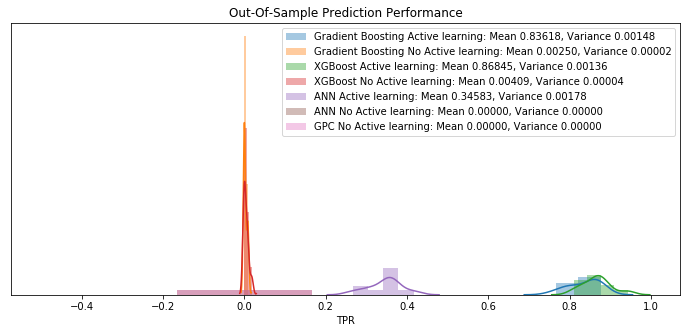

In [47]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(tpr.iloc[0, :], label = GBAL_label, ax = ax)
sns.distplot(tpr.iloc[1, :], label = GBNAL_label, ax = ax)
sns.distplot(tpr.iloc[2, :], label = XGAL_label, ax = ax)
sns.distplot(tpr.iloc[3, :], label = XGNAL_label, ax = ax)
sns.distplot(tpr.iloc[4, :], label = ANNAL_label, ax = ax)
sns.distplot(tpr.iloc[5, :], label = ANNNAL_label, ax = ax)
sns.distplot(tpr.iloc[6, :], label = GPC_label, ax = ax)

plt.title("Out-Of-Sample Prediction Performance")
plt.xlabel('TPR')
plt.yticks([])

plt.legend()

#fig.savefig("bh_OOS_accuracy_performance.png");

# Average TPR

In [48]:
ave_tpr = tpr.mean(axis = 1)
ave_tpr = pd.DataFrame(ave_tpr)
ave_tpr.reset_index(inplace=True)
ave_tpr.columns = ["model","TPR"]
ave_tpr.head(7)

,model,TPR
0,Gradient Boosting Active learning,0.836179
1,Gradient Boosting No Active learning,0.002495
2,XGBoost Active learning,0.868451
3,XGBoost No Active learning,0.004091
4,ANN Active learning,0.345831
5,ANN NO Active learning,0.000000
6,Benchmark GPC,0.000000


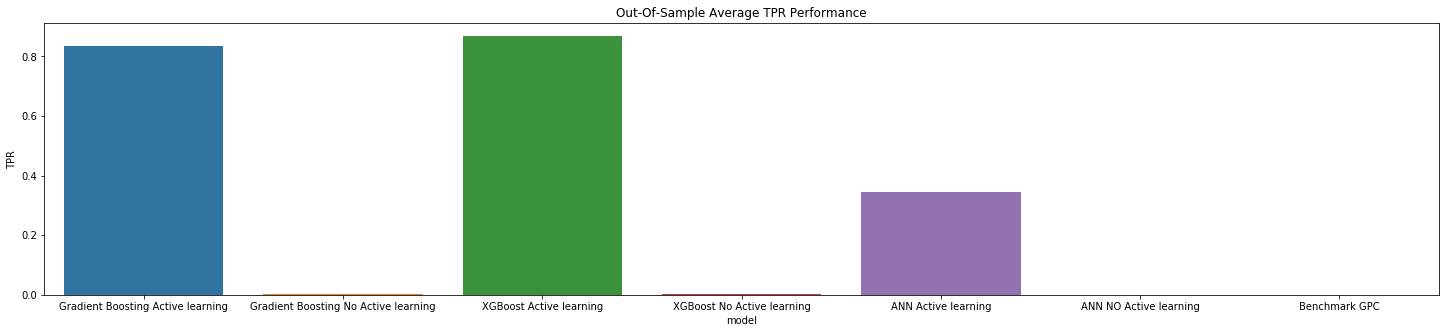

In [49]:
fig, ax = plt.subplots(figsize=(25, 5))

plt.title("Out-Of-Sample Average TPR Performance")
plt.ylabel('TPR')
sns.barplot(x="model", y="TPR", data=ave_tpr)

# The following shows the f1 score of all methods in a number of Monte Carlo simulations

In [49]:
from sklearn.metrics import f1_score

# f1 performance
f1 = np.zeros((num_experiments, montecarlos))
for experiment in range(num_experiments):
    for i in range(montecarlos):
        f1[experiment,i] = f1_score(y_test[i * test_size:(i + 1) * test_size],
                                              y_hat_test[experiment][i * test_size:(i + 1) * test_size])

In [50]:
f1 = pd.DataFrame(f1, index = experiment_labels)
f1.head(7)

,0,1,2,3,4,5,6,7,8,9
Gradient Boosting Active learning,0.759615,0.785714,0.783410,0.852174,0.839506,0.784689,0.794643,0.832714,0.792079,0.835341
Gradient Boosting No Active learning,0.016129,0.000000,0.032520,0.028571,0.043796,0.000000,0.088235,0.012500,0.032520,0.027586
XGBoost Active learning,0.757009,0.774704,0.762712,0.816667,0.812261,0.740741,0.813559,0.800000,0.790698,0.806084
XGBoost No Active learning,0.096386,0.069364,0.047337,0.104651,0.044944,0.088608,0.113636,0.074074,0.133333,0.102041
ANN Active learning,0.133333,0.078125,0.114754,0.096000,0.111888,0.068376,0.158730,0.040816,0.106195,0.113475
ANN NO Active learning,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Benchmark GPC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [51]:
score = f1
GBAL_label, GBNAL_label, XGAL_label, XGNAL_label, ANNAL_label, ANNNAL_label, GPC_label = create_labels(score)

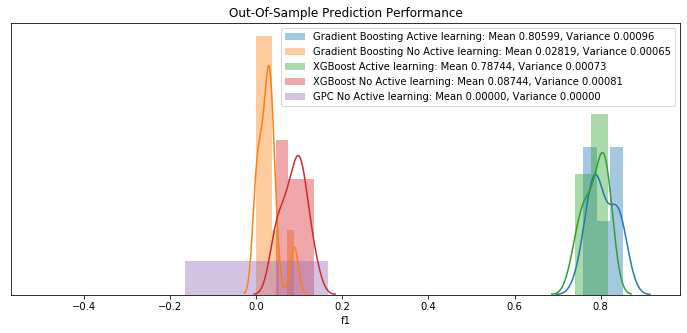

In [52]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(f1.iloc[0, :], label = GBAL_label, ax = ax)
sns.distplot(f1.iloc[1, :], label = GBNAL_label, ax = ax)
sns.distplot(f1.iloc[2, :], label = XGAL_label, ax = ax)
sns.distplot(f1.iloc[3, :], label = XGNAL_label, ax = ax)
#sns.distplot(f1.iloc[4, :], label = ANNAL_label, ax = ax)
#sns.distplot(f1.iloc[5, :], label = ANNNAL_label, ax = ax)
sns.distplot(f1.iloc[6, :], label = GPC_label, ax = ax)

plt.title("Out-Of-Sample Prediction Performance")
plt.xlabel('f1')
plt.yticks([])

plt.legend()

#fig.savefig("bh_OOS_f1_performance.png");

# Average f1

In [158]:
ave_f1 = f1.mean(axis = 1)
ave_f1 = pd.DataFrame(ave_f1)
ave_f1.reset_index(inplace=True)
ave_f1.columns = ["model","F1"]
ave_f1.head()

,model,F1
0,Gradient Boosting Active learning,0.805989
1,Gradient Boosting No Active learning,0.028186
2,XGBoost Active learning,0.787443
3,XGBoost No Active learning,0.087437
4,ANN Active learning,0.102169


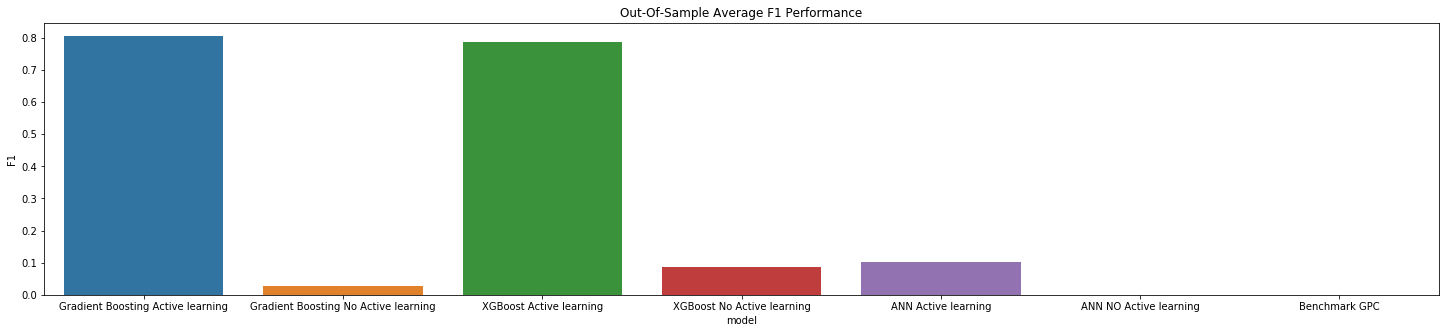

In [159]:
fig, ax = plt.subplots(figsize=(25, 5))

plt.title("Out-Of-Sample Average F1 Performance")
plt.xlabel('f1')
plt.ylabel('F1')
sns.barplot(x="model", y="F1", data=ave_f1)


# Loop through few budgets

In [55]:
tpr_hist = []
f1_hist = []
tpr_ave_hist = []
f1_ave_hist = []

stride = 500
start = 500
finish = 2500

for budget in range(start,finish,stride):
    # loop denotes which loop are we in
    loop = int((budget - start)/stride)
    
    # Set the ABM Evaluation Budget
    budget = budget
    
    print("We are at loop: {} with budget {}.".format(loop,budget))
    
    # Set initial evaluated set size, batch size and training pool size
    # ini_size = int(budget/2)
    ini_size = 98
    # batch = int(math.log(budget))
    batch = int(budget/50)
    pool_size = budget*batch
    
    # Build X_train_pool
    X_train_pool = get_sobol_samples(n_dimensions, pool_size, bh_exploration_range)

    # Output data as a csv
    pd.DataFrame(X_train_pool).to_csv("budget_" + str(budget) + "_X_train_pool.csv")
    pd.DataFrame(X_test).to_csv("budget_" + str(budget) +"_X_test.csv")
    pd.DataFrame(y_test).to_csv("budget_" + str(budget) +"_y_test.csv")
    
    # Build train data without active learning
    np.random.shuffle(X_train_pool)    # shuffle it first
    default_X_train = X_train_pool[:budget,:]  
    default_y_train = evaluate_bh_on_set(default_X_train, method, threshold)
    
    # Build first X evaluated batch with size ini_size
    np.random.shuffle(X_train_pool)   # shuffle it first
    ini_evaluated_set_X = X_train_pool[:ini_size,:]
    unevaluated_set_X = X_train_pool[ini_size:,:]

    # Evaluate the train set for the ABM response
    ini_evaluated_set_y = evaluate_bh_on_set(ini_evaluated_set_X, method, threshold)
    
    
    # -----
    # experiment 1
    # model: "Gradient boost" + active learning
    model = "Gradient boost"
    gb_X_train, gb_y_train = active_learning(ini_evaluated_set_X, ini_evaluated_set_y, unevaluated_set_X, budget, method, model, threshold, batch)
    pd.DataFrame(gb_X_train).to_csv("budget_" + str(budget) + "_gb_X_train.csv")
    pd.DataFrame(gb_y_train).to_csv("budget_" + str(budget) + "_gb_y_train.csv")
    # model.fit
    gb_active = fit_surrogate_model(model, method, gb_X_train, gb_y_train,batch)    
    gb_active_y_hat_test = gb_active.predict(X_test)
    pd.DataFrame(gb_active_y_hat_test).to_csv("budget_" + str(budget) + "_gb_active_y_hat_test.csv")
    
    # -----
    # experiment 2
    # model: "Gradient boost" + no active learning
    # model.fit
    gb_non_active = fit_surrogate_model(model, method, default_X_train, default_y_train, batch)
    gb_non_active_y_hat_test = gb_non_active.predict(X_test)
    pd.DataFrame(gb_non_active_y_hat_test).to_csv("budget_" + str(budget) + "_gb_non_active_y_hat_test.csv")
    
    # -----
    # experiment 3
    # model: "XGBoost" + active learning
    model = "XGBoost"
    XG_X_train, XG_y_train = active_learning(ini_evaluated_set_X, ini_evaluated_set_y, unevaluated_set_X, 
                                           budget, method, model, threshold, batch)
    pd.DataFrame(XG_X_train).to_csv("budget_" + str(budget) + "_XG_X_train.csv")
    pd.DataFrame(XG_y_train).to_csv("budget_" + str(budget) + "_XG_y_train.csv")
    # model.fit
    XG_active = fit_surrogate_model(model, method, XG_X_train, XG_y_train,batch)    
    XG_active_y_hat_test = XG_active.predict(X_test)
    pd.DataFrame(gb_active_y_hat_test).to_csv("budget_" + str(budget) + "_XG_active_y_hat_test.csv")
    
    # -----
    # experiment 4
    # model: "Gradient boost" + no active learning
    # model.fit
    XG_non_active = fit_surrogate_model(model, method, default_X_train, default_y_train, batch)
    XG_non_active_y_hat_test = XG_non_active.predict(X_test)
    pd.DataFrame(XG_non_active_y_hat_test).to_csv("budget_" + str(budget) + "_XG_non_active_y_hat_test.csv")
    
    # -----
    # experiment 5
    # model: "ANN" + active learning
    model = "ANN"
    ANN_X_train, ANN_y_train = active_learning(ini_evaluated_set_X, ini_evaluated_set_y, unevaluated_set_X, budget, method, model, threshold, batch)
    pd.DataFrame(ANN_X_train).to_csv("budget_" + str(budget) + "_ANN_X_train.csv")
    pd.DataFrame(ANN_y_train).to_csv("budget_" + str(budget) + "_ANN_X_train.csv")
    # model.fit
    ANN_active = fit_surrogate_model(model, method, ANN_X_train, ANN_y_train,batch)    
    ANN_active_y_hat_test = ANN_active.predict_classes(X_test)
    pd.DataFrame(ANN_active_y_hat_test).to_csv("budget_" + str(budget) + "_ANN_active_y_hat_test.csv")
    
    # -----
    # experiment 6
    # model: "ANN" + no active learning
    # model.fit
    ANN_non_active = fit_surrogate_model(model, method, default_X_train, default_y_train, batch)
    ANN_non_active_y_hat_test = ANN_non_active.predict_classes(X_test)
    pd.DataFrame(ANN_non_active_y_hat_test).to_csv("budget_" + str(budget) + "_ANN_non_active_y_hat_test.csv")
    
    # -----
    # experiment 7
    # model: "Gaussian Process Classification" + no active learning
    # model.fit
    gpc_non_active = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(default_X_train, default_y_train)
    gpc_non_active_y_hat_test = gpc_non_active.predict(X_test)
    pd.DataFrame(gpc_non_active_y_hat_test).to_csv("budget_" + str(budget) + "_gpc_non_active_y_hat_test.csv")
    
    '''
    print(gb_active_y_hat_test.shape)
    print(gb_non_active_y_hat_test.shape)
    print(ANN_active_y_hat_test.shape)
    print(ANN_non_active_y_hat_test.shape)
    print(gpc_non_active_y_hat_test.shape)
    '''
    
    # Gather all y hat
    y_hat_test = np.stack((gb_active_y_hat_test, gb_non_active_y_hat_test,
                        XG_active_y_hat_test, XG_non_active_y_hat_test,
                        ANN_active_y_hat_test, ANN_non_active_y_hat_test,
                       gpc_non_active_y_hat_test),axis = 0)
        
    # tpr performance
    current_tpr = np.zeros((num_experiments, montecarlos))
    for experiment in range(num_experiments):
        for i in range(montecarlos):
            current_tpr[experiment,i] = custom_metric_binary(y_test[i * test_size:(i + 1) * test_size],
                                              y_hat_test[experiment][i * test_size:(i + 1) * test_size])
    tpr_hist.append(current_tpr)
    
    # f1 performance
    current_f1 = np.zeros((num_experiments, montecarlos))
    for experiment in range(num_experiments):
        for i in range(montecarlos):
            current_f1[experiment,i] = f1_score(y_test[i * test_size:(i + 1) * test_size],
                                                  y_hat_test[experiment][i * test_size:(i + 1) * test_size])
    f1_hist.append(current_f1)
    
    current_ave_tpr = current_tpr.mean(axis = 1)
    tpr_ave_hist.append(current_ave_tpr)
    current_ave_f1 = current_f1.mean(axis = 1)
    f1_ave_hist.append(current_ave_f1)

# to include the first run (outside of the loop) results
tpr_hist.append(tpr.values)
f1_hist.append(f1.values)
tpr_ave_hist.append(ave_tpr)
f1_ave_hist.append(ave_f1)

We are at loop: 0 with budget 500.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 402 parameter unevaluated within budget.
Surrogate model predicted 362 positive labels out of 4902: 
Parameters bundles of indices:  [1601  192 3098 1959 1396 2978 1584 1056  849 2202]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 392 parameter unevaluated within budget.
Surrogate model predicted 242 positive labels out of 4902: 
Parameters bundles of indices:  [2145 2991  720 1538 2144 1481 2439 1499 3084 3985]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 382 parameter unevaluated within budget.
Surrogate model predicted 237 positive labels out of 4902: 
Parameters bundles of indices:  [3393 3098 2145 2289 2600 4659 2575 3684  965 4287]  are randomly selected from po

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 483 positive labels out of 4902: 
Parameters bundles of indices:  [2536 1432 4208  976 1868 4572 1948 4752 2038 2376]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 352 parameter unevaluated within budget.
Surrogate model predicted 349 positive labels out of 4902: 
Parameters bundles of indices:  [ 121  745 3898  642 4203 2646 2669 1698 1370 3529]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 342 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 268 positive labels out of 4902: 
Parameters bundles of indices:  [1791 4711 1510 1645 3209 2862 4204 1266  343  196]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 332 parameter unevaluated within budget.
Surrogate model predicted 321 positive labels out of 4902: 
Parameters bundles of indices:  [2837 4040  289 1161 3315 1140 3796 3607 2633 2402]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 322 parameter unevaluated within budget.
Surrogate model predicted 269 positive labels out of 4902: 
Parameters bundles of indices:  [4608 3989 1428 3351 3311 2063 3387 3358  325  190]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
----------------------------------------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 309 positive labels out of 4902: 
Parameters bundles of indices:  [2633 3747 1373 3598 2057 4060 4531  203 3595 1641]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 302 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 287 positive labels out of 4902: 
Parameters bundles of indices:  [1140 3156 1641 3618 3268  883 1948 4177  343  488]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 292 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 243 positive labels out of 4902: 
Parameters bundles of indices:  [2252 3031  790 1567 2221 1481 2536 1503 3098 4691]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 282 parameter unevaluated within budget.
Surrogate model predicted 283 positive labels out of 4902: 
Parameters bundles of indices:  [2055 1188 1641 3415 4531 3774 3596 4421  293  457]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 272 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 331 positive labels out of 4902: 
Parameters bundles of indices:  [ 862 1130 1894  914  813 2075  849  916 3750 4439]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 262 parameter unevaluated within budget.
Surrogate model predicted 294 positive labels out of 4902: 
Parameters bundles of indices:  [3444 3387  830 3728  462 3920 2987 3165 1005 1266]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 252 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 319 positive labels out of 4902: 
Parameters bundles of indices:  [4752 4046  293 1005 3180  976 3607 2376 2486 2987]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 242 parameter unevaluated within budget.
Surrogate model predicted 295 positive labels out of 4902: 
Parameters bundles of indices:  [3831 3775  242 3416 4410  795 3920  914 3390 1031]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 232 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 295 positive labels out of 4902: 
Parameters bundles of indices:  [3741 3697  242 3393 4287  813 3894  965 3387 1105]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 222 parameter unevaluated within budget.
Surrogate model predicted 321 positive labels out of 4902: 
Parameters bundles of indices:  [2729 3920  301 1031 3195 1005 3664 3387 2575 2340]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 212 parameter unevaluated within budget.
Surrogate model predicted 322 positive labels out of 4902: 
Parameters bundles of indices:  [3491 2298 4654  987 1490 4377 4657 4439 1298 2978]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
----------------------------------------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 355 positive labels out of 4902: 
Parameters bundles of indices:  [  80 1932 4184 2978 1365 3094 1615  883  563 4105]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 92 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 360 positive labels out of 4902: 
Parameters bundles of indices:  [  80 3031 1481 2963 1350 1618 3129  852  558 1658]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 82 parameter unevaluated within budget.
Surrogate model predicted 360 positive labels out of 4902: 
Parameters bundles of indices:  [  97 2993 1507 2925 1367 1645 3095  902  558 1658]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 72 parameter unevaluated within budget.
Surrogate model predicted 379 positive labels out of 4902: 
Parameters bundles of indices:  [1932 3997 3607 3496 2832 1184 4682  951 2252  717]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
------------------------------------------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 371 positive labels out of 4902: 
Parameters bundles of indices:  [1942 1948 4184  883 4030 1981  515 2115 1140 2993]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 52 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 367 positive labels out of 4902: 
Parameters bundles of indices:  [1481 3366  705  456 1188 4654 1359 4184 3131   80]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 42 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 384 positive labels out of 4902: 
Parameters bundles of indices:  [2691 1650 2376  790 3180 4195 3980 2195 3596 3853]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 32 parameter unevaluated within budget.
Surrogate model predicted 374 positive labels out of 4902: 
Parameters bundles of indices:  [1658 3925 4162 2742 2686 1420 3268 1942 1130  790]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 22 parameter unevaluated within budget.
Surrogate model predicted 386 positive labels out of 4902: 
Parameters bundles of indices:  [3276 4140 1893  790 2686 3903 3997 1878 4086  914]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
------------------------------------------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 378 positive labels out of 4902: 
Parameters bundles of indices:  [4751 2044 4177 3596 2984 1184 4454  951 1693  696]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 2 parameter unevaluated within budget.
Surrogate model predicted 405 positive labels out of 4902: 
Parameters bundles of indices:  [4864 2980]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 402 parameter unevaluated within budget.
Surrogate model predicted 546 positive labels out of 4902: 
Parameters bundles of indices:  [ 786 4040  902 1698 1326  309 4178  844 4561 1650]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 392 parameter u

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 363 positive labels out of 4902: 
Parameters bundles of indices:  [1602  192 4847 1965 1448 4040 1593 1130  883 2271]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 382 parameter unevaluated within budget.
Surrogate model predicted 418 positive labels out of 4902: 
Parameters bundles of indices:  [4377 2099 2837 4364 3853 3831 1888  149  260 3209]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 372 parameter unevaluated within budget.
Surrogate model predicted 471 positive labels out of 4902: 
Parameters bundles of indices:  [1071  814  289 1412 3805 3113 2709 4454 3989  948]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
----------------------------------------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 424 positive labels out of 4902: 
Parameters bundles of indices:  [1819  299 4861  161 1266 3031 4505 1338 2180 4010]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 342 parameter unevaluated within budget.
Surrogate model predicted 471 positive labels out of 4902: 
Parameters bundles of indices:  [1359  943  308 1593 3898 3222 2946 4522 4063 1161]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 332 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 396 positive labels out of 4902: 
Parameters bundles of indices:  [3091 1602 3095  965 1807 1499 4717 1776 1188  558]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 322 parameter unevaluated within budget.
Surrogate model predicted 313 positive labels out of 4902: 
Parameters bundles of indices:  [1233 4046 3311 2601 1894 2529 2252 1991 1370 4177]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 312 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 308 positive labels out of 4902: 
Parameters bundles of indices:  [1266 3976 4654 2145 3089 2467 4711 1321  464 1326]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 302 parameter unevaluated within budget.
Surrogate model predicted 296 positive labels out of 4902: 
Parameters bundles of indices:  [3903 3898  242 3658 4522  838 3997 1106 3618 1365]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 292 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 374 positive labels out of 4902: 
Parameters bundles of indices:  [1781 3974 4195 2862 2773 1507 3351 2063 1245  749]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 282 parameter unevaluated within budget.
Surrogate model predicted 1107 positive labels out of 4902: 
Parameters bundles of indices:  [4267 4177 2195 3684 2109 1420 3774 3515 4856 4030]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 272 parameter unevaluated within budget.
Surrogate model predicted 829 positive labels out of 4902: 
Parameters bundles of indices:  [4890  705   35 1649 3853 2182 1830 3985 3166 1960]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
---------------------------------------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 803 positive labels out of 4902: 
Parameters bundles of indices:  [1807  997 4647 2043 3914  902 2394 1958 4711 2686]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 252 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 750 positive labels out of 4902: 
Parameters bundles of indices:  [3209  786 1847  241 3701 3604 4689  132 3164 1255]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 242 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1032 positive labels out of 4902: 
Parameters bundles of indices:  [3148 4529 3977 1329 2144 4622 2417 1460 3219 2446]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 232 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 357 positive labels out of 4902: 
Parameters bundles of indices:  [2298 2851 1244 1942 3568 1789 1359 2263 3349 2660]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 222 parameter unevaluated within budget.
Surrogate model predicted 489 positive labels out of 4902: 
Parameters bundles of indices:  [4187 1449 2180 2592  951 4704 3755  296 4819 4616]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 212 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 405 positive labels out of 4902: 
Parameters bundles of indices:  [4847 2959  786 2837 1691 3775 3684 3260 3868 1350]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 202 parameter unevaluated within budget.
Surrogate model predicted 572 positive labels out of 4902: 
Parameters bundles of indices:  [2075 2298 2812 3391 1603 1341 3282 3209 3297 1928]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 192 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 512 positive labels out of 4902: 
Parameters bundles of indices:  [ 490 4663 2126 2536 1412 3209 3985 3902 4604 4522]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 182 parameter unevaluated within budget.
Surrogate model predicted 516 positive labels out of 4902: 
Parameters bundles of indices:  [ 883 4080 1760 3903 2984 3684 1445  168 3402 2758]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 172 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 506 positive labels out of 4902: 
Parameters bundles of indices:  [3180 3536 2145 3920  742  192 4717 3276 3011  965]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 162 parameter unevaluated within budget.
Surrogate model predicted 535 positive labels out of 4902: 
Parameters bundles of indices:  [1567 4238 1803 3804 4864 1957 4439 2144 3878 1491]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 152 parameter unevaluated within budget.
Surrogate model predicted 531 positive labels out of 4902: 
Parameters bundles of indices:  [3892 4067 2580 1934 4204 2691 2663  192 3515 2115]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
----------------------------------------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 444 positive labels out of 4902: 
Parameters bundles of indices:  [4603 1175 1428 4663  325 3893 1491 2686 2789 2633]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 72 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 604 positive labels out of 4902: 
Parameters bundles of indices:  [4643  490 4322 2930  501  568 2959 2607 1770 3351]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 62 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 528 positive labels out of 4902: 
Parameters bundles of indices:  [4177  457 3893  778 3165 1593 4400 4664  149 4530]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 52 parameter unevaluated within budget.
Surrogate model predicted 501 positive labels out of 4902: 
Parameters bundles of indices:  [1029 2669 2963 4438 3366  196 4060 2930 1689 1618]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 42 parameter unevaluated within budget.
Surrogate model predicted 492 positive labels out of 4902: 
Parameters bundles of indices:  [3658  951 3225 1432  196 4639 1408 4586  293 4377]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
------------------------------------------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 536 positive labels out of 4902: 
Parameters bundles of indices:  [1669 4281 1904 3863 4864 1981 4818 2182 2987 1569]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 2 parameter unevaluated within budget.
Surrogate model predicted 535 positive labels out of 4902: 
Parameters bundles of indices:  [3271 4847]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 402 parameter unevaluated within budget.
Surrogate model predicted 409 positive labels out of 4902: 
Parameters bundles of indices:  [1322 2911 3274 4006  367 3496 3042 4761 4621 2170]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 392 parameter u

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 4902: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 954 1693 2489 3078 3583 4358 4849 3246 4143 3811]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 382 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4892: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [1069  208 2908 2635 1970 4669  399 4657  164 2625]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 372 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 4882: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [3377 3803 2400 2970 1040 2331  553 1567 1387 2177]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 362 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4872: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [3059 1130 2513 1165 3506 1464 2420 4366 4811 4664]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 352 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 4862: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [4608 1390 1178 2824 1234 2276 4063 1108 2054 2951]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 342 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4852: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [1257  701 1784 3805 2887  881 1125 4380 1921 4141]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 332 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 4842: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [3237 4336  474 2571 4640 1340 1354 2278 4585 3878]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 322 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 4832: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [2254   70 3370 4149 1178 1492 2396  333  417 2018]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 312 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 4822: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [1395 3387 3726 1106 4125 2367 1123 4662 4446 3448]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 302 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4812: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [3166 3980 3170 3650 2371  982 3899 2726  668 3875]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 292 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4802: 


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 282 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4792: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [3975 3580  742 2284 4488 4468   42 3603   29 4717]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 272 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4782: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [4389 2164 2205  775 3175  804 1477 3335 1459 2876]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 262 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4772: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [4413 2616  783 2663 4574 3965 1618 3544 3267 3567]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 252 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4762: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [3815 2913 3657   15 2045 2823 4648 1741 4621 2457]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
T

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 4712: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [1198 2483 3865 3808 3030  196  734 3966 3829 3137]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 192 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4702: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [1120 1243  359  524 1968 2526 4223 3303 4658 2786]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 182 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4692: 


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 4672: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [1083 1645 3667 4380 3679   34 3784 2976 3736 2672]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 152 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4662: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 682 1420 2873 1529 2878 3863  636 2904 3087 4071]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 142 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4652: 


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 4642: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [2181 3086 4432  981 1326 2080 3647 3806 3799 1509]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 122 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4632: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [  23  293 4252 1171 3585 3045  526 3681  967 3218]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 112 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 4622: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 370  477 3059 2787 3405 4155 2380 1618 2407  806]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 102 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 4612: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [3105  983 2722 1274  102 3158 2074 3333  261 2447]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 92 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4602: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [1916 4456 3970 3955 1687 4387 3442 1623 4084   19]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 82 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4592: 
Pa

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 4582: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [1216 4113 3580 2515 2504  742 1512  952 1917 2602]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 62 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 4572: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [1699 1090  867 4393 2046 3093 1702 2595 2280 2795]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 52 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 4562: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [2995 2595 1502 3057 3119  982 1798 1846 4014 2966]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 42 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 4552: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [4003 2958 3179  787 4494 1390 2299  494 1118  757]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 32 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4542: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [1071 3151  714 3984 2024 2161  924 2793 4473 2675]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 22 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 4532: 
Pa

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 4512: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [1531 3413]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
We are at loop: 1 with budget 1000.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 902 parameter unevaluated within budget.
Surrogate model predicted 975 positive labels out of 19902: 
Parameters bundles of indices:  [16550  2591 15437  6109 12525 17136  7498  5808 15770  8361 19524 11770
   278 16767  4406 13380  7191  8639  6074  8233]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 882 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1610 positive labels out of 19902: 
Parameters bundles of indices:  [16384 16107 14484 11898 14342 19049  1845  1554 16345 11199 10349 17096
 14476 16454 14001 10044  5623  8057 11763 19670]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 862 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1908 positive labels out of 19902: 
Parameters bundles of indices:  [17513 12150 11007  3158 18331  2007   695  9278  6217  2665  5616 11412
 17905 16766 12816  2563 19586 19257 17647 15536]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 842 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1928 positive labels out of 19902: 
Parameters bundles of indices:  [ 7187 15335  1552 16883 10661 10434 18058  8413 19213  7119 10802 13153
 16530  4234  5471 11625  2344  4110 10574 12630]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 822 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1811 positive labels out of 19902: 
Parameters bundles of indices:  [19822 13963 10078  1151 16813  7527  7047  4017 16178   164  8271  7342
 16639 11710 13770 14546 12531  4727  7924  1575]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 802 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1754 positive labels out of 19902: 
Parameters bundles of indices:  [13071  7326  4542  6167 15077 14587 16783 11013 18961 19890  1575  2739
 18402  1740  2593  5367  8257  9309  1816  1403]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 782 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1937 positive labels out of 19902: 
Parameters bundles of indices:  [ 3063  3869  9808 16183  2665  2244 18020 10691  4739  2475   406   606
 11048 16184 13800  1575  9157  8964 19411 17263]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 762 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1851 positive labels out of 19902: 
Parameters bundles of indices:  [17444 12846 18838 16184   147  3877 11183 10448   926  2007 15335 13574
 10684  9818 14728  1166 16624  6442 15024  1313]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 742 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1899 positive labels out of 19902: 
Parameters bundles of indices:  [ 8422  6925 13943   853 14873  4134 14601 16363 16107  1970 11570  7997
  7413 17444  2848  4241  6052  1714  6850  2678]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 722 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2039 positive labels out of 19902: 
Parameters bundles of indices:  [ 8739  5560 13506 10725  1290   286 19871  8116 16324  1182 18455 18278
  9005  6898 14274 17492 15553  7498 10501  3883]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 702 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1960 positive labels out of 19902: 
Parameters bundles of indices:  [ 7433  9492  5759 18806   351  1956  5536  2134 18025  3876 15555  8303
 12077 17752  5345 13932 11706 13968  6969  3025]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 682 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2136 positive labels out of 19902: 
Parameters bundles of indices:  [ 7386 16419 17780 19525 15029  4773  8308 13331  4440  6369 15779 13766
 11926 14484 18280  5523  8454  1841  4828 16718]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 662 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2251 positive labels out of 19902: 
Parameters bundles of indices:  [ 9076  3972  9996  7314 10220 19180 11957 13043  6282 11457  1079 10756
  6963  8338  9615 16737 17479  7802  5243 11701]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 642 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2133 positive labels out of 19902: 
Parameters bundles of indices:  [ 6242  5402   295 11502  6445  5495  6120 15567  1894   930 14051  8792
 15354  4367  4363  2787  7794  8315  8976 16940]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 622 parameter unevaluated within budget.
Surrogate model predicted 2280 positive labels out of 19902: 
Parameters bundles of indices:  [14417 13052 16337  1181 17214   494 19407  1227 13034  5052  3107  8777
  2929  6037  1894  6242  1606 12864 19180 10470]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 602 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2151 positive labels out of 19902: 
Parameters bundles of indices:  [14601  9086 19839 10232  1015  9324 12815  9042  7974  1970  5382  4353
  6655 10443   494 17640 19191  9540  5773  2359]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 582 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2922 positive labels out of 19902: 
Parameters bundles of indices:  [17752  4958  4072  6759 15370  7813 12023 16766  8134    68  9798  6656
  4429  3865 17946 16500  4094  5387  3241 16923]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 562 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2117 positive labels out of 19902: 
Parameters bundles of indices:  [ 9343  9592 16140  8576 18589 15808  1254 13998 17292  4624 14902  2859
 14968  3567  2156  6469 18373  8364 16363 12199]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 542 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2068 positive labels out of 19902: 
Parameters bundles of indices:  [ 5674 11356  6717  8544 16126  2020  8539 17126  1191 14813  2386  7757
 12763  7468  7426 13619 12715 10677 15499  6080]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 522 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2106 positive labels out of 19902: 
Parameters bundles of indices:  [12715 15759 10199 15077 12364 19035 13142 11622 13754 15273  9702 18054
 12268   494 12825 10036 13046 10661 10294  9358]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 502 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2167 positive labels out of 19902: 
Parameters bundles of indices:  [12342  5622  4159   481  4753  3862 10325  9695  2257  6854  2806 13526
   641  1193 13336  1918  9168  7941 15713 18563]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 482 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2228 positive labels out of 19902: 
Parameters bundles of indices:  [ 9952 17777  1193  6732 18964  4206  8590 12191 19686 14621 10394 13518
  2266 19697  8266  5024 18293   275 12351  4909]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 462 parameter unevaluated within budget.
Surrogate model predicted 2252 positive labels out of 19902: 
Parameters bundles of indices:  [ 8875  3755  9802  7011 10066 19177 11751 13001  6024 11320   980 10581
  6698  8111  9462 16615 17443  7549  4791 11583]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 442 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2281 positive labels out of 19902: 
Parameters bundles of indices:  [14528 13153 16350  1180 17224   486 19379  1203 12988  5082  3128  8745
  2952  6058  1854  6261  1574 13119 19310 10389]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 422 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2319 positive labels out of 19902: 
Parameters bundles of indices:  [18479  4665  6543 11042  4723 12817  9032 12458 18331 17904   980 10714
  9054 15141  5340  5667  4410  8420  7396   432]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 402 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2252 positive labels out of 19902: 
Parameters bundles of indices:  [15240 17775 17536 14336 11462 17634  7993  5260  6442 18841  3792  2255
   104  4153  5750 13957 14959 11350 16723  6389]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 382 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2127 positive labels out of 19902: 
Parameters bundles of indices:  [ 5343 15199  8239   883 12671  5395  2859 15810  4402 15420  1475 16345
 10349   321 11537 18314  4098 18635  4666 14063]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 362 parameter unevaluated within budget.
Surrogate model predicted 2199 positive labels out of 19902: 
Parameters bundles of indices:  [10156  4121 11267  2242 15134   494 15647 18598  6925 16507  3553 13609
 13336 11342 19177 19418 17006  3854 19007  3571]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 342 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2261 positive labels out of 19902: 
Parameters bundles of indices:  [ 9952 10993  8162   667 11659 16591  5463 13979 17940  2134  4318  6148
  4465 11737  1458  7835  6568  8400  1166 19697]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 322 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2313 positive labels out of 19902: 
Parameters bundles of indices:  [18520  4666  6563 11042  4723 13754  9032  9198 18374 11281  1009  8926
  9069 14528  5303  5622  4434  8415  7420   481]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 302 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2295 positive labels out of 19902: 
Parameters bundles of indices:  [16822  4311   687  8266 17253 10389  2160  3272   489  4292  8262  6914
  2389 17491 10954  7034  4007 18247  1148  6600]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 282 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2255 positive labels out of 19902: 
Parameters bundles of indices:  [ 3599 16493 15096  7489  3354  4849 14111  1572  2551  9632  6221  6476
 11641 12825 14093 11494  8108  8805  7413 18820]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 262 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2285 positive labels out of 19902: 
Parameters bundles of indices:  [ 2334  8415 17655  1113  4985   474  3015  6323 10252 10857 10488  8662
 14187 12852  8727 13066  4753 11081 17705 18130]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 242 parameter unevaluated within budget.
Surrogate model predicted 2210 positive labels out of 19902: 
Parameters bundles of indices:  [ 5799  7050 13754  3541 10252  5702 12476  4238  5303  1155 16726 15582
   351  8805 10488  8116  5667  6916 12598  1050]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 222 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2242 positive labels out of 19902: 
Parameters bundles of indices:  [ 5736  3796 18493  2419 15940  6871 10294   573   362  8239  9565  8369
  4933  7034 14718   110 17962  5506 19752 14851]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 202 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2226 positive labels out of 19902: 
Parameters bundles of indices:  [ 9921 18146 15998  4782 12936 16280 19622 15434  2451 17007 19832 10504
  7679  6457  4092 17816 15199   296  4437  8599]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 182 parameter unevaluated within budget.
Surrogate model predicted 2218 positive labels out of 19902: 
Parameters bundles of indices:  [12759   705 14107  6708   279  5112 19871 11216  9025  8176  5356  6643
 17593  3106  6363 15538  7243  5671  4092  4510]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 162 parameter unevaluated within budget.
Surrogate model predicted 2221 positive labels out of 19902: 
Parameters bundles of indices:  [19094   695 10932  4889   287  4849 14187 13942

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2250 positive labels out of 19902: 
Parameters bundles of indices:  [ 3523  8745  9082 13641  1010  7141 11348  9689 15319 19177  1998  3960
    97 14935  5310  7187  5380 18613  9357  8979]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 122 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2230 positive labels out of 19902: 
Parameters bundles of indices:  [ 1018  5701   278 11986  3096  2113  3328   684 19839  7574 14336  6998
 11931 14870  9759  4393 11507 13373  8551  4834]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 102 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2212 positive labels out of 19902: 
Parameters bundles of indices:  [ 5694  6969 13740  3455 13526  5597 11508  4098  5011  1179 11535 15902
   354  9206 11111  7278  5570  6850 10352  1057]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 82 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2264 positive labels out of 19902: 
Parameters bundles of indices:  [10007 11065  8134   695 11709 16527  5415 13998 17886  2145  4277  6120
  4395 11795  1492  7807  6529  8385  1178 19686]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 62 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2234 positive labels out of 19902: 
Parameters bundles of indices:  [ 1057 18156   287 18201  8750  2145 14596   698  3305 19027  8811  3373
 19148 13563 13924 18826  7433 15233  8500 12458]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 42 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2253 positive labels out of 19902: 
Parameters bundles of indices:  [15883  5736  4786 11514 13029  6852 13964  8786  7649  2021 17277  4387
 19597 10249 12268  5612 13852 13984  7242  2712]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 22 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2215 positive labels out of 19902: 
Parameters bundles of indices:  [19850   695  8391 17554   296  4849 12860  3096  4541  2331  6529  6469
  6328  4207 11502 12737 19343 14559 17986 13386]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 2 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2247 positive labels out of 19902: 
Parameters bundles of indices:  [13468 11042]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 902 parameter unevaluated within budget.
Surrogate model predicted 2747 positive labels out of 19902: 
Parameters bundles of indices:  [17477 11143 17354 19460  7997  8598  6921  1341 15146 12691 11957  9753
 10026 14335  4206  8490 15769  6813  9932  1546]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 882 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2089 positive labels out of 19902: 
Parameters bundles of indices:  [  356  7913  3451  9426  2221 19062  5703 15017  8470  1341  1214 15660
  8739 16408  9329 18493  1554  4646 14601 14078]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 862 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2055 positive labels out of 19902: 
Parameters bundles of indices:  [ 8413 17914  6282 10527 15960 13965 16356 15069 17455  7580  1478  1788
  9381  8079  7529 10515 17780  1447  9889  5010]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 842 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1836 positive labels out of 19902: 
Parameters bundles of indices:  [ 9720 16019 10944  2244  5380  2122 14085  8916  5924 17829  2475  1714
  9621 10224 16779 16464  8729  1155 15030  4208]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 822 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1715 positive labels out of 19902: 
Parameters bundles of indices:  [12484   122  8487 15287  5473 16720  9105  9320  6665 15726   525 15780
  5367 13500  9737  2102   980  5671   606 16138]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 802 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1844 positive labels out of 19902: 
Parameters bundles of indices:  [13066  2390  3354  5473  7265   184  2362  5314 19670 11314 11833 16183
  7569 12988 10286 17421 14458 12014  2841   113]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 782 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1606 positive labels out of 19902: 
Parameters bundles of indices:  [11264  8362   999  3650  4331 16801 14075  9952  9052 12877  2242  7943
  9632 19583  2010   947  5809 18931 16935 11819]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 762 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1664 positive labels out of 19902: 
Parameters bundles of indices:  [ 8488   567   644  4646 12537  8875 15759  1033  6916 12576  6250   114
  8500 11701  1311 12670 12889  1197  9206  3465]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 742 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1799 positive labels out of 19902: 
Parameters bundles of indices:  [ 6270  8738 12593  4828 19122 12157 18976  2010  9324 19216  6700 15410
 16247 10010 18373   114  2841 12988  5094  9146]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 722 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1526 positive labels out of 19902: 
Parameters bundles of indices:  [17782  6476   126  4970  6024 18071  7801  2015  6543 13459 11189 15960
 14063  5701 15924  8966  3843 11348   406   654]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 702 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1624 positive labels out of 19902: 
Parameters bundles of indices:  [12936   942 10756  8362  3101  2141  3536 10279 10829 15428  9126 17306
 15076    87  2561  1894 14063  5380 12743  8490]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 682 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1879 positive labels out of 19902: 
Parameters bundles of indices:  [ 9828  1263  2204 14957 12598  7646 12880 18453 14269 16419  4575   175
  2653 14493  1122 13785  4556  9720  7434 15838]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 662 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2223 positive labels out of 19902: 
Parameters bundles of indices:  [14073   708 11111  4828   286  4792 19310 17466 13216  9747 17782  6578
  6175  6744 13641  9592  9572 11991 13140  5594]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 642 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2336 positive labels out of 19902: 
Parameters bundles of indices:  [ 6563 10485 10606 19834 14855 10349 13557 12891  9329  1151 14341 11221
  5354  4292 16423  1050  7234 15527 11207  1113]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 622 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1806 positive labels out of 19902: 
Parameters bundles of indices:  [18910  7483  2086 16350  3476 18146  1381  5581  6890  7376   695 15044
  6771 15950  4393    97 18421 10020 18688  9778]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 602 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2170 positive labels out of 19902: 
Parameters bundles of indices:  [ 1713  3433  3954 16841 19864 14637  5303 19278 12572  7968  5799 12845
  5477 19015 15065  1113  5750   858  6532  6991]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 582 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2372 positive labels out of 19902: 
Parameters bundles of indices:  [ 7087 18493   202  3174 10042 10993 10231  9616 19177 14865 14013 18644
 11136 13041  2172 12897 16720 13098  2266  6072]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 562 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1833 positive labels out of 19902: 
Parameters bundles of indices:  [ 1348  5759  2359  9203 16319 12237  5966   633  3158 10224 10849  3876
  5303  1696 14460 17378 17942  4292  4837  3226]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 542 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2436 positive labels out of 19902: 
Parameters bundles of indices:  [14380 17756  7016 17442   988  4087  2390 17440 14957  9390 18579 18053
  6217 13969  1696  7968 12043  5130  5915  3305]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 522 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1855 positive labels out of 19902: 
Parameters bundles of indices:  [ 7244  6560  8338 16260   132  5736 15499 10294   705  1707  4156 19550
 10562 15354 10220   937  7500 13616 15187  1105]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 502 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2280 positive labels out of 19902: 
Parameters bundles of indices:  [14559 13119 16423  1115 17440   494 19430  1182 13090  4742  3019  8632
  2779  5864  1799  6039  1538 12915 19228 10229]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 482 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2157 positive labels out of 19902: 
Parameters bundles of indices:  [ 5703 12082  2028  4017  4953 16184  5966  9285  4131   813 13140 13325
  4566   570 19266  3455  2174  4985  4933  3536]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 462 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1950 positive labels out of 19902: 
Parameters bundles of indices:  [  144 15527 16337  1841  3247  1213 11641 12864 15112  4208  5773 11706
   589 18525 18058 16841  2779  5472 18944  8149]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 442 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2178 positive labels out of 19902: 
Parameters bundles of indices:  [19797  4706  1057  5955  3094  5032 14790 11348  5935 13693 12870  2112
 12154  9979 19120  4481   780 12292  5395  8926]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 422 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2242 positive labels out of 19902: 
Parameters bundles of indices:  [ 5736  3741 18493  2390 16178  6969 10534   606   420  8423  9764  8558
  4928  7134 14942   114 18029  5456 19730 15044]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 402 parameter unevaluated within budget.
Surrogate model predicted 1924 positive labels out of 19902: 
Parameters bundles of indices:  [ 6175  8111  6623  7376 13033  2910  1501  8209  1752  2145  9818 14362
 17444   606  7752 18620 11143 11227 15713 17930]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 382 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1968 positive labels out of 19902: 
Parameters bundles of indices:  [  147  7577  3215 12720  5597  2554 19149 12726 18313 15371 19002 12436
  3296 11535 11042  4567 13616 19797  2933 18695]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 362 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2352 positive labels out of 19902: 
Parameters bundles of indices:  [ 4510  8807 14959  5806  8271 12560 18676 10101 15582   589  2086 11102
  3532 11624  7134 18767 19776 18563 14063 13800]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 342 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2179 positive labels out of 19902: 
Parameters bundles of indices:  [ 8079 19177  1057  5955  3024  8983 10009 11625 19622  3226  9592  2055
 16488  7904 13506 10252   787 13029  8490  8745]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 322 parameter unevaluated within budget.
Surrogate model predicted 2281 positive labels out of 19902: 
Parameters bundles of indices:  [14406 13066 16292  1203 17209   499 19388  1268 12862  4708  3025  8590
  2787  5749  1887  5945  1606 13034 19343 10197]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 302 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2527 positive labels out of 19902: 
Parameters bundles of indices:  [ 9069 17224 17881  8412 19583 18080  8012  5377 14497  2389  6568 13336
  1537  5772 10534 15037   573  1610 15582 18852]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 282 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2437 positive labels out of 19902: 
Parameters bundles of indices:  [ 4525  4292 13088  2141  9005 18212  7062 12864  2185  9048 15511  6668
 17531  8100  9313 14118 14092 17940 10046  1683]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 262 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2390 positive labels out of 19902: 
Parameters bundles of indices:  [16157  3393 12255 12138 17851 15349  9054   471  6462  8784  8775 11502
 17946 12593  7065 12825  3466 16237  3786 16419]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 242 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2318 positive labels out of 19902: 
Parameters bundles of indices:  [ 7821 12671 12939 19213 10903 18902 17000  6373  6755 12252 13068  2255
  7328  9278  9067  2571  7331 19027 18287  9772]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 222 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2497 positive labels out of 19902: 
Parameters bundles of indices:  [10172 19279 11508  8317  7342 17149 10954  8391 10264 10914   313 13500
 17930 16294 11267 16808  6369 16521  5373  8463]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 202 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2373 positive labels out of 19902: 
Parameters bundles of indices:  [ 6902  3743  1683  6331  4153 12351  6217 11471  4387  6962  3869 19165
  9620 14073  8959   942  3086 13783  5312  6969]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 182 parameter unevaluated within budget.
Surrogate model predicted 2300 positive labels out of 19902: 
Parameters bundles of indices:  [ 7941 15619 15120  1970  9343   482 16765  3541 12269  6813  8776 10967
   347   684  4153  8581  4889 11920 17254  8108]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 162 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2004 positive labels out of 19902: 
Parameters bundles of indices:  [ 8712  2801  6655  2302 17002   132 14852  1341  3174  1204 17325   570
 19148  1151 13216 17444  2712  9519 16954  3246]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 142 parameter unevaluated within budget.
Surrogate model predicted 2299 positive labels out of 19902: 
Parameters bundles of indices:  [ 5373 13776   641  7835 18563 17554 17594  7473   489 16384  1365  4437
  1983 15134 13842  1987 11926 15096 12688 18573]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 122 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2374 positive labels out of 19902: 
Parameters bundles of indices:  [14406 11685  8410   564 19132 16322  6369 10190 11329  7217 17752 19334
  8551 12900 14166 18728 17292  9932 10212  6466]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 102 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2604 positive labels out of 19902: 
Parameters bundles of indices:  [17655 18374  1179 18789  6529  7904 16883 18020  9424 14919  7038 14871
 18658  6229  6634 12909  5724 17942  5402   287]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 82 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2386 positive labels out of 19902: 
Parameters bundles of indices:  [15335 10922 12136 19051  8685 11417   354  7100  4542 19723  3541  8805
  3158 10547 15600  7113  9040  7336  3896 10224]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 62 parameter unevaluated within budget.
Surrogate model predicted 2262 positive labels out of 19902: 
Parameters bundles of indices:  [ 9695 10686  7943   606 11462 17545  5224 13915 17948  2010  4093  5916
  4222 11531  1375  7624  6334  8124  1113 19686]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 42 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2400 positive labels out of 19902: 
Parameters bundles of indices:  [16014  2010 15902 13468  3174  8936  2374  9592 17306  3731  5275  7047
 16819 12172  8738   474 17292 13066  1178  6134]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 22 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2896 positive labels out of 19902: 
Parameters bundles of indices:  [15808  8654   123  6497  1510  6529 18585 14906  5553  8898  2806 14480
  2943 14353  5367  6698  3865 15902  1991  8075]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 2 parameter unevaluated within budget.
Surrogate model predicted 2686 positive labels out of 19902: 
Parameters bundles of indices:  [ 2140 10488]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 902 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 19902: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 5508 13998   620 17402  8896 1

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 149 positive labels out of 19882: 
Parameters bundles of indices:  [13621  2242   227 11338 15386  6274  3245 17817  5317  6613 12900  3519
  8907   137  8300  6391  5382  1197  5909   563]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 862 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19882: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [12544  4624 10315  4756 14327  6017  9912 17878 19649 19120 15299  2696
  9362 19304  7022  3188  3830 10965   429 15292]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 842 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19862: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 5155  2889  7304 15569 11848  3602  4613 17989  7853 16969 19434  7097
   259 14451  9641 17648  3349  4817  9368  2682]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 822 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19842: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 2672  4152  1117 16488   295  4482 16713 18210  6418 13543   523 18666
  4186  2962  1801 13276  6594 10469 19514  2464]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 802 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19822: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [15217 10060   814 11069 16806 10069 14718  9392 11102   917  6170 17810
  6134  9017 11300 15184  4938  1452 17052 14173]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 782 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19802: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [16409 14799  3073  9433 18583 18509   186 14901   124 19498  8257 19293
  7274  5797  6261 14460  3948 17117 11696 19224]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 762 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19782: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [18349 10845  3267 11054 18987 16414  6726 14712 13571 14804  9574 18211
  7369 19065  2408 18472 15084 18922 10945 18557]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 742 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19762: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [  243  3061 13535  8249 16515  8488 14096 11196  2379 14193 13964  2294
 11110  6644  9083  8371  2076  3130  1721  3814]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 722 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19742: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 1012 17599 16616  1682 15761 19003  9722 11221 13413  5260 12825  9382
  8013 17843 15746 18482 16518   821 11983 13761]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 702 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19722: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [18311  7779 12497 19445  6271 13646 17181  4539  2116 10032 18579 17173
  4272 18665  7913 16872  2098  8141 10710 11841]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 682 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19702: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 4740  5269  1546  2242  8257 10601 17731 13900 19520 11707 18505 16849
   551 15686  4401 18690  2364  4054  5986    59]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 662 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19682: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [18676 17925  5455  7440 18072 11402  7278 15750 18198 13259  4551 16119
  8288 13743  9576 18523  1350  3070  3837  4355]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 642 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19662: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 9948  5025  8248 15476  5332 15984   248  2799 18212  9251   998 12003
  8973  1733  6841 12077 12340 17454  9682  2054]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 622 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 19642: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [   99  1239 18083  4936 15203 12905  2200 15608  4070 13648  7478 10691
 18607  5085  5917  5746  7268 11327 15716 17560]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
----------------------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19622: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [13223  4161 11605  5414   439 13444  8808 14197  1103 10398  1063  2809
 15381  4470  1822  2768  2762 16557 11581 15541]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 582 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19602: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [15999 11655 11050  7103  5485  9368  5014  6652  8634 16525 18242 16253
 10299 13940  6569  9000 18439  6956  3388  9252]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 562 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 19582: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [15131  8990  3675 11703 10847  9796  1147 15221 10543  8432 15948  3855
  5324 12524  7633  5936  4987  9508 15182 15759]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
----------------------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19562: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 5606 10418 15901  7871 18933 13002  6111 10970  7321 17853   938  4449
  1876 15739  3722 14510 10973 16228 19464  3001]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 522 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 19542: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [14491  6120  2032 16116   195 17063  2079  2454  3244  2901 15522 15834
  3308  2198 11185 13669 10919   545 14963 13953]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
----------------------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19502: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 6249  7634 11213 13447  9056 15352 12316 11614  2823  3328  6099 18782
  1483 18739  9292  8489 16511 16206  2600 15813]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 462 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19482: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 1654 11010  4967 17878  6869  5096 17201  6965  3359 18241   125 15202
 19286  3175  5921 11075  6134 10542 17618  5430]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 442 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19462: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [16202  4916 13834 14219 11189 18987  6183  7627  3158 13805 13065  3159
  1148 16314 15246  8527 14757 12112 17568  1381]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 422 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19442: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 8739  9188 17443  2301 18739 15101  4929 10644  2198 17296 18557  8731
 12842   287 12543 10293  7477 13025  8066  7421]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 402 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 19422: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [15467  4145 18775 15359 11704 14229  9044  1782 12328  8033 19015  1194
  3066 17488  9392  3701  6022  1464 12272 17885]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
----------------------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1 positive labels out of 19402: 
Parameters bundles of indices:  [3732]  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 4251 13415  4361 17617  8057  9369 13417  6904 18288  5251 18737  7448
 15090 15661 11982 15701 11390 11621  2691]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 362 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 161 positive labels out of 19382: 
Parameters bundles of indices:  [ 4041 14117 18300 12361 17470  9091 13032  7787 13308 11002 11867 13250
 11951 14049  8835  2015 19298  2082   450 16656]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 342 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19382: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [15411   321  8505 12519 17044  8157  8132  8007 18418 11444  5631  7300
  6793  3637  9896 10303  2315 11519  8248 15973]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 322 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19362: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [16367 17319 16195  1026  5216  7295  1791  8457  9052  7889 16305  9360
 14410 13933  4302 11283   999  9557  2231    44]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 302 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 19342: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 3849 11262  3734  1218  8594 12241  1803 10551  8363  4875  3263  4462
 17341   599  2815  9926 13120  7844  4577  5261]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
----------------------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19322: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 4365  6708 10879  9868  1185  4593  5003 12746 18379 14369 13080  2706
 17270  6352  2805   497  3448 16518  4870  5546]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 262 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19302: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [13623 14421  8720 10336  3824 17490 10033 12409 19150 18847 17323  4695
 12919 10612  5268  7980 15488 14034  1631  2593]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 242 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19282: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 9900 11750 10933 10963  9500  3924 13040  9677 16139 15439 10310  7294
  9929 17784 10032 10256  9924 18757 17287  7767]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 222 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19262: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [16050 14601  8816  9806 18161  8687  3857  6131 10914 12730  9929   323
  9778  8271  5007 17025 15595  5912   843 15967]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 202 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19242: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 6924  9107  8884 18465  8296 17571 17494 14301  3829  8107 12351  4869
  3014  9177 11472 12397 11703  5546  6618  7278]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 182 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19222: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 2197 17994 16579 16675 18342 18631 17498 18431  5264 13174 15996 18363
  4004 16315  7068 11593  6609 15286   501  7695]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 162 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19202: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 1826  2920 16613  9134  3007 17619 13847  4809 16837 14120 19097  1485
 11831  4937  2880  5511 13907 12017  5952  1976]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 142 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 19182: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [11532  5702 13491 11423 13874 14338 13911 16729 18445  8937  5198  9593
  1621  6482  5998 11354  6262 12937  9346 17176]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
----------------------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19162: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [  924  5698  2275  7613  3258  1290 12328 10155 16897  2940  6596 11101
  1512 17102 18518 10234 15807  9340  1797  7623]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 102 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19142: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 9563 16982  8492 12200   893 13095  9854  8872 19056 17407  8821 17247
 12108 17605  5874 13005  8756  2746 15083  5472]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 82 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2 positive labels out of 19122: 
Parameters bundles of indices:  [  615 10991]  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 1688  5135  8287  3840 14998 14764  4578 14377  6402 12168 10517 10420
  3623  3026  9099 17021   870 10662]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 62 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 19102: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [16912 13164 16480 16578  8590 13637  7101  5367 18383  7975 16380 11427
  6553  7127 16011  3749  8636  1190  4865  2548]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 42 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 349 positive labels out of 19082: 
Parameters bundles of indices:  [17329  7881  2266 13019  7342  8311 11154  2141 12824  9279  7689  8293
  8073  6356 18418  8687 11261  7392  8278 11989]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 22 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 19082: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 8104  2137  9728  9964  8278  2297   670   685  2132   533 13092 17883
  4017 16757  9962  1434 16660  8969 18306   139]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 2 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 47 positive labels out of 19062: 
Parameters bundles of indices:  [3976 2076]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
We are at loop: 2 with budget 1500.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 1402 parameter unevaluated within budget.
Surrogate model predicted 2343 positive labels out of 44902: 
Parameters bundles of indices:  [23634 25423 31225 13167 39594  6321  3241 26928 21950 33878 11262 31659
 22312 42170 18502  5757 18731 13965 15336 20855 27383 38241 36372 19732
 26926 43340 26862 39038  3080 19608]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1372 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 3098 positive labels out of 44902: 
Parameters bundles of indices:  [35604 22252 39842  9820 29107 13358  3510 21048 13062 34230 10231  8226
  3166 37987  8876   526 39635 39377 38467 14465 14394 28232 29521 15283
 21034 24389 33300 13444 28795 26950]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1342 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2643 positive labels out of 44902: 
Parameters bundles of indices:  [42581 13568 20457  8594 11190 23977 11868 41275  1322 36009 23128 41082
 32266  7344 16645  4159 42820 22081 33500 30150 12577 25282 39630 42097
 32817  3619 12792 20810    99 37518]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1312 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1796 positive labels out of 44902: 
Parameters bundles of indices:  [  489  7476 28535 13063 15237 17813 23795  7172 35758 38672  2077 16285
 12053 29479 30280 25776 33769 36120  5916 24943 24880 21523 18815 17556
  4111 27137  8964 18502  9538 41463]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1282 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1094 positive labels out of 44902: 
Parameters bundles of indices:  [31439 30046 30203 40004 19829  1058  7175 15256 14125 15096 38516 35344
 20045 12081 27963 43063   526 15335 32909 37494 42154 35039 12501 25598
 16504 31576 26639 38278 34711 38437]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1252 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1300 positive labels out of 44902: 
Parameters bundles of indices:  [37346 16891  6968 11009 33180 41948 38278 21109 19581 12073 15821  1235
 32620  1916 17072 15529 27223 11221  1950 30312  5992 33833 10877 36753
  4403 11962  1151 35537 20457 13066]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1222 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1356 positive labels out of 44902: 
Parameters bundles of indices:  [15992   183 22223  1884 26061 37494 36695  6014  8967 31375 38168 40779
 44479  6467 23721 21982 35165 31118 12642 26168  6321 21035  2891 15017
 36168 26928 36765 17736 29710 31238]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1192 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1830 positive labels out of 44902: 
Parameters bundles of indices:  [16020 13505  1478  5310 43522 26991 22978 11761 11006 10960 36014    80
 35398  5084 25998 30842  3952 32575 42304 11283 13051 43779 13321 27968
 22884 44365   524 30674 24020 34205]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1162 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2268 positive labels out of 44902: 
Parameters bundles of indices:  [17781  3696 11564  9173 22249 11645 38993 15664 11546 14402 18661 10117
 13948 16320  1202 41534 34752 37206 36570 36973  2569 37335 24610  1788
 19099 28605 18225 42257 28364 12520]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1132 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1773 positive labels out of 44902: 
Parameters bundles of indices:  [  549 37887 24200  4959  8468  3736 32856 25540 36934 11306 14792 29065
  2077 35102 32019 26850  7090 14125  2212 33726 21162 36765 17045  7770
   526 26631 11161 35767 21060 21048]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1102 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1951 positive labels out of 44902: 
Parameters bundles of indices:  [  526 34474 21967  4484  7818  3322 29965 23075 33589 10260 13574 26601
  1913 31740 29479 24322  6551 12916 42639 30602 19192 33436 15680  7172
   525 41002 10078 32486 19089 19074]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1072 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2245 positive labels out of 44902: 
Parameters bundles of indices:  [41463  2103 12263 22884  2494  5508 36695 36128 27086  3087 27064 27782
  3904  1919 25366 20888 35128 18117 29274 28877 17858  8242 34728  4942
  8034   771 27388 39846  9740  9476]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1042 parameter unevaluated within budget.
Surrogate model predicted 2085 positive labels out of 44902: 
Parameters bundles of indices:  [ 6667  8232 21162 33765  5642  4953 37647 41860  9957  5326   985  1478
 23520 42257 28877  3364 19455 18975 43893 35776 18304 14398 20382 27266
 16845 33436 30112 32104 39296 26165]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1012 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2844 positive labels out of 44902: 
Parameters bundles of indices:  [14410 26079 29874  1692 37187 11940  3217 22573 28699 27152 17582 33314
   599  2475 43314 40349 23128  6713  9660 32613 16584  7369  1886 16083
 11761  4356 27636 24498 25251 10868]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 982 parameter unevaluated within budget.
Surrogate model predicted 2602 positive labels out of 44902: 
Parameters bundles of indices:  [15635 43510 13503  1224 39917 37279 40212 34790 38653 40664  4367 31108
 38464 25815 19113  3198  7106 41320  7386  3150 20935 40198 12252 36985
 30424 18502 17006 29849   174 17607]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 952 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 3132 positive labels out of 44902: 
Parameters bundles of indices:  [26422 39917 43571 40686  4296 27609 42746 23867 35099  7147 31889 39473
 35857 42348  9816   110 10203 15002 26118 40909 33058 43411   348  8994
  9817 19332  8689 17950 18282 34440]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 922 parameter unevaluated within budget.
Surrogate model predicted 3589 positive labels out of 44902: 
Parameters bundles of indices:  [39303 27585 14942 32328 27717  7816 12917 21416 16969 16322 24387 43509
 14375 25584  8784 36098 23520  1706   612 19471 14208 35216 42329 10635
 35646 25845 18911  8652  6751 33627]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 892 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4172 positive labels out of 44902: 
Parameters bundles of indices:  [ 6096  7160 43156 40816 15603 10134 11701 22251  7211 37974 11424   535
 36746  9254 40521 18146 35973  7333 31379 42962 33181 15529 27137  8414
 11933 38774 43707  3829  5730 19805]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 862 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4063 positive labels out of 44902: 
Parameters bundles of indices:  [24535 37352 24845 33948  6461  6103 31496 36109 11099  2535  7480 39381
 15977 37733 13131  1656 23926 17553 14321  1133  5129 14932 42912  5923
 13767 39303 38112 39594 10745 21722]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 832 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4088 positive labels out of 44902: 
Parameters bundles of indices:  [10482 34882 18871 21675 37003 35070 38055 32195 38978 33543 33710 43484
 27374 21718 35121 19721  7718  6763 42887 14504 38899 33186 15202 12528
  2117  5918  6332 33179 34755 28524]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 802 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4186 positive labels out of 44902: 
Parameters bundles of indices:  [38192 15034  5409 39989  9848 15568 34115 35705 36641 22529 16369 43189
 39074   846 28498 15472 30918 21533  3456  6321 43315 34749  1706 41130
  6179 32505  5027  7809 35201 14062]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 772 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4664 positive labels out of 44902: 
Parameters bundles of indices:  [ 8999  4997 22036 30918 28968 21271 35121 22907 25148 22884 27402 21416
 44367 22733 18893 14381 29203 43006 27514 43039 11215 23715  5642 13175
 42279  3927  1059 27831  5294 34091]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 742 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4308 positive labels out of 44902: 
Parameters bundles of indices:  [11901 28142 19042  5052  5928  4373 27158 23946 14358  9159 22983 12900
 13626 35201 18230 38494 14051 42118 24633 22046 20344 15807 26443  5809
 30767 19702 35473 21438 27039  9154]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 712 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4304 positive labels out of 44902: 
Parameters bundles of indices:  [23950 38967 34202 27273 13384 23175 14190 38928 13011 32248 40396 23867
 12678  5294 43504 11291 44676 25891  9672  6805 10123  5693 42861 39032
 21045  9276  4887 18973 42138  3439]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 682 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4608 positive labels out of 44902: 
Parameters bundles of indices:  [40816 26427 23509 38278  1706 37305 43709  5176  5713 14650 22309 23920
 35539 15107  5471 23446 34192 14410 33888 42683 23451  1579 30086 25202
  8647 32486   437 16965 11832  4078]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 652 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4440 positive labels out of 44902: 
Parameters bundles of indices:  [ 7647 36368 27799 33874 22979 15742 29006 22874  4953  6725 11933 30842
 38464 38432  8118 26850 22695 10425 10056 40178  7750  8711 12562 31782
 32817 31092  9779 44435 43968  8628]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 622 parameter unevaluated within budget.
Surrogate model predicted 4620 positive labels out of 44902: 
Parameters bundles of indices:  [ 8647 29544  3769  1310 37161 26100  5117  6401 18441 15548 23227  6999
 36531 17912 37807 34235 35842 14347 20894  5454  6477  8414 38213 18365
   427 27522 42746 21147  2101 35224]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 592 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4715 positive labels out of 44902: 
Parameters bundles of indices:  [18804 31722 33169 24142  2989 21935  1579 31672 38700 40014  1479 26738
  8384 16744  9205 42183 32273 28477 39186 41897 14125 13459 30803 16809
 37987 26928 12173 34091 19286 13937]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 562 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4771 positive labels out of 44902: 
Parameters bundles of indices:  [ 1316 40140 37438 28045 12777  4078 43312 15977 15637 13955 12542  1157
 38278 23598 23985 27799  3086 31677 42991 28029 39735  5634  4905 42068
  9897 28436  3172  1473 37977 27131]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 532 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4785 positive labels out of 44902: 
Parameters bundles of indices:  [30055  5916 34749 21919 20702 43344 39499 26554  8173 21900 35767  9870
 19195 12593 42763 15002 20613 43718 12865  1573 35758 21480 37977 10159
   410 41689 13891  4786 11867 41121]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 502 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4759 positive labels out of 44902: 
Parameters bundles of indices:  [21227 40463 38517 24439  2827  7750 20071 19602 14379 38704  3860 33314
  8440 24851 41356 30636 38822  5286 33042 15357 20054 37334 40100 21919
 20198 17471  4733 33175 32553  8964]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 472 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4847 positive labels out of 44902: 
Parameters bundles of indices:  [ 3970  8333 25250 36570 22611 43065 13879 11641 42248 30027 17384 41177
 30286 41295   985 27385 26871 33343 28431 14062 21817  1151 36808  5817
 12463 37606 41849  4628 15944 13224]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 442 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4753 positive labels out of 44902: 
Parameters bundles of indices:  [ 3117  1519 40082 17569 35973 41771 15776 38782 41722 10322  1217 34866
 17813   483 37508  5032 43840 38254 13401  3449 22359 26194 13503 14474
 34699 31594 33264 38491 32121 24211]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 412 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4789 positive labels out of 44902: 
Parameters bundles of indices:  [31145  6027 37364 25604 23313 38352 19422 18324  8145 18570 33784 34177
 29351 17465 36680 21647 35325 30665 12920  1551 22529 34237 10922 32328
   418  9459 41309  4832 11901 11671]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 382 parameter unevaluated within budget.
Surrogate model predicted 4830 positive labels out of 44902: 
Parameters bundles of indices:  [42178 23469 12516 43009 44103  3642 38995 14669 17433 13380 13514 24443
  3378 32662 16148 32676  5184 27167 17599 25598 42654  1421 17191 10413
 31238 23625  9053  8003 19318 36217]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 352 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4851 positive labels out of 44902: 
Parameters bundles of indices:  [ 3961 36821 43113 12437 40955 34908 14143 26292 15821 23102  8232 14701
 44237 27425   981 27636 19702 36478 32786 39134 12172  1154 16148  5740
 36960 22240 10797  4662 16287 26490]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 322 parameter unevaluated within budget.
Surrogate model predicted 4854 positive labels out of 44902: 
Parameters bundles of indices:  [ 3933 36790 41651 12370 41059 31135 14125 15258 16989 22993  8203 27955
 20634 38502   967 34115 30258 23798 43850 38641 12093  1133 25787  5728
 36913 39414 10724  4602 26401 41430]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 292 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4855 positive labels out of 44902: 
Parameters bundles of indices:  [23359 44451 24030 38699 42550 40789 36213 31741  4315  2979 41941 18056
 37150 20168 31107 38136 12574 16728 17372  5306  3018 39473 27889 28511
  3409 11138 12974 42719 17384  3920]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 262 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4895 positive labels out of 44902: 
Parameters bundles of indices:  [36999 16032 35179 19099 37932 35085 34122 18227  4564 28490 34936 35200
  8784  9149  1376 30619 27005 28373 25107 44001 38234 33879  3006 25769
 37929 12710 44346 32496  6640  8103]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 232 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4891 positive labels out of 44902: 
Parameters bundles of indices:  [ 6999 30158 11030 12533 41023 19843  4953 13334  3019  9656 35054 27036
 24498  8482 24087  4571 10124   482  1408 41242 33918 38055 29083  1133
 25871  8079 12226  1516 14722 44537]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 202 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4833 positive labels out of 44902: 
Parameters bundles of indices:  [33882 30715 10321 34177  9913 19972 41849 34476  1985 40813 19874  4473
 17544 43510 39993 20243 41116 44749 29006 10078 28196 43850 18303 39778
 21923  5165 35526 10991 21982 25107]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 172 parameter unevaluated within budget.
Surrogate model predicted 4913 positive labels out of 44902: 
Parameters bundles of indices:  [21349  1237 41911 15648 23728 11353 30379 29308 25088 13324  2871 24016
 39246 13423 18199 27899 34375 13015 39074 44087  8031 12189 37402 36779
   455 40908 43032 18973 16111 22919]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 142 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4857 positive labels out of 44902: 
Parameters bundles of indices:  [ 3919 41141  7160 43441 14169 31265 13899 16606 13035 11862 41072 33618
 18098 39615   964 36414 13227 19378 25740 43657  9610  1116 25250  5728
 12554 22053 10726  4570 25217 27999]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 112 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4786 positive labels out of 44902: 
Parameters bundles of indices:  [37363  5928  9030 21923 30464 38424 19409 20749  8103 18545 15024  9903
 19251 39055 39158 31531 37579 30699 19454  1522 22847 21523 21597 18464
   426 39074 21535  4702 26107 36368]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 82 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4735 positive labels out of 44902: 
Parameters bundles of indices:  [29544 32195 41014 35495 32272  6247 10540  3166 40396 18882 28891 14391
 14322 21330  8206 35276  1479 16584 40362 40738 42967 23638 27107  1540
 30830 37778 32575 15914 34284 13546]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 52 parameter unevaluated within budget.
Surrogate model predicted 4799 positive labels out of 44902: 
Parameters bundles of indices:  [43484  5634 23429 17605 34841 23360 21998 12808 31672 37104 35198 31392
  8967 40629 30336 30185  4649 17471 40321 17619 13460 39625 26145 29572
 16744 16007  1421 29385 39552  4940]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 22 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4897 positive labels out of 44902: 
Parameters bundles of indices:  [25146   409 12777 33322 19279 19484 13122 36149 11181  9016  9817 23584
 35619 27836 35131   463 42053 38473 40909 44519  6027 29689]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 1402 parameter unevaluated within budget.
Surrogate model predicted 2194 positive labels out of 44902: 
Parameters bundles of indices:  [ 2576 33405 28877 39908 19926 31834  9766 27043 35226 40026 22907 11724
 40001 15810 26875 38449  3938 10320 32667 15323 11170 15828 40254 25251
 10236 24521  7292 17853  1235 29160]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1372 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 3675 positive labels out of 44902: 
Parameters bundles of indices:  [ 6461  7750 30386 14637 37046 31145 12370  8333 18539 23791 13507 31092
 22782 15807  9401 22055 16718 33169 35145 13232 20987  5730  1151 40252
 15202 16845 13840   396 11015 34122]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1342 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 7567 positive labels out of 44902: 
Parameters bundles of indices:  [17010  1419 28821 27506 28364 30556 30102 29577  5859  7584 10972 41731
 31574 23718 34942 19970  1237 19985  8711 34595 21549 10532 13626 17460
 39842 19194 18398  6435 17827 20425]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1312 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5828 positive labels out of 44902: 
Parameters bundles of indices:  [10887 33167 19094 43699 29844 35691 42589 26950 43312 24211  4505  4521
 32830 28396  1151 14350 40773 40349 35803 19759 13188 42261 13061  4478
 43362 25327 14029 12640 38382 35054]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1282 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4450 positive labels out of 44902: 
Parameters bundles of indices:  [20987 21083 31058 20837 39388 22396 26276 18570  4973  9964 33241 24529
 22312 19781  8935 40252 33675 34324 31439 19004 13489 29748 20490 15556
 42967 14922 16965 22840 17749 12252]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1252 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 3814 positive labels out of 44902: 
Parameters bundles of indices:  [12865  8759 25851  7115 32494   508 21705 31717 15962 37430  9848 19575
 25908  2563 29282 18444  5923 20867 36014  2979 19754 41959 27064 38178
 43204 12414 37473  6763 32276 25387]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1222 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4700 positive labels out of 44902: 
Parameters bundles of indices:  [ 8030 16452 25145 33769 33943 19993 25175 41194 18778  5616 27064 35170
  2790 21147  3904 26865 36014 14742 12329 43695 33523 34959 16307  4637
  8203  4602  1202 29308 28253 17129]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1192 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 6054 positive labels out of 44902: 
Parameters bundles of indices:  [37060  3873 42882 34291  8724 15426 16423 26957  4743 39186  4061 26994
  1173  6845 39506 10268 42523 16910 40446 16307 23024 43183  7642 31889
  1738 23634 41103 33546 22223 20788]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1162 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 6599 positive labels out of 44902: 
Parameters bundles of indices:  [34680 27426 22716  7524 17353 31676 37508 32460 34650 22159 23584   714
 43694 41100 40901 25146 33948 33643 37346 31843 33979 39176 34403 30467
  9412 21982 30623 36226 33355  2126]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1132 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 3929 positive labels out of 44902: 
Parameters bundles of indices:  [41687 26417 29439  3955 27273 10321 17236 16605 37706 10519 36375 38055
 43840 28133 26134  5169 44691 27958 39986  3732 30203  6108 11546 27231
 31107 14477  6151 22996 10756 20767]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1102 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 6140 positive labels out of 44902: 
Parameters bundles of indices:  [30642 31118 24565 17985 43012 36001 34010 12289 23483 23288 44001 44309
  9417  7396 24818 44131 40689 26584 44074 33161  5564 23534 31340 27895
  7732 26266 31058 12692 26140 23446]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1072 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5191 positive labels out of 44902: 
Parameters bundles of indices:  [39074 26906 37334  3769  8566 34114 29100 41932 43287  3517 22460  7344
   409  8967 23137  4555  4154 44716 32571 17607 41065 22242  4841 23857
  5492 24059  8647  2338 35217 34481]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1042 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5503 positive labels out of 44902: 
Parameters bundles of indices:  [44082  1224 15516 30102 21619 12917 28883 33859 23854 20527 38425  4191
   140  4553 12768  2580 26100 17347 19685  4485 12463  7158 36055  5402
 14112 26891   366 43063 23263 18732]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1012 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5131 positive labels out of 44902: 
Parameters bundles of indices:  [34214  7634   233  7669 27717 21210  9656  9848 28118  3703 37800 16000
  5918 38192 34131 15648 41942 41316 35153 39390  4832  7182  7145 13608
 38432  6949 25821 43315 25692 39098]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 982 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4246 positive labels out of 44902: 
Parameters bundles of indices:  [39921  9713 21967 42397 30568 43076 43032 33314 38860 10193 15350 14153
 43113 22255 24016 31308 36013 39552 43694 24889 12346   896  9957 24295
 24214 24743  1059 17940 23095 11982]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 952 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4994 positive labels out of 44902: 
Parameters bundles of indices:  [41317 35514 40399 27843  4262 16985  9519 17569 32591 26118 16447 20781
 18003 32303 12716  3654  8917 43041 17072 43385 19977 41514 31308 30990
 13908 43032 31691  9497  3439 22099]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 922 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4855 positive labels out of 44902: 
Parameters bundles of indices:  [ 3902 15104  7145 23328 14388 31308 42467 12947 13035 21549 41141 14442
 30685 21195   894 33100 17929 20550 38782 14125  9520  1096 16690  5728
 12529 21948 29064  4553 40722 29361]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 892 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4807 positive labels out of 44902: 
Parameters bundles of indices:  [ 7602 15832 24204 32724 32909 19173 24214 40070 18146  5338 26214 34122
  2586 20227  3674 26058 35070 14121 11878 42736 32420 33832 15670  4423
  7793  4370  1144 28360 27426 16372]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 862 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5126 positive labels out of 44902: 
Parameters bundles of indices:  [32559 23358 15914 43945 14634 43805  7647 38718 38704 13155 24709 29524
  5081 25769 19212  1464 40238 24311 38351 40577 36015 15423 41060 23498
   331  1988  8873 42783 20384 27005]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 832 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 6152 positive labels out of 44902: 
Parameters bundles of indices:  [ 5001 19070 20749 26230 37175 15821 15462 19318 42723 41452 23050 32097
 29371 22240 16566 34700 27794 14895 13489  6069 42178  3703 22732 16147
 44062 26107 14182 11746 14918 40598]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 802 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5197 positive labels out of 44902: 
Parameters bundles of indices:  [ 8557   302 14136 31458 15311 42388 19220 18238 43039  1231  2109 12719
 15168  8356 26117 10126 19160 41269 44466 37592 14689  7145 42550  9196
 25378 34276  7335   402 23128  7444]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 772 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5623 positive labels out of 44902: 
Parameters bundles of indices:  [20924 11676 13706 12457  5907  3845 27456 31199 22200  8333  3353 35535
 26639 28322  1871 37704 35494 16220 37942 36365 32938 19877  3776 40688
 11773 22979 32575  4219 12416  1183]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 742 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5559 positive labels out of 44902: 
Parameters bundles of indices:  [16275 26637 29073   219 33030 41489  4296 40304 12837 29468 18229  7727
 21466  3845 13812 39139 41510 42550  9476 41996  4438 30834 39142 11436
  7194 42824 26214 41928 21109 15568]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 712 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 6044 positive labels out of 44902: 
Parameters bundles of indices:  [ 1929 41575 22504 13897 17487 10950 40632 40022 25884 25302  4336 36417
  1164 26906 42183 22280 36695 39594 28968 17395 31145 22993 22264 32692
 25896  3086  1392 12045 21227 40600]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 682 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5483 positive labels out of 44902: 
Parameters bundles of indices:  [ 6103 41651 30295 30027 21068  4504 29888 25962 36721  9296 12081 20288
 31692 16111 14666  7343 44883 38281  6643 33081  4221 36151  1364 28151
  4447  4550 16718  4545 39356  5497]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 652 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4350 positive labels out of 44902: 
Parameters bundles of indices:  [43702  5501 30411 38178 21970 31016 37666 16175  4127 19210 33458 27385
 25505 29755 38544  4823 31652 27674  7454  1491 41575  2193 35553 44277
  6561 22223 40789 28086 16710 43385]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 622 parameter unevaluated within budget.
Surrogate model predicted 4572 positive labels out of 44902: 
Parameters bundles of indices:  [31594 18924 35781 27294  1388 21210 23561 40991  9720 20457  5648 27223
 16452 44365  4762 33502 44058  5123 19849 24204  8761 31355 27374  8226
 15359 41651 13532 42824 20406 30624]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 592 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5253 positive labels out of 44902: 
Parameters bundles of indices:  [40489  4607 41941 35428  4745 41043 15437 35973 19441 10862 35619 12615
 12987 10386 36002 17939   110  8489 23090 33180 14585 30643 13423 19614
 19877 21597  9497  6166  3580 22354]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 562 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4782 positive labels out of 44902: 
Parameters bundles of indices:  [35051  5923 30479 40635 35646 38647 19488 33458  8145 22411 29539  9913
 19307 36567 14157 25975 20628 31044 23950  1595 15664 33138 16558 10275
   455 12565 14038  4727 35216 20120]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 532 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5155 positive labels out of 44902: 
Parameters bundles of indices:  [40335   302 36743  2842 33169 25421 25112 16882 22604 31480   452 14312
  4446 28255  8488  5266 26631  3255  8399 39936 20457 19756 28344 42097
 20801 38933 24204 10124 21179  8542]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 502 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5072 positive labels out of 44902: 
Parameters bundles of indices:  [41648 24566  2842 38822  1388  1519  8935 37793 27116 20942 28844   410
  4335 12689 28404 10490 25710  1154 26543  4953  6506  9839 18351 26394
 40450 11895 30877 44596 14133 28569]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 472 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4580 positive labels out of 44902: 
Parameters bundles of indices:  [24450 14149 34577 36013 15569 34687 35572  5544 18242 27421 28061 27955
 15680 30378 29785 41471 43650 28324 32692  7058 28190 39797 24263  3898
 21331  6570 41824 42382 27304 35110]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 442 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5201 positive labels out of 44902: 
Parameters bundles of indices:  [15258 25002  5344 39986  3019 12589   463 21466 25845 37696 44009 15350
 35198 38293  8015  6113 31230 22437 38788  4304 39162 34749 30085  2146
 24742 34629 15871 21972 33943 19360]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 412 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5369 positive labels out of 44902: 
Parameters bundles of indices:  [44373 33807   415 13356 40643 23319 36695 16154  4032 18255   117  1235
 33458 35039 12293 43218 12037 36279 14433 26054 36150 16801 32162  6477
   396 20395 43109 42882 41617 26908]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 382 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5410 positive labels out of 44902: 
Parameters bundles of indices:  [ 8917 21821 41928 33087 15258 43041 25799 43577 19970 35479 30699  1437
 15873  5389  5291 12413 33728 16473 37375 28415 31680 38517  7805 38418
    99 12229 23606 10321 17377 31384]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 352 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5044 positive labels out of 44902: 
Parameters bundles of indices:  [12559 32315 32880 19800 32676 40100 22222 27643 32904 34825 33341  1186
  3625 40225 17729 36431 34440 10619 15086 38491 36960 16197  4992 13513
  4867 37980 13719 16298 22556  2528]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 322 parameter unevaluated within budget.
Surrogate model predicted 5061 positive labels out of 44902: 
Parameters bundles of indices:  [ 3806 34687 12252 44511 29546 23328 35047 23445 10457   463  4608  3402
 18109 35842 11447   110 42307 34142  9502 41121 30842 40014  9535 21693
 13823 33143 39952 15096 19187  5907]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 292 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5350 positive labels out of 44902: 
Parameters bundles of indices:  [ 3952 41135 35724 22726  9113 10056 37279 27383 17107 44435 27314 30085
 18609 43718 27209 27620 29948 24818  6181 38915 19077 29282 44032 25051
 37997 14283   110 43314  6232 12692]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 262 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5410 positive labels out of 44902: 
Parameters bundles of indices:  [ 8696 21716 41825 32958 15137 42997 25700 43528 19904 35398 30568  1319
 15777  5253  5081 12269 33633 16397 37305 28330 31559 38504  7537 38416
   108 12157 23464 10159 17304 31221]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 232 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4477 positive labels out of 44902: 
Parameters bundles of indices:  [ 2344 44519 11596 25867  2314 27178 28296 12235  8796 22398 37592  9835
 29445 14157  1392 30085 15568 28474   892 22146 15873 41480 36507 41731
 12920 24913 16453  1792  1715 41219]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 202 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5231 positive labels out of 44902: 
Parameters bundles of indices:  [ 4322 13222  1421 12204 31102 30456 25415  5972 44451 32320 24343  7333
 12437 42824 30325 14063 13131 19149 27064 19620 30479 14562 22695 40305
 17286   331   488  9149 39140 19027]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 172 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5036 positive labels out of 44902: 
Parameters bundles of indices:  [ 9684  3058 19688 11353 42257 44357 32662  8703 40045 26865  7702 43074
  4591 42595 36307 41603 25112   110 22243 26831  2332  2989 30055  5914
  3602 11892 35691 32104 27157 23007]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 142 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5023 positive labels out of 44902: 
Parameters bundles of indices:  [19873 36328 28792  2981 17052 22726 14792  3240 11862 38788 34214 30231
  2831 44472 37704 30527 17853 28660 39491 26451  8821 39617 12716 44367
  9832 44248 42148 17813 39685  4762]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 112 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5366 positive labels out of 44902: 
Parameters bundles of indices:  [ 3353 30264 40463 18979 32573 29517 18254 29539 23227 10765 39557 21048
 18269 15670 17286 24087   140  5117 29474 28524 14246  7769 41072  7260
 41519 39290  9672  8703 43315 44451]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 82 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5169 positive labels out of 44902: 
Parameters bundles of indices:  [15455 19756 22823 27356 32348 16288  1421  1979 41883   136 39055 14662
 10564 33833 30231 16619  1392  8974 13513 20086 40391 19341 38491 33225
 40686 43949 15732 17639 21817 33405]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 52 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5046 positive labels out of 44902: 
Parameters bundles of indices:  [12647 28998 32912 20014 44851 29257 22363 35773 32938 26865 33378  1186
  3619 24204 17940 26691 42952 10724 15196 38352 36873 16298  4961 13622
  4814 31559 13839 16384 37794  2503]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 22 parameter unevaluated within budget.
Surrogate model predicted 5018 positive labels out of 44902: 
Parameters bundles of indices:  [22194 44556 10804 15378 25252 25979  3932 33943 27460   497  5006 44389
 38653 19942 44491 23797 14182 38381  7951 23587  7702 12647]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 1402 parameter unevaluated within budget.
Surrogate model predicted 112 positive labels out of 44902: 
Parameters bundles of indices:  [19998 30692 22562 40994 43513 38030 37863 28730 33620 11809 25234 11072
  9271 26030 25098 11171 43648 29603 15250 24846 22836 21789 16042 34417
 35563 12153 26879 43327 10871 30232]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1372 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 445 positive labels out of 44902: 
Parameters bundles of indices:  [39167  5225 37518  4714  3491 17646 25573 12384 26630 37184 25146  9029
  6918 31592 43305  2170 37773  5384 33952 26331 39658 23942 38476 27395
 41868 29450 43159 35742 31294 30246]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1342 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44902: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [11856  6670 16683 35173 26897  8208 10595 40706 17923 38334 43886 16235
   536 32699 21882 39933  7636 11072 21277  6203 16350   683 35977  4644
 26882 11977  1322  5064 31445 40117]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1312 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44872: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [13126 31610 34694 10350 38368 22090 10528 43368 41442 32175 24296 16598
 39633 34708 34425 22834  1818 25154 38047 22852 33292 21289 25216  2057
 14093 40365 14032 20440 25650 34344]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1282 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44842: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [37160 33519  7028 21452 42080 41912   398 33748   271 44149 18818 43681
 16592 13248 14305 32782  8982 38767 26568 43509 44277  8325 42865  2076
  1226 42352 43162  6675 19940 22217]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1252 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44812: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [35916 27483 34404   127 19245 26635 43765 16435 43510 23117  3114 27641
 36820 39749 23700 19966 28596  2792 42205 10766 28136 27077 32330 38227
 11343  9274 33417  8375 42839  8852]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1222 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44782: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [32807 30600 35635 25697 13503 14014 39765 15887 36464 34311 22865 40850
 13470   296 33946 34262  8765 36532 38481 29462 23284 28176 28551 38024
 10259 41068 42537  9832  4705 30192]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1192 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44752: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [10781 11992  3491  5087 18762 24050 40264 31519 44351 26561 42036 38235
  1219 35651 10004 42446  5374  9188 13604   127   600 28542  2485  4544
 19443 33949 15782 39666  7932 10058]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1162 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44722: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [42419 40719 12364 16918 41053 25941 16559 35806 41347 30129 10320 36637
 18834 31222 21773 42078  3055  6965  8698  9867 10526  6840 30999  9744
 10527  8826 17860 42869 16427 13309]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1132 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44692: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [21069 29774 42704  9486 12901 20146 35141 36655 36589 14675  3959  6651
  6949 30002 25003  8102 20185 22745 34766 26080 16888 42427 22486 38504
 19782   668 26952 35880 12694 31571]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1102 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44662: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [30107  9493 26435 12327   999 30618 20061 32338  2511 23679  2422  6441
 35033 10221  4165  6352  6337 37661 26375 35396 11489 27972 40115 23862
 38883  9742 43199  3572 33963  9025]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1072 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 44632: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [11859 40129 34893 24540 24415  7233 14788  9306 18677 25430  7512 36542
 21227  9454 27798  1471 20443  2861 31330 23948 27437  3735 10092 18685
 37232 23398 19062 14996 103

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44602: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [12795 23811 36302 18026 43146 29669 13958 25053 16751 40646  2152 10225
  4306 35944  8534 33115 25058 37016 44380  6899  6726 28361  1617 36459
 16822 17825 25530 15246 13383  9157]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1012 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44572: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 3196 36385  3169 13327 41250 24968  9711 44255 39251  3040 10273 28631
  8867 23972  7395 29988 23701 43219  5964 23677 13912 27331  9065 41237
 19552 19275 35056 40431 22044 34377]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 982 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44542: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [14282 17487 25628 30736 20683 35094 28112 26539  6480  7629 13934 42876
  3395 42767 21227 19420 37698 37014  5967 36151 22726 14376  4817 26376
 34741 39417 43296  5485 17696  2164]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 952 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44512: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [41843 43040 37563 39537 40248  3413 38154 18532  1901 23735  5180  3528
 20815 14001 39212 14039 36606   213 42235  2413 11713  1108 42702  2291
 15533 29536 14335   337 10710 31783]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 922 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44482: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [20101 21117 39849  5325 42860 34646 11400 24465  5077 39518 42431 20087
 29435   650 28725 23644 17257 29851 18574 17119 25979 39165  4664 32867
  5436 15695 37041 29931 14803 34233]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 892 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44452: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [38864  7736   442 27762 31374 38053 19725  2528 13254 35075 26793 29138
 29433 22680 31787  5610 36735 16529 12772 32210 19544  3432 34218 44050
 13403 37851  4630  9099   330  8507]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 862 parameter unevaluated within budget.
Surrogate model predicted 0 positive labels out of 44422: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [25689 37879 30861  2059  6657  5221 21364 36251 31883  9213 18563 30999
 39685 40659 22398 18534 28925 29405 43253 22101 23879 20413 31832 14914
  1581 24721 12523 33205  762

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44392: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [43132 17310 27011 13792 35240 18222 37574 23812  3791 14251 11058 28680
 36849 42868 39857 21319 16301 15981 42736 29708 17324 30040 12082 15835
 30691 11450 11049  7490 17945 19444]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 802 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44362: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 1532 42655 37448 36405 38829 34478  6192 43111 41416 30892 12973    46
 21582 26425 44099  5904  3954 18948 33320 15115 29397 39449 35205  4517
 19827  1693  7498 34194  7735 24832]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 772 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44332: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [26808 40036 31013 27873 22386  7525 39307 35102 33549 20469 11666  1320
 13888 11802 40095 16247 36352   869 43471 13723 14601 23479 22726  2285
 15901  4131 12272  7827  1300 33395]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 742 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44302: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [  388 20453 31873  2786 23721 15793 12713  5558 13159 13897 34661 10218
 16059 37195 39707 12924  4210 44052  5675 23341 40515 25514  3399 37778
 19420 10860 28001  8143 43086  8413]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 712 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1 positive labels out of 44272: 
Parameters bundles of indices:  [13234]  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [32509 42116 13398 39643 23332 13400 42423  4057 27704   652 27278 32437
 39005  3699  3769 10626  2305 28475 38294  5351  8601 39814 34880 40845
  6098 29532 14831 30377  6607]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 682 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 60 positive labels out of 44242: 
Parameters bundles of indices:  [43865 31140   587 42447 21069 19252 37133 38192 23843 41855 14420 14862
 15544   632 31534 14714  5958 35747 30658 13378  8477 29829 23934 18261
 14504 12077 38095 34102  2632  1105]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 652 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44242: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [18524 40654 24769 36675 26282 41742  3940 34432  1844  4754 35756 32140
 26349 40518 17541   233  3186 32039 11521 25918 19483 10284 32895  1351
 30372 33143  3705 12410 40863 20525]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 622 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44212: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 2212 13334  5415 17828  7670  3078 28573 23606 38981  6894 15442 25787
  3596 39413 42717 23791 36589 21729  4238 17850 23221 32368  5966 19506
 30747 27949  3731 14921  2115  6615]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 592 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44182: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [38633 32164 38627 17285 27228 21185 43444 17278 36021 26087 13926 18256
 15601 33782 29432  5138 34184 20406 14452 16554  5752 13826  7650 20246
 23317 43747 33954 23358 16575  7025]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 562 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44152: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [39088 30647 38135 38351 20116 31698 16679 12569 42487 18675 37932 26626
 15391 16734 37117  8819 20218  2878 11441  6015 15179 31590 16677 20285
 20903 26689  7158  3665 41817 12757]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 532 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44122: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 9459 12249   202 32725  9431  4818 15722 15931 32629  9642 14115 24789
 20252 27248 30964 27962 30424  1723 27848 32061 12570 24473   257  1676
 27938 29612 30574 21490 26397  6338]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 502 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44092: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 8115  3994 15636 38439 24781  7844 25149 17224 26663 25474  3447  6124
 43491 18863  5261  3446 14946 22605 35244  8012  6807 23173  6584 30734
  6144 30149 41480 17729  5731 43250]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 472 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44062: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 1816  2122 17297  3236 36137 39853 13270 14340 17302 19623 42375 11347
  5896   975  1842 36967 13775 21360 21844 18176  6637 30034 22365  7645
 33085 35013  9900  3994 35985 22654]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 442 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1 positive labels out of 44032: 
Parameters bundles of indices:  [37315]  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 2242  5339 19955  7908 22123 14270 31689 34697 30509 10952 13320  1976
 35876 22274 13212 29732 42236  3652 32939 19228 14104 19245  8903  8495
 14069 39480  2404 13297 10937]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 412 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 45 positive labels out of 44002: 
Parameters bundles of indices:  [  681 39740 37352 12575   629 10345   584 15437 21088 19133 40748 36920
 36140 14177  7985 21227  9248  5918 25870  8418  1488 31028  8495 41882
 22769  6961 18146 15954 10108 15448]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 382 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 44002: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 8880 37331 24539 10401 35082 39905 13779 33855 40112 36131  3549 11444
 40209  5316 40156 22700 39197  8225 39390   428  5016 32253 41604  9570
 33381  7099 15821 13544 38403 34253]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 352 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 43972: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 6335 39988  3261 24296 15148 32080 10154 15540 35275 14022 43763 40088
  7682 27119  8086 36729 37689 11834 23746 20560 13558  5486 26026 28216
 21746 21306 11853 10556 27753 18348]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 322 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 43942: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 5733  1917 21540 18101 12250 28738  5529  2473 38839  4798  5323  2038
 42070 23790 14277 11422 28628 23575 15127  5045  7215 21565 28404 40785
 18891  2249  7963 16075 10447 13032]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 292 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 43912: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [35004 14758  5367 13853 26505    20 43083  8446 33437  7101 16292 18464
  3368  8821 38035 20152 23331 13583  3779 27884 32902 18425 19040  4580
   156 36118  2940 12756 32606 31482]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 262 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 43882: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [43459 16435 36475  9529 42977 24051 25176 10351 14691   828  4742   336
  5457 42959 27696 37742  1235  7284 16404   472 25277  4019 32240 21705
 24674 34871 20979 33301  1955 32513]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 232 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 43852: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [13295 13677 34386    62 15315 18646 32285 35435 26684 23234 40992 18420
 43152 31844  3006 16117 35851 19328 43190 10126 41765 28255 39447 10654
 31101 28073 16031 15243  2063  9650]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 202 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 43822: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [28270 43355  2641 22370 38894 28112 12189 11019 12773  1868  3895 41709
 22980  3545 23319 13453 34845   647 16776 28698 18117 30272 25018 24347
  7113 15405 33565  3300 35448 10622]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 172 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 43792: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 3354 41926 25545  7135 27720 21269 32454 26864  2434 38699 42040 31243
   164 17005 31154 41117 30436 15803 12598  2140 28327 16414 28144 41673
 15136 15229  6331  2747 14832 37241]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 142 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 2 positive labels out of 43762: 
Parameters bundles of indices:  [ 8183 10749]  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [27207 35644  1225 10138 25041 40283 13040 10810 16384 19014 38323 12654
  3592 27038 42023 12733 21158 37386 28325 17235 22715 36580 15440  8097
 13345  5822 11286 27390]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 112 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 43732: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [32345 25962 39270  8878 22015 42070 11030 23156 26699 24813  8136 12301
 26066 12352 37608 13204  9630 11658 16559  6700 16222 34611 33215 33046
 28914 37714  7176 31099 42551 29378]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 82 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 43702: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [42949  3346 18692  1469  8323 26635 35528 41133 11406 38814 24461 37319
 26304 33815 35506  8507 37935   221 17017 30639 13597 13321 17947 39488
  9685 32372  1479  9558 29813 15246]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 52 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 43672: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 7022 10328 27579 22008 30167 11078 29200  3295 24892  7730 36435 12006
 38838 31814  8048 34599 29915 34562 43236 12734 37274 18771 37486 32052
 20767  1645 15440 10003 41095 41587]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 22 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 61 positive labels out of 43642: 
Parameters bundles of indices:  [  863  5783 33157 17010 18351 36313 15803  6083 35106 18570  1567 36279
 15781 42095 27696  4847 13709 36116 25562 23295 41594 27879]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
We are at loop: 3 with budget 2000.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 1902 parameter unevaluated within budget.
Surrogate model predicted 3205 positive labels out of 79902: 
Parameters bundles of indices:  [56227 17048 16465 67893 54178 56340 64687 19268 42211  8626 32310 12030
 29664 39055 70269 51825 50923 11025 28647 52333 75222 43439 63381 31611
 32010 60363 46319   738 69478 19872 74064 76208 75406 53534 14471 54578
 33721 52439 21274 11291]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1862 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 3623 positive labels out of 79902: 
Parameters bundles of indices:  [41918 16619 72445 13689 29004  1040 66375 73772 29626 70187 18961 79340
 52487  4545 21744 46713 11615 60802 67776  5260 52438 51160 63882 67084
 64208 56963 27698 13197 68107 73259 28875 51373 41490 49468 59575 70189
 29823 10506 61934 21256]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1822 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 1457 positive labels out of 79902: 
Parameters bundles of indices:  [71092 43439 69270 76797 20179 73974 42912 71918 40190  5488 60795 69006
 74711 20768 78743 78807 62731 29990 23823 28849 76809 26600 67336 65395
 49772 58348 33284 45907 11026 44934 59502 79128 61990 76160 13995 72421
  2282 65184 62400 43337]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1782 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4433 positive labels out of 79902: 
Parameters bundles of indices:  [30619 10615 77355 48998 54305 33275 46889 64697 20225 70093 73252 79141
 30378  5365 36481 27139 16374 63858 11818  2796 15221 57171  2077  2573
 71188 29170 40553 33239 68489 14012 64838 36157 27331  9099 68327 17712
 20302 33654  1192 30612]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1742 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 4686 positive labels out of 79902: 
Parameters bundles of indices:  [55026 38310  5112 25369 74950  9967 35140 59546 14372 12603 39172 42148
 50338 71680 49005 23825  4964 66391 54411  2717 48431 21979 42031 66332
   731 52091 71144 21418 28843 33127 38884 41552  9432 14248 72528 26443
 49481 11103 66677 59433]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1702 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 5538 positive labels out of 79902: 
Parameters bundles of indices:  [  178 37362  7358 60013 75749  9012 19860 76188 12416 54736 43824  4935
 39877 36876  6421 77123 35299 22315 27765 44116 39643 36732 21144 75305
 10029  1844 53831 34966 10788 79407   524 17716 52847 56065 53036 65702
 28795 42707 47997 58263]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1662 parameter unevaluated within budget.
Surrogate model predicted 6702 positive labels out of 79902: 
Parameters bundles of indices:  [19615 46870 26894  4937 55538 31495 77109 57545 42945 40666 36979 73062
  1585 61434 78486 44661 57794  8190 27139  7650  6698 77574 20613 40552
 62396 45116 73383  6960 46367 29339  5824 72856 77123 47847 78449 78972
 12097 22237 27329 43643]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
-----------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 6393 positive labels out of 79902: 
Parameters bundles of indices:  [25336 37737 43009 63610 62811 11277 29620 17864 49847 76911 40479 45473
 22860 77596 42302 24344 29899 31786 54330 55981 69507 23992 27509 28381
 33051 51474 43763 71342 69221 24051 42031 69958 26337 10911 36837 22779
  7832 78970 44075 66967]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1582 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 6702 positive labels out of 79902: 
Parameters bundles of indices:  [40043 20179 24259 44989  1325 27347  6225 28918 47182 66017 17957 54813
 26912 30944 47195 60269 24425  5497 42326 28536 45907 21336 12969 21130
 59855 16704 17949 73147 70285 48459 27296 33777 59711  3539 22741 56201
 48480 25887 74282 12111]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1542 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 6678 positive labels out of 79902: 
Parameters bundles of indices:  [16522 38379  5921 76980 41275 53990 51854 31479  5878 75755 72810 53270
 53840 77071 63041 52254 10132 27230 44224 59128 29409 21055 30985 21373
 65202 74679 44840 42969 68702 54440 12494 63368 47997 19180 29533 17495
 45232 16277 33537 42108]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1502 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 7681 positive labels out of 79902: 
Parameters bundles of indices:  [38829 42108 43226  5488 16284  6742 76462 53640 42824 11030 67435 16155
 33489 72625 38385 52299 47305 61546 48842 11143 41233 54272 19931 30153
  7327 56220 23969 27911 38819 20261 79147 68830 26674 19412 51775  5175
 72062 44380 49677 38419]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1462 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 7538 positive labels out of 79902: 
Parameters bundles of indices:  [43219 22967 62533 75663 63821 34506 54505 70896 42922  7258 51847 18017
 59546 29943 13707 74943 13573 46842 48432 60384 46421 70279 41004 49972
 57543  7495 71783 74686 46026 69111 77168 44557 48247 14800 65009  2383
 25280 38713 74287 22034]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1422 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 7705 positive labels out of 79902: 
Parameters bundles of indices:  [27343 21859 12701 73974 68913 68835  3070 11894 51336 12517 60240 10218
 53187 35871 64199 44469  9628 31729 68881 66736 29684 15144 62441 58257
 61838 73115 38019 72818 48275 12012 61026  5033 39254 62914  8061 52248
 20336 23006 10308 73072]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1382 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 7873 positive labels out of 79902: 
Parameters bundles of indices:  [78486 73797 21227 68361 79095 31884 56278 37491 62354 25244 45525 41801
 36312 71327 43844 18525 31273 73976 15023  1469 14110  5398 56420  5358
  5297  1508 18242 29289 76750 15725  4465 45577  5534 10029 68692 34520
 29667 19000 68489 75693]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1342 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 7814 positive labels out of 79902: 
Parameters bundles of indices:  [36455 35570 62356 19111 54378  6561 47958 74544 71530 38004  2847 44934
 11818 34228 11230   641 21219 41084 16521 10367 77327 60183 53098 78807
 51404 53752 11859 34180 39254 38591  7440 73925 29872 63012 54380 59773
 51103 16424 21513 26156]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1302 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8067 positive labels out of 79902: 
Parameters bundles of indices:  [45445 70330  2445 53659 70740  6060 22227 35763 12279 49633 52385 59781
 46695 34285 26279 37934 48658 54996 71664 49686 73694 54989 69601 13582
 50191  2102 19864 49767 38060   324 78465 73605 29017 33731  3641 53900
 73944 64358 77773 53156]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1262 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8020 positive labels out of 79902: 
Parameters bundles of indices:  [53159 17656 44948 75785 78379 79193 68830 25369  9811  5190 32079 76793
 79281 16277 42719 62635 15715   303 78810 34165 22140  8644 39824  6976
 72986  5059 28489 46996 52798 22677  5659 24085 79075 63460  9793 78401
 39960 12695 66495 54505]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1222 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 7951 positive labels out of 79902: 
Parameters bundles of indices:  [36829 14632  1471 17671 74163 48512 62243 56484 28496 48908  5562 52006
 13468 33133 58934 31108 48889 43288 30436 71442 54989 34645 64532  9346
 63489 25182 69006 46695 45324 65994 64625 68774 12508 10683 20125 64899
 60013  3385 40453 24532]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1182 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8031 positive labels out of 79902: 
Parameters bundles of indices:  [62033 23341 31679 41937  4904 15875 70014 76350  8492 46023 26100 11484
 59203 46075  7247 44026 12770 52302 59927 57361 68615 20414 46917 60413
   301 11822 27595 62777  5534 37362 45510 32244  1115 53369  6947 25684
 23700 57402 70795 11539]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1142 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8234 positive labels out of 79902: 
Parameters bundles of indices:  [64982 11141 72489 34343 62247  4513 78941 25467 78049 16790 45763 33133
 48152  5156 56209 63767   359 19506 10939 79693 18613 74274 51885  3504
 15685 73244 35597 54033 30998 71590 75406 59643 16699 59233 30472 53161
 65468 11822 21741  2410]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1102 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8367 positive labels out of 79902: 
Parameters bundles of indices:  [ 7073 64548 24735 56326 54260 59256 21295 35923 45835 56480 46166 18904
 19593 27590 55153 39986 72799  1684 51435 33502 29684 32240  4972 59128
 66024 15268 38059 23344 59551 40401 44650 30544 27014 35299 23059 60234
 29143 73976 78482 23262]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1062 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8184 positive labels out of 79902: 
Parameters bundles of indices:  [ 1734 14886 39023 23268 55115 54965 45907 25422 22313 26496  2476 31254
 19385 47133 59781 59111 74282 26083 41255 70508 44097   293 43230  7649
  2834 52806 12412 31400 55733 60377 58064 61964 10667 28228 32257 22920
 50747 44305 72031 79510]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 1022 parameter unevaluated within budget.
Surrogate model predicted 8128 positive labels out of 79902: 
Parameters bundles of indices:  [35058  2212 78235  5517 68189 28931 29068 26945 26372 17761 42922 23341
 30082  9811 53835 31169  2271  3781 68797 51325  6270 49946 40929 57634
 48164 34320 39649   393 35330 21825  2531 14238 45799 61000 70756 57025
 55011 60028 22217 27911]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 982 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8162 positive labels out of 79902: 
Parameters bundles of indices:  [15020 27366 11442 67975 13612 39360   393 53184 73458 49569 26655 42942
 36638 53358 72795 76725 65866  1152 28833 31360 18428 70187  9240 64490
 39958 61159  1499 57684 12346   297 21921 38060 31729 44169  7167 78168
 49702 38790 67136 30987]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 942 parameter unevaluated within budget.
Surrogate model predicted 8197 positive labels out of 79902: 
Parameters bundles of indices:  [38171 71946 45036 72998 21903 34320 53269 18374 22119 42169 62892  6593
  5179 17935 23037 64517  7031 24402   386 51607  1139 13842 12014  1192
 23976 56480 53086 51404 50079 73481 40073 39649 67768 69109 51541 48406
 76701 31905 18999 67682]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 902 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8274 positive labels out of 79902: 
Parameters bundles of indices:  [29895 38310 45506 53435 56766 47444 26806 46756 10720 25162 63737 77806
 48256   303 22488 25360 28406 37243  4648  1426 34905 67178 15531 15577
 66273  4368 52728 78486 70474 55962 46075   393 20267 54570 48219 68835
 75980 75746 22090 77875]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 862 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8299 positive labels out of 79902: 
Parameters bundles of indices:  [43505 30013 51052 28458 50461  1684 51792 73635 72643 30180 66593  2438
 77866 15304 72141 44710 72601 29149 46408 27296 79851 42319 38790 43025
 60466 62923 75749 48465 17147 45138   363 58612 78913 26945 57713 30871
 63362 78495 37539 28406]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 822 parameter unevaluated within budget.
Surrogate model predicted 8416 positive labels out of 79902: 
Parameters bundles of indices:  [63026 23019 46314 20732 24547 60234 42714 64646 20109 45367 32236 28426
 43713 26442 53211  9940 53633 58150 23419 46757 48882 40641 60376 14577
 66493 43547 30944 40403 15105 53487 54330 54025 63585 10318 72555 65903
 73184 66332 18562 39438]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 782 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8312 positive labels out of 79902: 
Parameters bundles of indices:  [13150 18157 45792 27946 68384 70016   303 17773 36482 59187 41042 67290
 24051 15862 26314 62182 25888 72071 50814 42097 48497 64988  4858 33803
 33525 58612 55389 12844 11128 35309 66376 28406 26562 48629 26156 36603
 78287 25750 54305 31400]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 742 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8484 positive labels out of 79902: 
Parameters bundles of indices:  [47074 46626 67787 47997 79190 12695 45116 31034 16155 32928 40805 66032
 22680 16056 69006 49268 55840 34165  9075 14119 30232 72062  4457 17472
  9940 65702  1610 45800 66376 14931  8841 45454 29766 21790 26929 62215
 61492 61456   405 28308]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 702 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8371 positive labels out of 79902: 
Parameters bundles of indices:  [57175 69924  7999 66390  1192 12041  3442 30706 78063 63075 68317 45042
 38001 53395 40644 51381 76417 57463 70898 60159 63634 25444 22874 44606
 18845 33996 39688  9112 50270 31949 65588 48908 13122 10831 56198 45031
 48873 67540 79640 66344]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 662 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8162 positive labels out of 79902: 
Parameters bundles of indices:  [14951 27347 11334 67776 13573 39335   402 52982 73330 49383 26685 42834
 36583 53156 72575 76716 65698  1139 28809 31400 18247 69958  9065 64356
 39886 61026  1425 57524 12372   303 21765 38060 31772 44053  6993 78180
 49573 38772 66918 30954]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 622 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8349 positive labels out of 79902: 
Parameters bundles of indices:  [45150  3822 61776 11185  5715 42916 33759 27054 22258 41549 53222  1653
 64322 17504 19763 79252 76186 61700 55629  4206 38821 41409 25054 29282
 48406 42932 34562 40502 67141 53952 34337 75082 27188  4912 66492 38904
 62514 73611 40175  9441]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 582 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8209 positive labels out of 79902: 
Parameters bundles of indices:  [14488 74679 21892 44995 50601 59111 34273 49139 40633 17722 74506 70370
 22529   393 55489 53872 50288 14244  5172 49569 71937  2801 25808 13519
  6677 41071 71113 69728 13380 46561 56963 29233 10586 39786 38641 54160
 71590 74606 78359  1418]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 542 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8141 positive labels out of 79902: 
Parameters bundles of indices:  [25831 63075 17891 65457   308 51095 25685  4432 22343 76385 37896 29609
 62102 55185 67512 49145  1192 72052  7671  1503 73720 53749 34107 47002
 77623 41834 74317  9382 28205 43586 49865 77513 22889  7122 39836 55842
 11199 40752 66302 61397]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 502 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8144 positive labels out of 79902: 
Parameters bundles of indices:  [57566 63544 18057 65720   301 71338 25750  4454 32648 57794 75646 62426
 55247 55543 43142 68417  1181 28553  7747  1428 34734 25571 54891 47253
 70310 42015 54118  9440 56504 78487 77723 67456 55169  7207 36088 56233
 11286 69601 66586 43286]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 462 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8199 positive labels out of 79902: 
Parameters bundles of indices:  [47122 14012 12223 71866 76160 24661 65864 68560 31884 44388 54679 22309
 36535  5211 16540 41970  7030 26929   393 16217  1149 25193 58966  1208
 21079 54780 41162 44347 15715 56181 16424 32176  3573 40159 16334 12412
 31488 21444 14317 37616]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 422 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8199 positive labels out of 79902: 
Parameters bundles of indices:  [47143 13995 12223 71783 76084 24649 65818 68538 31914 44522 54490 22256
 36598  5195 16498 42056  6993 26929   393 16110  1139 25182 58828  1192
 21078 54679 41233 44469 15669 56102 16376 32240  3571 40192 16277 12402
 31585 21418 14302 37726]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 382 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8210 positive labels out of 79902: 
Parameters bundles of indices:  [18688 22071 25366 35540 56882 40305 56054 14875 32470  1684 62722 22227
 52373 56465 77748  6557 15572 23582 49285  9142  9605 79654 17283 52569
 56115  4964 30094 12290 32904 60508 29638 20794   405 41245 35285 48388
  8570 19864 58252 65910]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 342 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8240 positive labels out of 79902: 
Parameters bundles of indices:  [42736 44347 12258 30082 36583 22155 65257 45328 11243 76750  6006 64436
 63254 77597 25025   359 43639 59976 78125 52200 75234 34656  2271  7662
 15828 66380 48543 23530 42962 75387 45193 14453 59128 60457 77201  3450
 14108 51216 32608 12814]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 302 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8165 positive labels out of 79902: 
Parameters bundles of indices:  [20150 35672 36457 68692 14072 27602   363 22025 73389 12253 33886 77175
 16202 72160 51161 31748 53949  1149 17813 54736 58543 47855  9142 74686
 45727 51847  1428 73791 62605   301 35096 53151 22175 25960  7101 15090
 20768 36313 38872 51459]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 262 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8328 positive labels out of 79902: 
Parameters bundles of indices:  [22078 10758 46146 56000 63813 17274 62698 74979 21191 27986   295 18343
 16146   363 41358 22778 24885 42039 23657 15197 74988 29162 21684 39915
 17184 20380 52700 34368 78735 49573 25444 59142 41178 52889 53542  4867
 35695 28722 45715 63337]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 222 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8269 positive labels out of 79902: 
Parameters bundles of indices:  [21252 39786 45262 27087 75786 26442 73980 74092 34907 65330 38598 77745
 62182   297 52864 38823 10289 44116  4521  1426 66390 17891 15379 36037
 22020  4213 39696 78405 34686 19675 26338   363 18834 56619 67691 79734
 58444 78986 21824 77863]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 182 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8309 positive labels out of 79902: 
Parameters bundles of indices:  [76815 61236 32191 18011 27395 57463 65899 22055 47001 49191 68913 15648
  1719 14395 49636 25831 67889 59660 63760 42714 22251 63684  8329 74918
 25242 18723 31429 21867 31833 36273 70285 23019 48863 75740 52637  2476
 47319 61818  8862 20207]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 142 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8254 positive labels out of 79902: 
Parameters bundles of indices:  [33965 63428 47122 69395 24702 52627 28956 59256  2212 78300 26942 30871
 72303 72512 46146 41217 11012 40443 50106  3471 27711 65064 60827 55136
 78107   331 36116 13843   273 75465  9286 26240 27023 46075 24173 38877
 72411 69979 31977 76487]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 102 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8272 positive labels out of 79902: 
Parameters bundles of indices:  [16682 26361 45506 63660 32427 26537 40501 16313 56507 29172 70222 77779
 48041   282 36136 63082 10367 36979  4545  1385 29884 45799 29514 23781
 49045  4225 39772 78513 31221 22874 66195   331 13835 54456 57052 21107
 16432 18129 56339 77875]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 62 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8441 positive labels out of 79902: 
Parameters bundles of indices:  [34671  2024 30267  9701 22873 64394 48842 72879 41548  1186 69497 49270
 65696 26370 69754 65997 74918 24123 34645 54058 53337   324 65640  2334
  8640 68808 64838 17198 44145 67912 71948 19716 43231 41465 57293 27906
 32928 62206 32237 56847]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 22 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8340 positive labels out of 79902: 
Parameters bundles of indices:  [44751 40931   393 41752 49058 42835   321 38379 71583 64410 25881 39254
  2438 50599 30274 40243 75940 60057 47785 42550 61856 24339]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 1902 parameter unevaluated within budget.
Surrogate model predicted 15572 positive labels out of 79902: 
Parameters bundles of indices:  [46185 49065 34556  5643 14657 20375  6152 61723 31562 43384 79897 74464
 32527 43139 35309   824 62896 78148 44654 78972 51011 79026 26949 17462
 63554 28112 44826 55795 65623  5863 29639 17830 58259 54620 25860 40161
 53659  7293   147 70006]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1862 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9595 positive labels out of 79902: 
Parameters bundles of indices:  [69490 43458 40808 63350 79195  4793 43807 33291 72207 64358 25015 13108
 77036 79548 28554 66376 13047    63 79884 57558 74282 70317 29001 22187
 44439 56399 19812 48778 12642 66194 36157 13220 67173 78977 62756 36911
 37818 35639 39366  7059]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1822 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 6058 positive labels out of 79902: 
Parameters bundles of indices:  [ 7680 45510 11127 20771 37243 33517 50016 65106 77583 39384 35011 62671
 10013 61880 37478 13096 14593 38948 38304 21227 51759 21152 24402 22353
  4179 66095 74049 78300  6256 36788 59643 27550 19180 59650  8602 42295
 32666 56554 53980 33996]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1782 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8289 positive labels out of 79902: 
Parameters bundles of indices:  [ 2524 67533 46899  4698 75428 37725 78191  7796 78379 79268 39658 28813
  1749 71945 43180 20056  9615 45904 12632   315 13126  2499 68412 56514
  8190 72014 65633 19118 32029 56160 14610 79265 55251 62198 45506 61541
 27188 71245 22644 56963]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1742 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 7198 positive labels out of 79902: 
Parameters bundles of indices:  [78465 54180 44682 14119 59203 74598  4904 11106 67844  4878 56572  3152
 18961 43305 70279 52063 52847 29899 23319 21052 52501 27831 74852 75390
 39575 18842 21696 50589 44840 10547 47328 16155 44116 12283  4155 24190
 59448 57707   324  1363]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1702 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8397 positive labels out of 79902: 
Parameters bundles of indices:  [43244 59764  6574 49569 34897 74079 64135 29282 26425 51731 29599 22739
 43115  4714 54645 11100 19148  4658 68748 35121 52310 45315 54093 47529
 46015 54348 53767 27399 67612  6266 15184 44069 70571 19300 63808 61490
  8658 23037 16691 25804]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1662 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8717 positive labels out of 79902: 
Parameters bundles of indices:  [69027  2680 34082  7943 60575 51474 48322 30893 25200 76697 19156 27281
 18328 52027 70225 45469 23615  2471 50111 69423 16124 41114 69109 16403
 68830 23588  2094 47001 72818 12076 61282 23422 74464 53746 64047 16873
 39799 20416 25056 49844]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1622 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8999 positive labels out of 79902: 
Parameters bundles of indices:  [ 2166 27392  2824 10539 51015 18234 77556  8963 70222 79204 64946 19703
 61949 20368 25089 12030 55194 21089 35361  7687 78655  2260 34140 45421
  9839 67404 76142 15788 58636 31133 14540 57748 33175 39824   188 52006
 36863 58751 51960 34229]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1582 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9655 positive labels out of 79902: 
Parameters bundles of indices:  [45308 78033 43684 62261 17891 14716 24199 72144 42217 52537 66024 47244
 62777 27296 63377 41465 36130 51747  1881 30739 11099 45360 66370 65363
 22011 33886 20155 13666 75596 42406 59700 28708 43095 14429 60184 46405
 44461 33489 31420 28505]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1542 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 7926 positive labels out of 79902: 
Parameters bundles of indices:  [ 3866 36794  2706 10684  7122 29346 15960 61867 23019 40703 55498 50660
 11738   444  9291 48870 27139 19484 14790 20647 34562 36481 59482 71912
 50343 41820 11316 72681 21979 51952 60879 42041 66357 61246 38046 28795
 53585 75216 40732 31989]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1502 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8832 positive labels out of 79902: 
Parameters bundles of indices:  [16892 69270 19794 25060 27629 14376 26240 44535 33472 32228 68808 39599
  2298 15533 77623 14218 73030 54855 23814 25245 51368 55140 37850 35597
 74128 72716 23874 24220 27632 12766 51645 13122  9953 37535 76471 12471
 37090 68361 33866 54743]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1462 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8578 positive labels out of 79902: 
Parameters bundles of indices:  [45029 46990 21505 57465 74201 25053 34216 41094 78524 22821 63858  7937
 57294 48377 63308 72643  3478 56209 60669 66762  3474 47333  6821 38519
 53592 46968 57764  6459 17267 41772 54596 27595 14501 57008 70544 46627
 56575 63082 76417 70358]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1422 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8880 positive labels out of 79902: 
Parameters bundles of indices:  [24231 11693 15401 58697  2271 76522 60305 61731 24435 49160 42337 26631
 12376  9779 31132 50263  9062 30893 45047 28406  9534 47914 43403  2320
 16675 34718 79011 79829  4904 57193 18823  7155 20095 50288 45092 47747
 68096 22396  4867 35997]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1382 parameter unevaluated within budget.
Surrogate model predicted 8733 positive labels out of 79902: 
Parameters bundles of indices:  [33835 41552 72467  2691  1868 60174 10882 15289 24367 60046  7896 34669
 79281 77556 35645 65906 64736 54989  7818 36873 73880 27918 48320  7729
 42944 40190 70279 24698  4178 19461 31330 55719 15263 74409 51332 51687
  2427 22457 54804 79439]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
-----------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9490 positive labels out of 79902: 
Parameters bundles of indices:  [48464 20615  9636 68072 15987 37975 31616 65994  9834 20683 51128 66229
 42100 75321 19498 56163 14872 30893 76317 30112 34102 30381 47305 76843
 63824 52805 79806 69111 24253 27226 10733 72940 34897 66494 63133 26317
 49865 39640 78444  2437]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1302 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9462 positive labels out of 79902: 
Parameters bundles of indices:  [58704 55881    62  7680  9393 33918 52801 66067 26545 36799 45254 37850
 29698 14108 22646 66380 23976 26978  4793 39071 42302 52279 29233 33517
  2021  6581 58185 18445 39414  1020 38562 77675 56327  4183 62474 72209
   252 35383 38394 20393]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1262 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9032 positive labels out of 79902: 
Parameters bundles of indices:  [73832 34759 26279 25632 13586 17013 31598 57818 47837 27590 36440   192
 60050 65168 23871  1111 77906 74201 42336 71629 71775 14744 18339 30935
 23833 79734 30204 24000 30338 64857 24781 17456  4793 60998 51833  3588
 39027 77556 31306 16275]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))



There are still 1222 parameter unevaluated within budget.
Surrogate model predicted 10005 positive labels out of 79902: 
Parameters bundles of indices:  [72489  6901 30153 36562 69601 64268  3019  5297 76697 16744 61093  9029
  7496  6868 52387 43095  5626  9135 44583 64120 36841 54120 54813 55140
 12982 73252 46636 55823 45792 21069 19903 15101  3065 12056 27936 29602
 53836 77373 10256 61015]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1182 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8709 positive labels out of 79902: 
Parameters bundles of indices:  [24071  3467 69207 28765 33440 34154 12603 50378 43156 43925 78811 60462
 52180 40506 55842 40740  9833 61111 22491  3604 13854 33599 33511 23730
 15755 25060 75393 28096 46253 12624 24158 67562 53083 12445 32812 26485
 22228 15984 71797  8410]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1142 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8996 positive labels out of 79902: 
Parameters bundles of indices:  [50698 79707 24038 30813 40852 15020 73189 37789 62441  5493 76712 52841
  4912 68779 38587 47309 75465 28809 62140  1149 19517 30857 56493 37120
 49686 68928 50057 70765 13559 49048 77179 39446 71965  9388 15940 34785
 59431 47796  2174  1062]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1102 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 10712 positive labels out of 79902: 
Parameters bundles of indices:  [63546 19793 62543 55246 39643 16674 38668 17208 64135 51885 26480 47558
 50288  9085 50461 18457 11938 71513 78275 33730 53952 63794 18078 45945
 52413  1181 11841 25240 62941 65121 54007 66330 42265  6303 58761 47808
 44728 74466 46912  1981]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1062 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9139 positive labels out of 79902: 
Parameters bundles of indices:  [34587 77703 76931 77032 60269 59037 17585 32489 50540 12509 73880 51811
 53881 60090 77131 45783 30253 53364 70806 14095 68768 67768 48707  2824
 61397  5059 68000 12097 11048 69654 19364 14875 42039 19206 75553 43191
 70271 17985 62892 36313]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 1022 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8119 positive labels out of 79902: 
Parameters bundles of indices:  [ 3778 36437  2544 10585  6975 39990 16027 60428 22898 43753 58694 53840
 11679   393  9062 60575 26945 19403 14805 20469 50435 64341 43025 54505
 49386 41094 11250 70816 21825 39973 50468 41565 50698 60028 66024 28526
 77348 73490 70457 30519]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 982 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8842 positive labels out of 79902: 
Parameters bundles of indices:  [48194 59432  7439  2134 68370 58329 63813 59722 53668 58501 68862  2166
 24661  7872 60096 33329  6047 50814 65499 40437 30027 31436 55580 30728
 58441 75572 68990  4987 67263 75129 73837 12988 79707 71013 40122 11980
 33803 78845 48004 39191]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 942 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8588 positive labels out of 79902: 
Parameters bundles of indices:  [45296 76704 70470 67554 52063 75553 64417  7874 53755 72875 26512  8390
 14091  2188 41507  2409 34085 34456  7939 37007 32850 57566 49329 24085
 56507 38915 53627 16844 53633 60207 28686 44394 19410  1181 51459 24144
 68232  7760 13357 68096]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 902 parameter unevaluated within budget.
Surrogate model predicted 8747 positive labels out of 79902: 
Parameters bundles of indices:  [58677 69427 23826 49512 57460 63330 67354 15366 38790 25684 40963 47133
 15187 51282 30579 42985 66010 59106 25937 36858 20155 29230 18542 59001
 16338 66718 28217 31484 71686 42299  1821 71499 38338 57923 79021 55733
 42148 63380 48629  7735]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8097 positive labels out of 79902: 
Parameters bundles of indices:  [25564 56451 15580 54329 54965 11256   437   331 24745 39469  6939 68408
 58709 78742 58362 29229 70401 40620 51881 18371 60942 54162 68489 64410
  9487 20234 12596 37167  7939  5245 36015 73421 44133 27684 44989 31429
 59786 60803 64243 43142]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 822 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9098 positive labels out of 79902: 
Parameters bundles of indices:  [60575 51854  4406 32788 68962 63006 62410 40836 60942 27863 77567 32641
  4640 10103 33847 52798 47867 53446 43278 60845 68797 28701 31535 41304
 77534 67853 37114 34448 30606 65142 68075 25535 16359 23672 52974 41217
 79204 45324 22296 70279]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 782 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9310 positive labels out of 79902: 
Parameters bundles of indices:  [67912 56970  4907 38691 48036 25444 24792 65879 48137   257   252 43439
 15814 20932 52374 57267 62671 15677 12158 35058 73534 53881 23784 65367
 29725 26695  1096 64355 25194 55239 50404 24806 41552 67515 72640 39475
 72010 40658 43173 50346]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 742 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9298 positive labels out of 79902: 
Parameters bundles of indices:  [22742  2499 62729 20393 47652 45679   273 45835 18427 61990 72879 62400
 39766 10058 73938  3400   308 78836 48396 54156   252 39820 40527  9386
 57713 54813 20763 52801 61791 27684 47837 46075 69979 45455 64430 59122
 74090 43255 47792 22503]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 702 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9337 positive labels out of 79902: 
Parameters bundles of indices:  [74275 11873  6971 68913 58444 75678 11818 75772 60827 28498 26718 20295
 41257 41702 45441 20712 23024 47357 26643  2264 52349 55413 61944 69129
   301 67217 22153 79340 37253 46166 67032  4641 54412 62575 31360 78260
 21642 29931 39163 44751]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 662 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9477 positive labels out of 79902: 
Parameters bundles of indices:  [61331 64111 39191 72445 21284 43020 60821 35665 38302 28261 54813 16616
 62708 62693 29311 13054 56622 69104 67462 43433 10553  6469 59924 16359
 52279 30478 39749 77044 31964 24502 49283 71245 17849  2374 50067 20392
 29315 69061 31300 30666]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 622 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9216 positive labels out of 79902: 
Parameters bundles of indices:  [59813 65269 59465 56925 22393 64306  1952 34003 31429 18714 36817  5957
 79141 47680 65899 19334 66718 71607 18391 59802 38547 52061 22106 78277
 54738 40644 18205 73264 56840  7350 29533 36112 61890 73893 39335 68308
  2054 44053 12702 31395]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 582 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9245 positive labels out of 79902: 
Parameters bundles of indices:  [54833 49187  4987 43501 78811 65727 12093 11277 66344 46023 69597 63694
 50079 31893 65259 21931 24385 31163 51020 16424 75960 62223 44469 70419
 20705 17563 11676 31405 37761  9534 27248 37285 55915 46405  4904 33478
  5109 66790 48256 10645]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 542 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9155 positive labels out of 79902: 
Parameters bundles of indices:  [31965 38961   228 18063 22799  5146 23932 54412 58160 56245 66494 37875
 44167 23767 33964 55924  1181 72298 43932  9214 61546 31883 23529 72911
 53732 40459 23969 69265 27861 64065 60384 49250 53954  3384 58585 63808
 21055 67975 52004 23544]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 502 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9204 positive labels out of 79902: 
Parameters bundles of indices:  [59950 51254  4358 32198 68408 62377 61771 40549 60274 27522 76814 32151
  4591  9941 33299 52125 47460 52796 43041 60212 68200 28426 31132 41025
 76756 67178 36785 34119 30204 64532 67502 25207 16017 23290 52335 40931
 78413 45030 22014 69597]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 462 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9893 positive labels out of 79902: 
Parameters bundles of indices:  [21079 55868 45462 54007 77866  5517 57192 70482 73635 21513 61523 31418
 73256 25710 56712 67932 40959 55998 35747 32336 74753 58164  2516 23270
 30213 43643 66166 40696 69012 47016 15081 77448 22444 53633 59600  9013
 63005 76590  9959 33209]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 422 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9595 positive labels out of 79902: 
Parameters bundles of indices:  [69219 43643 41039 63208 79163  4874 43925 33567 71982 64231 24912 13190
 77032 79511 28613 66188 13131    63 79880 57465 74166 70225 29060 22055
 44650 56376 19729 48529 12813 66001 36355 13346 67116 78902 62713 36979
 37896 35840 39496  6947]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 382 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9431 positive labels out of 79902: 
Parameters bundles of indices:  [56731 71664 32906 62231 62338 74743 66915 15268 10667 50375 45722 21939
 46039 63049 47619 35971 45149 66926 51833 49748 51077 32470 28974 42669
 24453 15252 13912  1898 36481 43065 51885 23814 40013 72062 46162 68383
 25766 70612 20143 53592]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 342 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8888 positive labels out of 79902: 
Parameters bundles of indices:  [ 4690 24261 46863 69497 67618 26215 65149 32914 14217 32740 22622 16597
 32904 56560 48152 19120 32831 17412 78691 35214 23387 33704  7496   301
  8834 36304 59557 77567 69951 11996 36001 46037 55349 36628 21286 77108
 16162  2987 51231 64629]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 302 parameter unevaluated within budget.
Surrogate model predicted 9721 positive labels out of 79902: 
Parameters bundles of indices:  [13579 68501 13131 75022 18857 52004 44347 69990 73164 41834 54949  2266
 28525 64996 43439 51502  6332 16996 44874 40853 78309 29150 45703 36941
 75070 69106 24489 76702 15105 64625  4570  6965  1772 30988 71901 31514
 26255 13813 23178 66357]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
------------

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9462 positive labels out of 79902: 
Parameters bundles of indices:  [14663   282  9959 41400 33031 13251 76611 49818 51231 31796 37167 15747
 78403 51792 16878 23704 69001  4684 12276 57630 52347 75960 31772 43613
 13788 41665 43349 35949 36534 38697 48642 37572 75182 74359 20042 69085
 74623 56920 35775 26279]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 222 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 8946 positive labels out of 79902: 
Parameters bundles of indices:  [68231 43951 32523 40175 39786 17005 41178  4309 14488 38089 23784 18953
 13376 36971 28228 15648 69700 39564 34646 20234 17721 36455 30392 26400
 64086 15616 79125 39369 14453 18816 65593 69335 28613 29149 42669 60384
 26739  4619 48713 49419]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 182 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9735 positive labels out of 79902: 
Parameters bundles of indices:  [31712 44374 19903 30905 56179 42161 40375 70255 12488 30552 46343 17216
 67329 56065  3052 26643 16692 28681 72021 49869 22839 38799 69167 18161
 69270 29303  2266 30890 67000 10815  1772 58554 68065  4014 33136 76882
 31895 76839 33289 32940]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 142 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 10359 positive labels out of 79902: 
Parameters bundles of indices:  [55389 39369 27487 18242  9758 52392 75726 69222 70285 10620  2077 30655
 55414  1196 59710 16765 66373 65717 19517 75622 34612 22452 35967 70675
 21980 21344 35875 60086 10897 21221 10644 47985 53337 27333 15983 11752
 36634  6896 21080 44380]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 102 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 10328 positive labels out of 79902: 
Parameters bundles of indices:  [56633 41187 53313 65801 30606  1208 74891 61867 15890 23173 56209  2457
 21897 53713 18649 54153 16338 19677 37761  1884 11048 34029 74792 65176
 31331 26173 17880 52548 17158 59780 69197 48569 32954 68987 65270 19009
 14217 43824 14471 44116]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 62 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 10176 positive labels out of 79902: 
Parameters bundles of indices:  [23303 62600 10577 54413 71607 73488 71549 29466 50933 18043 31254 61951
 13860 54632 17245 32240 35310 69131 32176 44377 41531 65886 52776 20959
 77583 14038 39023 60134 54679 54860 31753 42253 74076 26618 73737 44445
  8703 37009 11945 60113]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 22 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 9961 positive labels out of 79902: 
Parameters bundles of indices:  [57420 29276 21144 30997 12863 54848 24330 68562 14302 77333 56160 60669
 63959 12784 65593 53888 56297 78449 54644 63900 34319 34385]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


--------------------------------------------------------
There are still 1902 parameter unevaluated within budget.
Surrogate model predicted 18 positive labels out of 79902: 
Parameters bundles of indices:  [  499 16114 19729 20283 20739 22286 36532 39188 41200 42806 44064 44466
 47750 61736 71441 76831 78471 78578]  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [22042 55968  2440 69682 35577 40180 43112 51521 27618  8058 25537 13510
 44435 25509 76496 77121 49489 49282 78704 70837 61045 25126]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1862 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79862: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [23767 21866  3375 77556 24468 18257  5428 34369 64522 25587 62269 61752
 74796 20599 46753 74244 18851 10780 30426 72710 59811  3009 61707 36138
 53199 56665 44187 55584 50709 54387  8287 60443 39229 15143 24914 49530
 76941 15087 71479 51628]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1822 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79822: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [37597  1172 55912 68498 19744 25119 40004  5695  7125 33627 20827 32397
 36309 77879 75352 11133 70421  6343 40545 13074 29182 59338 33896 64375
 57393 75241 42683 64000 25769 27584 31950 32799  8212 41473  7699 70988
  4888 35930 22702 12356]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1782 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79782: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [66122 59695 12462 38067 74773 74482   739 60095   493 78525 33288 77661
 29350 23403 25243 58361 15970 68933 47216 77377 78753 14812 76251  3705
  2237 75300 76773 11788 35337 39465 68634 50167 61833 38752 51800 58743
 58933   144  7989 29027]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1742 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79742: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [50026 40290 15661 11573 39039 62152 62109 77824 30519 31270   146 66178
 51561 61397 37529 73378  2331  9216 29996  6808  7033 45223 17286 49974
 74113 65693 19853  7170 75768 79305 29873 36731 11621 56641 33641 64025
 46052  3410 26732 64466]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1702 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79702: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [20477 42151 65329 64294 51254  3412 12591 66968 64700 53142 46025 21263
 52880  8555 75998 45761  5834 68508 45080 17992  3623 78457 39477 17868
 45922 15409 20949 73708 24233 42140 23335 33226 47102 60724   643 17060
 63994 21099  8949 26466]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1662 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79662: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [75560 72546 22019 30076 73131 46167 29437 63748 73638 53670 18394 65248
 33502 55612 38753 74935  5426 12413 15504 17609 18750 12177 55205 17384
 18752 15729 31750 76346 29202 23694  5444 28070 18495 60776  8881 11441
 22183 22936 67409 63021]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1622 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79622: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [  399  5039 73201 20053 61650 52328  8950 63285 16538 55366 30323 43371
 75336 20654 23989 23305 29464 45919 63710 71109  4867 51763 47185 47865
 63161 74663 59585 13682 76009 68873 23875  9743 64163 77744 10164 51863
   779  2825 62514 64926]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1582 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79582: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 3156 63581 32545 10462 71070 57709 29765 10755  3989 50979 49825 59044
 51564 35795  9188 29550 48447 41809 23270 18802 24287  5216 54629 28018
 24201 42750 49139   782 55479 55323 35114 46247 40129  1180  9245 48728
 22382  1776 70784 72892]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1542 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79542: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [22860 42478 64728 32089 76919 52943 24905 44690 29836 72541  3836 18243
  7683 64069 15221 59105 44704 66034 79135 12281 11979 50628  2881 65004
 29962 31740 45533 27223 23895 16337 57183 61138 48392 18809 55274 12574
 69865 35519 37875 16270]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1502 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79502: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [27067 60229 10518 30886 42901 14430 15734 19512 59071 75002 10100 43584
 11703  4288  3114 34114 33828 52829 31000 18278  7647 45436 17299 29980
  1386 19805 51774  9778 52601 68397 69116 12518 37173 71125 58046 68872
 30753 39693 71167 34123]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1462 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79462: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 6816 45074 20405 72839 28155 20934 70129 28551 13838 74299   500 62165
 78657 13096 24291 45338 25143 43196 71814 22265 61797 45280 75002 31238
 76406 76518 63533  7690 18902  4783 15397 30264 48204 30668 32822 31835
  5403 69551 52434 26732]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1422 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79422: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [35865 37735 71214  9524 76503 61868 20309 43660  9088 70603 75767 35835
 52620  1170 51360 42258 30743 53365 33096 30508 46396 69941  8332 58747
  9714 28006 66159 53504 26441 61139   401 70144 35197 78498 48305 17692
 71014 44838  7545 31549]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1382 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79382: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [17677 55128 18127 72076 33269 38751 55138 28546 74775 21687 76647 30826
 61957 64289 49322 64442 46929 47840 11182 70685 12235 40151 25284 22920
 13478 43511 67029 39478 28576 73595 10633 38152 60459 71280 73650  8896
 42933 16824 14084 68699]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1342 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79342: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [45565 11720 55887 74952 64993  6052  1758 36597 72436 57323 79289 49791
 69997 64421 42770  7156 10378 64693 29319 47842 23165 70742 72674 75819
 73682 44804 47785 76320 29583 50077 34933 27373 73749 45238 36948  4264
 12341 42934 78904 36507]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1302 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79302: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 2715 76227 66943 65058 69408 61625 11049 77032 74036 55213 23142    86
 38533 47184 78820 10528  7032 33805 59561 26953 52549 70529 62903  8047
 35374  2999 13365 61126 13798 44331 48790 12418 72539  4627 72887  9013
 71435 29154 62639 31242]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1262 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79262: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 5197 17694  9775 40530 78528 66375 38761 40787  3263 66196 30271  2183
 73259 34875 53466 42818 62588 76271 49225  9263 46635  2502 27336  5852
 22650 71228 16805 62024 31422 29267 66916 32715 77862 15770 69701 21491
 44027  9496  3704 29550]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1222 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79222: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [66169 60299 36580 40711 74650 36058 16098 25497 45195 52589 41211  1356
 40596 34342 20846 70010 64355 24603  3569 65847 55671 47720 60297 59707
 52331 56167 53829 34513 38463 54497 58043 66873 35156  6711 66462 79086
 37948 42402 69682 75554]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1182 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79182: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [37303 35126 30898 13845  3593 37513 63068 46769 15182 57906 72047 67037
 15720 33462 18246 35060 77641 37929 78790  8113 13803 10118 32335 58417
 66524 40987 67762 75677   361 13164 14360 78507 71185  8327 78506 14170
 25651 70508  1724 25439]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1142 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79142: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [47748 23671 55787 47285 57339 59265 57500 69032 76121 37072 21557 39799
  6733 26920 24904 47005 26002 53543 38789 70887  9763   810 37392 20704
 33614 77818 73772 28810 54464 26472 32619  4610 10197 60696 77024 60961
 72534 24571 29642  4514]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1102 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79102: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [40078 70188 35666 50793  3859 54560 41281 37194 78742 71999 36964 71351
 50442 72793 24681 54194 36684 11619 62627 22947  1665 42393 15673 78454
 70624 55226 48004 19802 17767 25923 14041 60979  6340 51523 70639 63093
 38454 60724 73790 16376]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1062 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79062: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [70004 54898 68266 68670 36056 56768 29857 22493 76038 33449 67898 47668
 27517 29952 66451 15821 36246  5122 20430 10809 27148 56584 29851 36362
 37523 47782 12844  6526 74850 22838 60233 42261 54124  3611 53837 66704
 60353 43291  2904 39073]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 1022 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 79022: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 5681 35690  1449 58151 19650 70997  1944 30670 32630 78173 31430 54437
  1079 42612 32957 19630 39031 70009 69214 52997 27929 61228 61162 70397
 71617 24292 42939 45678 15908 74806 55097 60303 36785 68425 68406  5420
 66638 67172 65216 30811]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 982 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78982: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [21428 46453  1090 49999 40470 30152 71393 74312 26852 42094  7074 42093
 69465 15910  3787 31077 15843 22720 73120 69083 26332 71189 66329 77419
 41679 41306 74567 69622 75539 27528 34807 62747 49550  4156 70009 41887
 31769 59862  8105 38070]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 942 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78942: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 4007  9573 35814 14241 39745 25594 56778 62183 54692 19662 23940  3500
 64293 39993 23740 53319 75698  6503 59071 34518 25281 34543 16032 15304
 25209 70828  4290 23890 19640 47489 16453   837 12182 28665 63414 66828
 51059 32782 51444 15506]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 902 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78902: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [14959 16157 75541 10304 56354 70635 34275 59949 64095 35859 60331  1142
 12750 49772 23516 22736 31092 27225 22450 34087 36769 50750 45957 12851
 62007 76645 24181 69602 50470 29781 67767 68314 38284 61966 45820 12392
 45253 31343 50576 66070]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 862 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78862: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [63891 73339 30351   923 66110 26308 69807 56034 41332 39947 78043 16211
 29800 37115 36050 65379 63097 72462 16924 50015 41301 43390 34450 47665
 49614 32102 41704 27409 17202 58171 59681 38421 63535 23409 43787 50228
  1062 14173 66121 54727]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 822 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78822: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [10295  3385 38746 32471 21969 51608  9913  4419 69671  8603  9536  3607
 75425 42723 25592 20462 51395 42362 27123  9067 12979 38791 50999 73218
 33950  4032 14329 28856 18773 23418 40094 63348    84 50721 39457  8951
 18802 55348 70507 71070]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 782 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78782: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [65912 26808 65542 47167 66320 71642 75026 61534 61081  8055 56140 49264
 35763 43934 60524 28718 61403  9517 70883 19069 42020 32924  6140 65255
 10259 40363 14824 76352 50852 20355 64519  2550 23850 45660 18937 62722
 68496 42803 62430 69647]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 742 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78742: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [13515 15865 40641 33250 11194 36737   225 49139 35127 77574 12651 34859
  1449 13561 76054 77408  1281 63622 34353 63377 37907 73178 12806 19383
 21848 71789 25992 75072 49702 68135 66729 11305 18880 74681  8804 58095
 70536 41635 28923 31017]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 702 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78702: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [50799 77829  4717 40225 69879 50549 21860 19744 22965  3301  6953 74867
 41337  6312 41903 24164 62532  1121 30099 51579 32501 54383 44903 43720
 12792 27633 60283  5895 63623 19059 31045 36848 16395 71890 54182   101
 63179 15203 32427 65140]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 662 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78662: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [30807 32271 52790 60627 11021 69428 56843 68176 31684 10827 28439 10109
 39775  4281 60809 28532 16766 58324  1968  4984 43601  4858 41972 76008
 30543 55311 25179 66632 77627 62671 47954 77628 70015 64128 57389  5114
 72927  3818 72322 38142]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 622 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78622: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [11162 29177  9268 70370 51520 49459 58197 47383 24250 75591 17230 42323
 46484 51427 16111 73299 45408  4247 51456 28288 75950 22525  6969 33184
  3123 71253 27404  8242 67867 71389 75584  7869 60994 78530 37715 35975
 12443 12191 39954 54461]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 582 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78582: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [17290  4078 76773 64116 78221 67059  8917 71721 10384 28174 32050  1522
  8951 71677 71637 67729 11375 24327 20879 50931 65825 73495 26625 28796
 62032 37751 68848 33920 76822 42112 55783 29547 44368 73839 12446 76802
 43982 66585 44616 42985]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 542 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78542: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [68428 39591 51798 58800 55764 43040 75675 73130 69113 26051 37505 15713
  3805 75144 44110 64306 59270 73217 29850 68317 49031  2630 32697 70547
 32134 74612 54414 36559  8420 57310 19923 12127 78495 41509 45776 41743
 54033 77119 58978 39391]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 502 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78502: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [19644 25297 69479 39742 66721 44662 34745 19527 29065 38634 52137 47595
   581  7885 31762 29319 47014 42905 59948 77603  4630 50646 49838 64973
  5859 54210 77007 22020 24757 65265 54865 19167 41697  2500 33979 20012
 72260  2578 66214 75447]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 462 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78462: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [52187 21516 72745  3630 68522 31937 74699 69597 46303  8124 56508 56209
 50000 20424 52031 14622 57667 46015   329 42892 22029 43046 48645 49833
  5078 18072 62524  6580 66372 57510  5419 37881 16175 12403 39064 19533
 73711 26528  9903 21020]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 422 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78422: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [48385 62701 47651 45303 35838 38263 24606 43163 50843 39570 11677 62080
 64558 65760 21834 60506 55356 27025 64074 47995 50905 27098 18274 68298
 15879 40685  1507 21841   913  4269 27127 43299 62490 63037  4643 76151
 59268 77388  6415  6851]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 382 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78382: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [ 7174 18826 69305 71471 22103 41549  3798 75259  9468 55371 26511 23386
 36563 21536  5584 60053 71431 55663 52731 24250 56163 63879 24415 15049
 45768  2438 72401 37492 13537 67521 39498 26425  2242 51950 32389 59599
 36277 31009 58314  8628]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 342 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 3449 positive labels out of 78342: 
Parameters bundles of indices:  [   63 15748 10209  2351 39366 72969 62248 59263 19034 10192 16111 14434
  8836 18029 62878 55539 43677   723 55141 19096 41781 52730  7893 48335
 27580 12361 28633 62483 77365 72882  3894 70179 40856  1798 38632 41303
 18208 28303 74240 63879]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 302 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 81 positive labels out of 78342: 
Parameters bundles of indices:  [29764  3187 57623 13459 26526 53064 74492 76004  5535 63237  7843 35464
 55680 24413 74085 20266 31923 35332 36233 61052  4547 22853  9944 15235
 23410 13986 54504 38320 29797 19008 53332 61515 50486 53921 73121 19298
 51196 67791 65275  8129]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 262 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78342: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [19086  7701 12010 75853  7144  9313 27770 73946 45229 17905 72223 35029
 52292 37218   412  3994 43060  6345 65748 65135 49507  2304 46028 58534
  4466  1589   431   157 16675 44089  1136 21150 61543 32226 67740 38772
 41307 31540 68996 21926]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 222 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78302: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [14798 19573  2598 34767 66044 51049  6204 66101 73688 55879  2860 52958
 47390 68066 37269 54613 22322 27614 19592 39515 14165 57241 71390 58512
 60394 21743 48482 52624 62532 73441 52803 34026 16533 56781 11146   519
 45985 36452 44711 43724]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 182 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78262: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [10721 30464 12798 69995 34225 14516  7732 44888  2783 61368 13681 11164
 59141 46267 28075 24758 52588 67171 62723   742 27769 24992 27035 56173
 41923 27763 59689 35023 50485 10068 47186 11465 40020 66131 58041 21120
  6706 33608 19798 64842]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 142 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78222: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [39783  1982 34944 41079 65654 45441 75922  3447 33249 15783 14399 10962
 41983 73952 12698 60700 21403 57959 11743  8224  2729 24388  7964 29261
 15638 63451 53687 53066  1542 40084  3353 57482  2027 37416 37093 30744
 44515 42295 15284  8906]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.
--------------------------------------------------------
There are still 102 parameter unevaluated within budget.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 3939 positive labels out of 78182: 
Parameters bundles of indices:  [20932  8199 22688 52731 73243 59136 13165 39521 10784 10754 49734 51963
 43796 34504 68668 39268 60081 70946 40954 30292 18835 41082  5987 75204
 56087 44446 19712  2914 75258  8809 28137 78055 25781 19922 50589 42352
 11294 19800 21402  9239]  are randomly selected from positive prediction candidates, and will added to the evaluated sets.
--------------------------------------------------------
There are still 62 parameter unevaluated within budget.
Surrogate model predicted 14 positive labels out of 78182: 
Parameters bundles of indices:  [ 5805 16229 19247 32634 35369 35891 38233 49498 51294 63098 65133 68664
 70004 70328]  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [48991 67627 27496 17743 26380 21566 23079 28376 64834 70047 52318 71242
  6080 18404 55556 71287 47460 50822 20949 35167 25974  5197 44446 3779

C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


Surrogate model predicted 0 positive labels out of 78142: 
Parameters bundles of indices:  []  are the only ones with positive prediction candidates. They will added to the evaluated sets.
Parameters bundles of indices:  [20757 69903 21835 65097 17537 45415 68405 52094 20681 47413 36986 29727
 66022 67617 67151 74814 61447 75469 42541  3842 27556 10917]  in the rest of the pool are added to the evaluated sets using uncertainty sampling.


C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: overflow encountered in exp
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))
C:\Users\luluw\Dropbox (Graduate Center)\Phd_third_year\term2\Machine Learning\Project Related\code for project\COCO_CODE\bh_functions_ver3.py:208: RuntimeWarning: invalid value encountered in double_scalars
  share_type_1 = np.exp(switching_parameter * init_wtype_1) / (np.exp(switching_parameter * init_wtype_1) + np.exp(switching_parameter * init_wtype_2))


# Results by budgets

# TPR

In [163]:
for i in range (len(tpr_ave_hist)-1):
    tpr_ave_hist[i] =  pd.DataFrame(tpr_ave_hist[i], index = experiment_labels)
    
tpr_ave_his_by_model = np.zeros((len(tpr_ave_hist), num_experiments))
for model in range(num_experiments):
    for budget_index in range(len(tpr_ave_hist)):
        tpr_ave_his_by_model[budget_index,model] = tpr_ave_hist[budget_index].values[model]
        
tpr_ave_his_by_model = pd.DataFrame(tpr_ave_his_by_model, columns = experiment_labels)
tpr_ave_his_by_model.head(7)

budget = np.arange(500,3000,500)
tpr_ave_his_by_model['budget'] = budget

## TPR by Budget

<Figure size 1800x720 with 0 Axes>

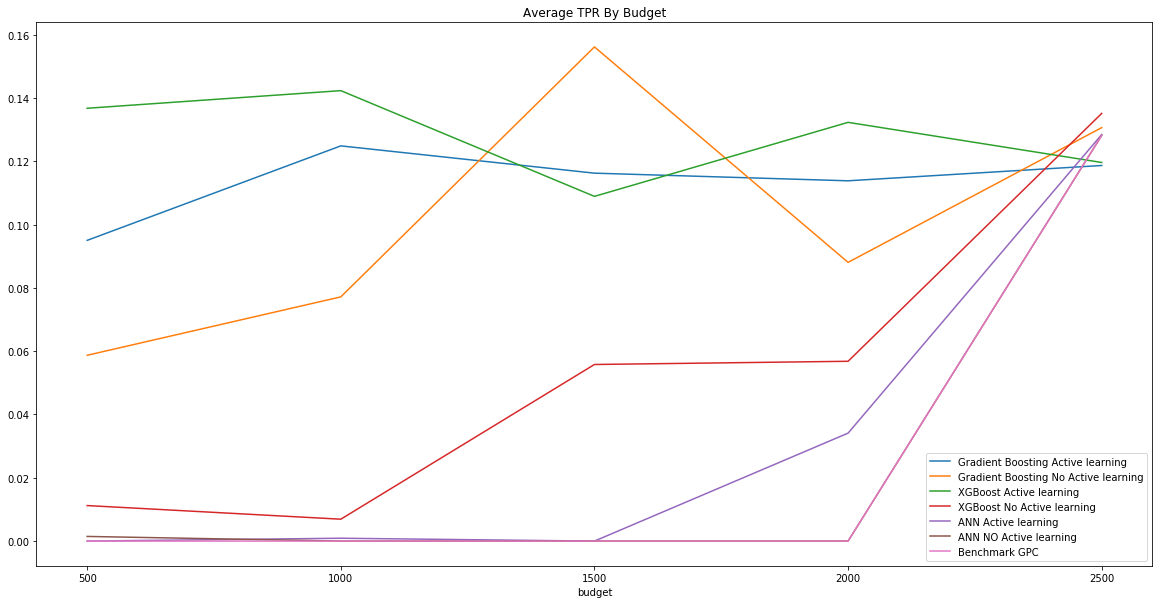

In [164]:
plt.figure(figsize=(25, 10))
tpr_ave_his_by_model.plot(figsize=(20, 10), x = 'budget', title = 'Average TPR By Budget', 
                          xticks = np.arange(500,3000,500))

# F1

In [188]:
for i in range (len(f1_ave_hist)-1):
    f1_ave_hist[i] =  pd.DataFrame(f1_ave_hist[i], index = experiment_labels)
f1_ave_hist[4] =  pd.DataFrame(ave_f1.values[:,-1], index = experiment_labels)   
f1_ave_his_by_model = np.zeros((len(f1_ave_hist), num_experiments))
for model in range(num_experiments):
    for budget_index in range(len(f1_ave_hist)):
        f1_ave_his_by_model[budget_index,model] = f1_ave_hist[budget_index].values[model][0]
        
f1_ave_his_by_model = pd.DataFrame(f1_ave_his_by_model, columns = experiment_labels)
f1_ave_his_by_model.head(7)

budget = np.arange(500,3000,500)
f1_ave_his_by_model['budget'] = budget

# F1 By budget

<Figure size 1800x720 with 0 Axes>

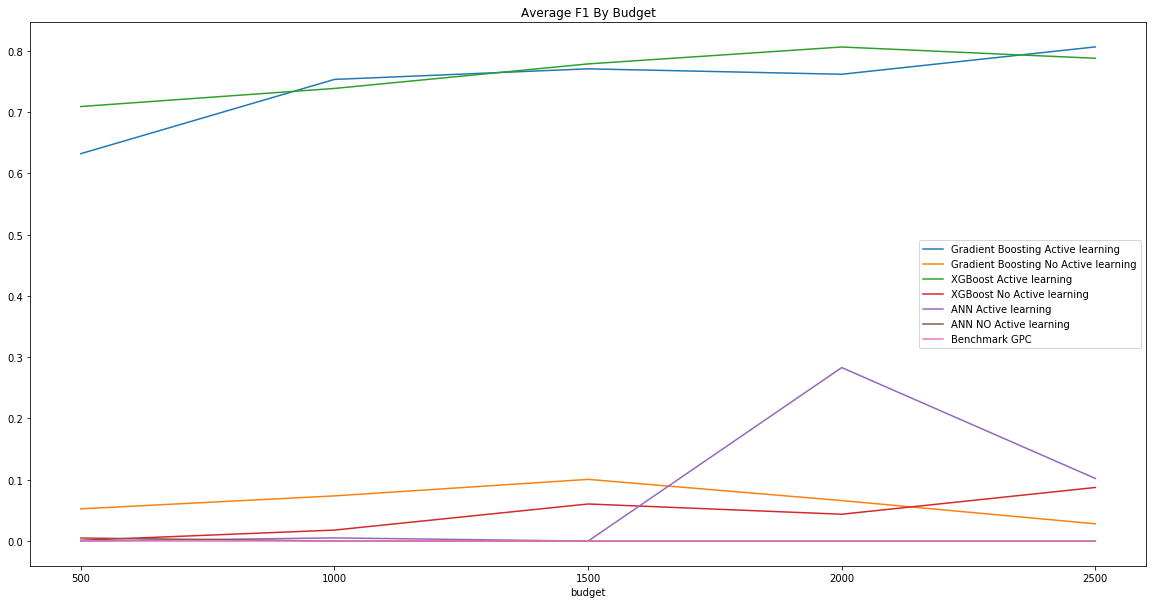

In [189]:
plt.figure(figsize=(25, 10))
f1_ave_his_by_model.plot(figsize=(20, 10), x = 'budget', title = 'Average F1 By Budget', 
                          xticks = np.arange(500,3000,500))